# INTRODUCTION

 

La performance énergetique est un paramètre important à prendre en compte lors de la construction d'un bâtiment. Elle dépend des caractéristiques du bâtiment ainsi que des conditions climatiques du milieu. Afin d'optimiser sa consomation énergetique, il serait important de quantifier l'influence de ces données sur la performance énergetique. La prédiction de cette perfomance à partir des données mesurées sur un échantillon d'immeuble à l'aide des techniques statistiques et d'apprentissage automatique, pourrait permettre d'optimiser la consommation énergetique des immeubles. 

Dans ce calepin nous présentons les résultats de prédiction de performance énergétique des bâtiments, obtenus à l'aide de plusieurs techniques d'apprentissage automatique sur un échantillons de 780 données.

La première partie est consacrée à l'analyse exploratoire des données et visualisations ainsi qu'à l'application des techniques statistiques de clustering (Kmeans,DBSCAN) et d'analyse en composantes principales sur l'ensemble de donées. Dans la seconde partie, nous développons plusieurs méthodes de classification directe et indirecte tout en comparant les performances, dans **l'objectif de trouver le modèle optimal de prédiction de l'efficacité énergetique des bâtiments.**

Ainsi nous avons implémenté les algorithmes de **Regression linéaire/logistique, *optimal tree, random forest, boosting et SVM***

# Importing Librairies and datasets

In [296]:
#Load the librarys
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls 
import plotly.figure_factory as ff
from plotly.offline import plot

import warnings 
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize 
from sklearn.cluster  import  KMeans, DBSCAN
from  sklearn.metrics  import confusion_matrix, adjusted_rand_score
from sklearn.metrics.cluster import contingency_matrix,silhouette_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.pipeline import make_pipeline

import graphviz 






In [297]:
#importing the data
df_energy= pd.read_csv("DataEnergy.csv")

# I. ANALYSE DE DONNEES

## Description des données

Les variables de l'ensemble des données sont les suivantes:

* **Relative.compactness** La compacité relative du bâtiment
* **Surface.area** La surface totale de l'immeuble
* **Wall.area** La surface des murs
* **Roof.area** La surface du toit.
* **Overall.height** La hauteur totale du bâtiment : 3.5 m et 7m
* **orientation** la direction de l'immeuble : Nord, Sud, Est, Ouest
* **Glazing.area** La surface des partie en verre
* **Glazing.area.distr**
* **Energy** La performance energetique du bâtiment
* **Energy.efficiency** la variable de la performance energetique du bâtiment transformée en données qualitatives (7 classes)



In [298]:
#data information,
print(df_energy.info())

#search unique values
print(df_energy.nunique())

#basic data statistics
print(df_energy.describe())

#Looking the data
df_energy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Relative.compactness  768 non-null    float64
 1   Surface.area          768 non-null    float64
 2   Wall.area             768 non-null    float64
 3   Roof.area             768 non-null    float64
 4   Overall.height        768 non-null    float64
 5   orientation           768 non-null    object 
 6   Glazing.area          768 non-null    float64
 7   Glazing.area.distr    768 non-null    int64  
 8   Energy                768 non-null    float64
 9   Energy.efficiency     768 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 60.1+ KB
None
Relative.compactness    768
Surface.area            768
Wall.area               768
Roof.area               768
Overall.height            2
orientation               4
Glazing.area            768
Glazing.area.distr 

Relative.compactness  Surface.area   Wall.area   Roof.area  Overall.height  \
0              0.982928    530.489958  306.484593  112.002683             7.0   
1              0.983547    519.872380  299.776324  110.048028             7.0   
2              0.979453    516.191221  303.374358  106.408431             7.0   
3              0.977733    518.924089  292.812213  113.055938             7.0   
4              0.903029    552.968920  316.236102  118.366409             7.0   

  orientation  Glazing.area  Glazing.area.distr     Energy Energy.efficiency  
0       North      0.016095                   0  34.263943                 B  
1        East     -0.009387                   0  34.589751                 B  
2       South     -0.000697                   0  38.778048                 C  
3        West      0.000010                   0  37.947808                 C  
4       North     -0.006592                   0  47.675859                 D

***Commentaires***:
* la variable *Glazing.area* contient des valeurs négatives. Ce qui semble être un problème, car nous avons ici une surface. Nous remplacerons toutes les valeurs négatives par 0. 
* On a 2 uniques valeurs de *Overall.height* et 6 uniques valeurs de *Glazing.area.distr*. Il serait peut être intéressant de catégoriser ces variables.

In [299]:
#look the number of negative values
print("we have", len(df_energy[df_energy["Glazing.area"]<0]["Glazing.area"]), "negative values")

we have 24 negative values


In [300]:
#replacing negative value with 0
df_energy.loc[df_energy["Glazing.area"]<0, "Glazing.area"]=0

In [301]:
#basic data statistics
df_energy.describe()

Relative.compactness  Surface.area   Wall.area   Roof.area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764511    671.349569  318.331811  176.508879   
std                0.105914     88.216217   43.942031   45.206368   
min                0.612496    501.450033  234.338121  105.338876   
25%                0.677856    598.684672  291.800051  137.385287   
50%                0.751687    673.069405  315.761457  183.308441   
75%                0.835044    744.594128  342.981089  220.510532   
max                0.991210    825.950839  425.805165  225.757721   

       Overall.height  Glazing.area  Glazing.area.distr      Energy  
count       768.00000    768.000000           768.00000  768.000000  
mean          5.25000      0.234548             2.81250   46.923575  
std           1.75114      0.132780             1.55096   19.863003  
min           3.50000      0.000000             0.00000   10.211493  
25%           3.50000      0.103055             1.75000   29.360416  
50%           5.25000      0.247521             3.00000   41.761247  
75%           7.00000      0.391185             4.00000   64.327196  
max           7.00000      0.427021             5.00000   94.842601

## I.1 Analyse descriptive unidimentionnelle

In [7]:


trace0 = go.Bar(
            x = df_energy[df_energy["Energy.efficiency"]== 'A']["Energy.efficiency"].value_counts().index.values,
            y = df_energy[df_energy["Energy.efficiency"]== 'A']["Energy.efficiency"].value_counts().values,
            name='A (eff. ener. < 30)'
    )

trace1 = go.Bar(
            x = df_energy[df_energy["Energy.efficiency"]== 'B']["Energy.efficiency"].value_counts().index.values,
            y = df_energy[df_energy["Energy.efficiency"]== 'B']["Energy.efficiency"].value_counts().values,
            name='B (30 < eff. ener. < 35)'
    )

trace2 = go.Bar(
            x = df_energy[df_energy["Energy.efficiency"]== 'C']["Energy.efficiency"].value_counts().index.values,
            y = df_energy[df_energy["Energy.efficiency"]== 'C']["Energy.efficiency"].value_counts().values,
            name='C (35 < eff. ener. < 45)'
    )

trace3 = go.Bar(
            x = df_energy[df_energy["Energy.efficiency"]== 'D']["Energy.efficiency"].value_counts().index.values,
            y = df_energy[df_energy["Energy.efficiency"]== 'D']["Energy.efficiency"].value_counts().values,
            name='D (45 < eff. ener. < 55)'
    )

trace4 = go.Bar(
            x = df_energy[df_energy["Energy.efficiency"]== 'E']["Energy.efficiency"].value_counts().index.values,
            y = df_energy[df_energy["Energy.efficiency"]== 'E']["Energy.efficiency"].value_counts().values,
            name='E (55 < eff. ener. < 65)'
    )

trace5 = go.Bar(
            x = df_energy[df_energy["Energy.efficiency"]== 'F']["Energy.efficiency"].value_counts().index.values,
            y = df_energy[df_energy["Energy.efficiency"]== 'F']["Energy.efficiency"].value_counts().values,
            name='F (65 < eff. ener. < 75)'
    )

trace6 = go.Bar(
            x = df_energy[df_energy["Energy.efficiency"]== 'G']["Energy.efficiency"].value_counts().index.values,
            y = df_energy[df_energy["Energy.efficiency"]== 'G']["Energy.efficiency"].value_counts().values,
            name='G (75 < eff. ener.)'
    )

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Energy Effciency Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

fig.show()

#py.iplot(fig, filename='grouped-bar')

**Commentaires:** Le nombre de maisons avec une éfficacité énergetique = A est en moyenne deux fois supérieure aux nombre de maisons  des autres catégories. 

**Distribution unidimensionnelle  des variables quantitatives**


In [8]:
df_RelComp = df_energy['Relative.compactness'].values.tolist()
df_SurfArea = df_energy['Surface.area'].values.tolist()
df_WallArea = df_energy['Wall.area'].values.tolist()
df_RoofArea = df_energy['Roof.area'].values.tolist()
df_OverHeig = df_energy['Overall.height'].values.tolist()
df_GlasArea = df_energy['Glazing.area'].values.tolist()
df_GlaAreaDist = df_energy['Glazing.area.distr'].values.tolist()
df_Ener = df_energy['Energy'].values.tolist()


#First plot
trace1 = go.Histogram(
    x=df_RelComp,
    histnorm='probability',
    name="Relative compactness"
)
#Second plot
trace2 = go.Histogram(
    x=df_SurfArea,
    histnorm='probability',
    name="Surface Area"
)
#Third plot
trace3 = go.Histogram(
    x=df_WallArea,
    histnorm='probability',
    name="Wall Area"
)

#4th plot
trace4 = go.Histogram(
    x=df_RoofArea,
    histnorm='probability',
    name="Roof Area"
)
#5th plot
trace5 = go.Histogram(
    x=df_OverHeig,
    histnorm='probability',
    name="Overall Height"
)
#6th plot
trace6 = go.Histogram(
    x=df_GlasArea,
    histnorm='probability',
    name="Glazing area"
)
#5th plot
trace7 = go.Histogram(
    x=df_GlaAreaDist,
    histnorm='probability',
    name="Glazing area distr"
)
#6th plot
trace8 = go.Histogram(
    x=df_Ener,
    histnorm='probability',
    name="Energy"
)


#Creating the grid
fig = tls.make_subplots(rows=4, cols=2, specs=[[{}, {}], [{}, {}], [{}, {}], [{}, {}]],
                          subplot_titles=('Relative compactness', 'Surface area', 'Wall area', 'Roof area',
                                          'Overall height', 'Glazing area', 'Glazing area distr', 'Energy'))

#setting the figs
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 3, 1)
fig.append_trace(trace6, 3, 2)
fig.append_trace(trace7, 4, 1)
fig.append_trace(trace8, 4, 2)

fig['layout'].update(height=800, width=950,showlegend=False, title='Unidimensional numerical Variables Distribuition', bargap=0.05)
fig.show()
#py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Commentaires :** 
* 50% des immeubles ont un "roof area" compris entre 210 et 230. 25% entre 140 et 150.
* une moitié des immeubles a une hauteur ("overall height") de 3.5 mètres et l'autre moitié 7 mètres. 
* on a le même nombre d'immeuble pour les "Glazing area distr" = 1,2,3,4,5.



**Distribution unidimensionnelle  des variables qualitatives**


In [9]:
trace0 = go.Bar(
            x = df_energy["orientation"].value_counts().index.values,
            y = df_energy["orientation"].value_counts().values
    )

data = [trace0]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Orientation Variable'
    ),
    title='Orientation distribution'
)

fig = go.Figure(data=data, layout=layout)

fig.show()

***Commentaires :*** 
* Pour chaque orientation on a le même nombre immeubles.

## I.2 Analyse descriptive multidimentionnelle

Regardons d'abord la relation entre l'énergie et les autres variables

In [302]:
#categorise Overall.height variables
df_energy["Height_cat"] = 0
df_energy.loc[df_energy["Overall.height"]==3.5,"Height_cat"] = "3.5_Height"
df_energy.loc[df_energy["Overall.height"]==7.0,"Height_cat"] = "7_Height"


df_A = df_energy[df_energy["Energy.efficiency"] == 'A']
df_B = df_energy[df_energy["Energy.efficiency"] == 'B']
df_C = df_energy[df_energy["Energy.efficiency"] == 'C']
df_D = df_energy[df_energy["Energy.efficiency"] == 'D']
df_E = df_energy[df_energy["Energy.efficiency"] == 'E']
df_F = df_energy[df_energy["Energy.efficiency"] == 'F']
df_G = df_energy[df_energy["Energy.efficiency"] == 'G']


In [11]:
#plot of Energy versus Overhall Height

trace0 = go.Scatter(
    y=df_A["Energy"],
    x=df_A["Height_cat"],
    name='A eff. Energ ',
    mode='markers',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Scatter(
    y=df_B["Energy"],
    x=df_B["Height_cat"],
    name='B eff. Energ ',
    mode='markers',
    marker=dict(
        color='#FF0000'
    )
)

trace2 = go.Scatter(
    y=df_C["Energy"],
    x=df_C["Height_cat"],
    name='C eff. Energ ',
    mode='markers',
    marker=dict(
        color='#FFFF00'
    )
)

trace3 = go.Scatter(
    y=df_D["Energy"],
    x=df_D["Height_cat"],
    name='D eff. Energ ',
    mode='markers',
    marker=dict(
        color='#0000FF'
    )
)

trace4 = go.Scatter(
    y=df_E["Energy"],
    x=df_E["Height_cat"],
    name='E eff. Energ ',
    mode='markers',
    marker=dict(
        color='#808080'
    )
)

trace5 = go.Scatter(
    y=df_F["Energy"],
    x=df_F["Height_cat"],
    name='F eff. Energ ',
    mode='markers',
    marker=dict(
        color='#00BCD8'
    )
)


trace6 = go.Scatter(
    y=df_G["Energy"],
    x=df_G["Height_cat"],
    name='G eff. Energ ',
    mode='markers',
    marker=dict(
        color='#A20E37'
    )
)


    
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(
    yaxis=dict(
        title='Energy',
        zeroline=False
    ),
    xaxis=dict(
        title='Overhall Height Categorical'
    ),
    boxmode='group',
    
     title = "Energy versus Overhall Height"
)
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(categoryorder='category ascending')


fig.show()

**Commentaires:**
* Toutes les maisons d'éfficacité energetique E, F et G ont 3.5 mètres d'hauteur.
* Toutes les maisons d'éfficacité énergetique A ont 7 mètre d'hauteur
* On semble voir deux clusters. Le premier pour la hauteur 3.5 m et le deuxième de 7m.
* On remarque également une grande variabilité pour les hauteurs de 3.5


### Orientation Analysis

In [12]:
trace0 = go.Bar(
            x = df_A["orientation"].value_counts().index.values,
            y = df_A["orientation"].value_counts().values,
            name='A',
            marker=dict(
                color='#3D9970'
            )
    
    )

trace1 = go.Bar(
            x = df_B["orientation"].value_counts().index.values,
            y = df_B["orientation"].value_counts().values,
            name='B',
            marker=dict(
                color='#FF0000'
            )
    )

trace2 = go.Bar(
            x = df_C["orientation"].value_counts().index.values,
            y = df_C["orientation"].value_counts().values,
            name='C',
            marker=dict(
                color='#FFFF00'
            )
    )

trace3 = go.Bar(
            x = df_D["orientation"].value_counts().index.values,
            y = df_D["orientation"].value_counts().values,
            name='D',
            marker=dict(
                color='#0000FF'
            )
    )

trace4 = go.Bar(
            x = df_E["orientation"].value_counts().index.values,
            y = df_E["orientation"].value_counts().values,
            name='E',
            marker=dict(
                color='#808080'
            )
    )

trace5 = go.Bar(
            x = df_F["orientation"].value_counts().index.values,
            y = df_F["orientation"].value_counts().values,
            name='F',
            marker=dict(
                color='#00BCD8'
            )
    )

trace6 = go.Bar(
            x = df_G["orientation"].value_counts().index.values,
            y = df_G["orientation"].value_counts().values,
            name='G',
            marker=dict(
                color='#A20E37'
            )
    )

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Orientation Variable'
    ),
    title='Orientation distribution by class'
)

fig = go.Figure(data=data, layout=layout)

fig.update_xaxes(categoryorder='category ascending')

fig.show()


#Compute mean of Energy for each orientation
orient_val = np.sort(df_energy["orientation"].value_counts().index.values)
energy_by_orient = []
for i in orient_val:
    mean_energ = np.mean(df_energy[df_energy["orientation"] == i][ "Energy"])
    energy_by_orient.append(mean_energ)




trace0 = go.Scatter(
    y=df_A["Energy"],
    x=df_A["orientation"],
    name='A  ',
    mode='markers',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Scatter(
    y=df_B["Energy"],
    x=df_B["orientation"],
    name='B  ',
    mode='markers',
    marker=dict(
        color='#FF0000'
    )
)

trace2 = go.Scatter(
    y=df_C["Energy"],
    x=df_C["orientation"],
    name='C  ',
    mode='markers',
    marker=dict(
        color='#FFFF00'
    )
)

trace3 = go.Scatter(
    y=df_D["Energy"],
    x=df_D["orientation"],
    name='D  ',
    mode='markers',
    marker=dict(
        color='#0000FF'
    )
)

trace4 = go.Scatter(
    y=df_E["Energy"],
    x=df_E["orientation"],
    name='E  ',
    mode='markers',
    marker=dict(
        color='#808080'
    )
)

trace5 = go.Scatter(
    y=df_F["Energy"],
    x=df_F["orientation"],
    name='F  ',
    mode='markers',
    marker=dict(
        color='#00BCD8'
    )
)


trace6 = go.Scatter(
    y=df_G["Energy"],
    x=df_G["orientation"],
    name='G  ',
    mode='markers',
    marker=dict(
        color='#A20E37'
    )
)

trace7 = go.Scatter(
    y= energy_by_orient,
    x= orient_val,
    name=' Mean of Energy  ',
    mode='lines',
    marker=dict(
        color='#000000'
    )
)



    
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6,trace7]

layout = go.Layout(
    yaxis=dict(
        title='Energy',
        zeroline=False
    ),
    xaxis=dict(
        title='Orientation'
    ),
    title = 'Energy by orientation',
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(categoryorder='category ascending')

fig.show()

**Commentaires** :
 * La moyenne d'énergie des immeubles est sensiblement égale sur chaque direction
 * La variabilité est sensiblement la même pour les 4 directions

### Relative compactness Analysis

In [13]:
trace0 = go.Scatter(
    y=df_A["Energy"],
    x=df_A["Relative.compactness"],
    name='A  ',
    mode='markers',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Scatter(
    y=df_B["Energy"],
    x=df_B["Relative.compactness"],
    name='B  ',
    mode='markers',
    marker=dict(
        color='#FF0000'
    )
)

trace2 = go.Scatter(
    y=df_C["Energy"],
    x=df_C["Relative.compactness"],
    name='C  ',
    mode='markers',
    marker=dict(
        color='#FFFF00'
    )
)

trace3 = go.Scatter(
    y=df_D["Energy"],
    x=df_D["Relative.compactness"],
    name='D  ',
    mode='markers',
    marker=dict(
        color='#0000FF'
    )
)

trace4 = go.Scatter(
    y=df_E["Energy"],
    x=df_E["Relative.compactness"],
    name='E  ',
    mode='markers',
    marker=dict(
        color='#808080'
    )
)

trace5 = go.Scatter(
    y=df_F["Energy"],
    x=df_F["Relative.compactness"],
    name='F  ',
    mode='markers',
    marker=dict(
        color='#00BCD8'
    )
)


trace6 = go.Scatter(
    y=df_G["Energy"],
    x=df_G["Relative.compactness"],
    name='G  ',
    mode='markers',
    marker=dict(
        color='#A20E37'
    )
)




    
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(
    yaxis=dict(
        title='Energy',
        zeroline=False
    ),
    xaxis=dict(
        title='Relative.compactness'
    ),
    title = 'Energy Versus Relative.compactness by class',
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

fig.show()

**Commentaires** :
* On peut observer 2 clusters à partir de la figure. Le premier est lorsque "Relative.compatcness" est inférieure à 0.75 et l'autre est supérieure à 0.75.
* On peut en déduire qu'un bâtiment avec une faible "Relative.compatcness" aura une  petite éfficacité énergétique.

### Surface area analysis

In [14]:
trace0 = go.Scatter(
    y=df_A["Energy"],
    x=df_A["Surface.area"],
    name='A  ',
    mode='markers',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Scatter(
    y=df_B["Energy"],
    x=df_B["Surface.area"],
    name='B  ',
    mode='markers',
    marker=dict(
        color='#FF0000'
    )
)

trace2 = go.Scatter(
    y=df_C["Energy"],
    x=df_C["Surface.area"],
    name='C  ',
    mode='markers',
    marker=dict(
        color='#FFFF00'
    )
)

trace3 = go.Scatter(
    y=df_D["Energy"],
    x=df_D["Surface.area"],
    name='D  ',
    mode='markers',
    marker=dict(
        color='#0000FF'
    )
)

trace4 = go.Scatter(
    y=df_E["Energy"],
    x=df_E["Surface.area"],
    name='E  ',
    mode='markers',
    marker=dict(
        color='#808080'
    )
)

trace5 = go.Scatter(
    y=df_F["Energy"],
    x=df_F["Surface.area"],
    name='F  ',
    mode='markers',
    marker=dict(
        color='#00BCD8'
    )
)


trace6 = go.Scatter(
    y=df_G["Energy"],
    x=df_G["Surface.area"],
    name='G  ',
    mode='markers',
    marker=dict(
        color='#A20E37'
    )
)




    
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(
    yaxis=dict(
        title='Energy',
        zeroline=False
    ),
    xaxis=dict(
        title='Surface.area'
    ),
    title = 'Energy Versus Surface.area by class',
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

fig.show()

**Commentaires** :
* On peut observer 2 clusters à partir de la figure. Le premier est lorsque "Surface.area" est inférieure à 675.  L'autre est supérieure à 675.
* On peut en déduire qu'un bâtiment avec une grande "Surface.area" aura une forte efficacité énergetique .

### Glazing area analysis

In [15]:
trace0 = go.Scatter(
    y=df_A["Energy"],
    x=df_A["Glazing.area"],
    name='A  ',
    mode='markers',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Scatter(
    y=df_B["Energy"],
    x=df_B["Glazing.area"],
    name='B  ',
    mode='markers',
    marker=dict(
        color='#FF0000'
    )
)

trace2 = go.Scatter(
    y=df_C["Energy"],
    x=df_C["Glazing.area"],
    name='C  ',
    mode='markers',
    marker=dict(
        color='#FFFF00'
    )
)

trace3 = go.Scatter(
    y=df_D["Energy"],
    x=df_D["Glazing.area"],
    name='D  ',
    mode='markers',
    marker=dict(
        color='#0000FF'
    )
)

trace4 = go.Scatter(
    y=df_E["Energy"],
    x=df_E["Glazing.area"],
    name='E  ',
    mode='markers',
    marker=dict(
        color='#808080'
    )
)

trace5 = go.Scatter(
    y=df_F["Energy"],
    x=df_F["Glazing.area"],
    name='F  ',
    mode='markers',
    marker=dict(
        color='#00BCD8'
    )
)


trace6 = go.Scatter(
    y=df_G["Energy"],
    x=df_G["Glazing.area"],
    name='G  ',
    mode='markers',
    marker=dict(
        color='#A20E37'
    )
)




    
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(
    yaxis=dict(
        title='Energy',
        zeroline=False
    ),
    xaxis=dict(
        title='Glazing.area'
    ),
    title = 'Energy versus Glazing.area by class',
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

fig.show()

**Commentaires :** On observe 4 groupes centrés respectivement autour de 0, 0.1, 0.25 et 0.4. La classe G est absente du premier groupe.

### Roof area analysis

In [16]:
trace0 = go.Scatter(
    y=df_A["Energy"],
    x=df_A["Roof.area"],
    name='A  ',
    mode='markers',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Scatter(
    y=df_B["Energy"],
    x=df_B["Roof.area"],
    name='B  ',
    mode='markers',
    marker=dict(
        color='#FF0000'
    )
)

trace2 = go.Scatter(
    y=df_C["Energy"],
    x=df_C["Roof.area"],
    name='C  ',
    mode='markers',
    marker=dict(
        color='#FFFF00'
    )
)

trace3 = go.Scatter(
    y=df_D["Energy"],
    x=df_D["Roof.area"],
    name='D  ',
    mode='markers',
    marker=dict(
        color='#0000FF'
    )
)

trace4 = go.Scatter(
    y=df_E["Energy"],
    x=df_E["Roof.area"],
    name='E  ',
    mode='markers',
    marker=dict(
        color='#808080'
    )
)

trace5 = go.Scatter(
    y=df_F["Energy"],
    x=df_F["Roof.area"],
    name='F  ',
    mode='markers',
    marker=dict(
        color='#00BCD8'
    )
)


trace6 = go.Scatter(
    y=df_G["Energy"],
    x=df_G["Roof.area"],
    name='G  ',
    mode='markers',
    marker=dict(
        color='#A20E37'
    )
)




    
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(
    yaxis=dict(
        title='Energy',
        zeroline=False
    ),
    xaxis=dict(
        title='Roof.area'
    ),
    title = 'Energy versus Roof.area by class',
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

fig.show()

**Commentaires** :
* On peut observer 2 clusters à partir de la figure. Le premier est lorsque "Roof.area" est inférieure à 160.  L'autre est supérieure à 210.
* On peut également observer qu'un bâtiment avec une grande "Roof.area" aura une forte efficacité énergetique.

### Wall area analysis

In [17]:
trace0 = go.Scatter(
    y=df_A["Energy"],
    x=df_A["Wall.area"],
    name='A  ',
    mode='markers',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Scatter(
    y=df_B["Energy"],
    x=df_B["Wall.area"],
    name='B  ',
    mode='markers',
    marker=dict(
        color='#FF0000'
    )
)

trace2 = go.Scatter(
    y=df_C["Energy"],
    x=df_C["Wall.area"],
    name='C  ',
    mode='markers',
    marker=dict(
        color='#FFFF00'
    )
)

trace3 = go.Scatter(
    y=df_D["Energy"],
    x=df_D["Wall.area"],
    name='D  ',
    mode='markers',
    marker=dict(
        color='#0000FF'
    )
)

trace4 = go.Scatter(
    y=df_E["Energy"],
    x=df_E["Wall.area"],
    name='E  ',
    mode='markers',
    marker=dict(
        color='#808080'
    )
)

trace5 = go.Scatter(
    y=df_F["Energy"],
    x=df_F["Wall.area"],
    name='F  ',
    mode='markers',
    marker=dict(
        color='#00BCD8'
    )
)


trace6 = go.Scatter(
    y=df_G["Energy"],
    x=df_G["Wall.area"],
    name='G  ',
    mode='markers',
    marker=dict(
        color='#A20E37'
    )
)




    
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(
    yaxis=dict(
        title='Energy',
        zeroline=False
    ),
    xaxis=dict(
        title='Wall.area'
    ),
    title = 'Energy versus Wall.area by class',
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

fig.show()

**Commentaires :** Ici on observe que tous les bâtiments avec *Wall.area*  supérieur à 380 sont de classe des classes G, F, E, et D.

### Conditional plot on orientation

In [18]:
#Conditional plot on orientation between Relative.compactness and Energy
fig = px.scatter(df_energy, x="Relative.compactness", y="Energy", color="Energy.efficiency", facet_col="orientation")
fig.show()

**Commentaires :** Pour chaque orientation, on observe deux clusters suivant la *Relative.compactness*. Le premier constitué des classes A, B et C. Le Second constitué des classes D, E, F et G. 

In [19]:
#Conditional plot on orientation between Surface.area and Energy
fig = px.scatter(df_energy, x="Surface.area", y="Energy", color="Energy.efficiency", facet_col="orientation")
fig.show()

**Commentaires :** Globalement dans chacune des direction, on observe deux clusters, qui sont plus marqués suivant l'orientation *North*

### Conditional plot on Overall.height

In [20]:
#Conditional plot on Overall.height between Relative.compactness and Energy
fig = px.scatter(df_energy, x="Relative.compactness", y="Energy", color="Energy.efficiency", facet_col="Overall.height")
fig.show()

**Commentaires:** 
* Les immeubles avec une grande compacité relative (supérieure à 0.75) et une hauteur de 7, ont une grande éfficacité énergetique.
* Tous les immeubles de la classe A ont une hauteur de 3.5m et une compacité rélative inférieure à 0.75.

In [21]:
#Conditional plot on Overall.height between Surface.area and Energy
fig = px.scatter(df_energy, x="Surface.area", y="Energy", color="Energy.efficiency", facet_col="Overall.height")
fig.show()

**Commentaires :** Tous les immeubles avec une grande surface (supérieure à 660) ont une hauteur de 3.5 m et sont tous de classes A, B et C. 

In [22]:
#Conditional plot on Overall.height between Roof.area and Energy
fig = px.scatter(df_energy, x="Roof.area", y="Energy", color="Energy.efficiency", facet_col="Overall.height")
fig.show()

**Commentaires:** On observe ceci : Tous les immeubles avec une hauteur = 3.5 ont un *Roof.area* supérieur à 200 et sont tous dans les classes A, B et C

### 3D Plot of Surface variable

In [23]:
trace0 = go.Scatter3d(
    z=df_A["Surface.area"],
    y=df_A["Roof.area"],
    x=df_A["Wall.area"],
    name='A  ',
    mode='markers',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Scatter3d(
    z=df_B["Surface.area"],
    y=df_B["Roof.area"],
    x=df_B["Wall.area"],
    name='B  ',
    mode='markers',
    marker=dict(
        color='#FF0000'
    )
)

trace2 = go.Scatter3d(
    z=df_C["Surface.area"],
    y=df_C["Roof.area"],
    x=df_C["Wall.area"],
    name='C  ',
    mode='markers',
    marker=dict(
        color='#FFFF00'
    )
)

trace3 = go.Scatter3d(
    z=df_D["Surface.area"],
    y=df_D["Roof.area"],
    x=df_D["Wall.area"],
    name='D  ',
    mode='markers',
    marker=dict(
        color='#0000FF'
    )
)

trace4 = go.Scatter3d(
    z=df_E["Surface.area"],
    y=df_E["Roof.area"],
    x=df_E["Wall.area"],
    name='E  ',
    mode='markers',
    marker=dict(
        color='#808080'
    )
)

trace5 = go.Scatter3d(
    z=df_F["Surface.area"],
    y=df_F["Roof.area"],
    x=df_F["Wall.area"],
    name='F  ',
    mode='markers',
    marker=dict(
        color='#00BCD8'
    )
)


trace6 = go.Scatter3d(
    z=df_G["Surface.area"],
    y=df_G["Roof.area"],
    x=df_G["Wall.area"],
    name='G  ',
    mode='markers',
    marker=dict(
        color='#A20E37'
    )
)




    
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = go.Layout(
    
    scene = dict(
    zaxis=dict(
        title='Surface.area',
        zeroline=False
    ),
    yaxis=dict(
        title='Roof.area',
        zeroline=False
    ),
    xaxis=dict(
        title='Wall.area'
    ),
    ),
    
    title = 'Surface.area Versus Wall.area and Roof.area by class',
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

fig.show()

**Commentaires :** Nous observons ici une relation linéaire entre la Surface.area et le plan formé par le  Wall.area et Roof.area. Ce qui semble logique car la surface totale du bâtiment contient la surface des murs et la surface du toit. Vérifions cela avec la formule ci-dessous.    

In [24]:
#computed surface area which is the sum of wall area, roof area and ground area. Ground and roof have approximatively same area 
df_surf_tot= 2*df_energy["Roof.area"] + df_energy["Wall.area"]

#comparison between computed surface area and Surface.area 
diff_surf = df_energy["Surface.area"] - df_surf_tot


print("The maximum of the absolute difference between computed and measured area is : ", np.max(diff_surf))

The maximum of the absolute difference between computed and measured area is :  1.1368683772161603e-12


**Commentaires** La vérification éffectuée ci-dessus valide les observations faites sur le graphique précédent. la Surface totale caluculée est égale à la surface mésurée *Surface.area* avec une marge d'erreur de 1e-12.  

### Scatter plot matrix of numerical variable

In [25]:
fig = px.scatter_matrix(df_energy,
    dimensions=['Relative.compactness', 'Surface.area', 'Wall.area', 'Roof.area',
       'Overall.height', 'Glazing.area','Glazing.area.distr', 'Energy'])

fig.update_layout(
                  width=1000,
                  height=1000 )

fig.show()

**Commentaires:** Relation linéaire entre les variables *Relative.compactness* et *Surface.area*. Lorsque l'une augmente l'autre dimunie. Plus la surface est grande, plus la compacité est faible.

### Correlation matrix

In [26]:
df_corr = df_energy[["Energy","Relative.compactness", "Surface.area", "Wall.area",
                     "Roof.area", "Overall.height", "Glazing.area", "Glazing.area.distr"]].corr()
df_corr_matrix = df_corr.round(2)

#plt.figure(figsize=(10,10))
colorscale = [[1, '#001f3f'], [0, '#3D9970']]  # custom colorscale
fig = ff.create_annotated_heatmap(z = df_corr_matrix.values, x =df_corr_matrix.index.values.tolist(),
                                  y= df_corr_matrix.index.values.tolist(), colorscale=colorscale)
fig.show()

**Commentaires:**

* **influence des variables explicatives sur la variable à expliquer:**
     *Relative.Compactness, Surface.area, Roof.area et Overhall.height* semblent être les plus influents sur l'éfficacité énergetique au regards de cette matrice corrélation.

* **interaction entre les variables** 
 * Il y a une forte liaison entre :
     * la *Relative.Compactness et Overhall.height*. Ce qui semble logique car la compacité relative d'un bâtiment est le rapport entre la surface de déperdition (l'enveloppe extérieure) et le volume protégé, qui dépend de la hauteur du bâtiment. La variable *Overhall.height* pourrait ne pas être prise en compte dans nos modélisation. Nous allons évaluer la pertinence de cette remarque.
     * *Surface.area et Roof.area*. Ce qui paraît logique car le *Roof.area* est contenu dans la surface totale *Surface.area*, qui sera retiré dans nos modèles. 
 * Il y a également une forte correlation négative entre:
     * *Relative.Compactness* et les variables *Surface.area et Roof.area*. Quand la première variable croit, les autres vont décroitre.
     * *Overhall.height* et les variables *Surface.area et Roof.area*
      


## I.3 Analyse en composantes principales

Sur la base des résultats obtenus lors de l'analyse des variables, les variables quantitatives sont les suivantes : **Compacité relative, Surface, Surface des murs, Surface du toit, Surface du vitrage**, **Energie**.
Nous conservons toutes les variables sauf **Energie**.

**Réduction des variables**

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.cluster  import  KMeans, DBSCAN
from  sklearn.metrics  import confusion_matrix, adjusted_rand_score
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, silhouette_score,completeness_score, v_measure_score, adjusted_mutual_info_score

from plotly.offline import plot
import matplotlib.patches as mpatches
import plotly.graph_objs as go

In [28]:
X=scale(df_energy[["Relative.compactness","Surface.area","Wall.area","Roof.area","Glazing.area"]])

#### Estimation, calcul des principales composantes

In [29]:
pca = PCA()

C = pca.fit(X).transform(X)

#### Décroissance du Ratio de la variance expliqué

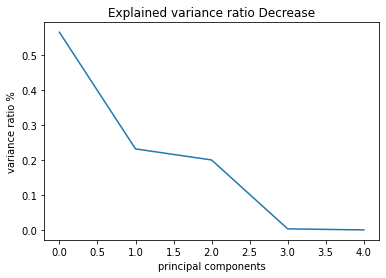

In [30]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("principal components")
plt.ylabel("variance ratio %")
plt.title("Explained variance ratio Decrease")
plt.show()

La première composante principale permet de conserver plus de 50% de la variance expliquée. Elle est donc très importante par rapport aux deux autres composantes.
Les deux composantes ont des contributions comparables.
Nous avons une meilleure vue en utilisant les diagrammes à barres.

In [31]:
ratios = pca.explained_variance_ratio_
(ratios[0:3].sum()*100).round(2)

99.7

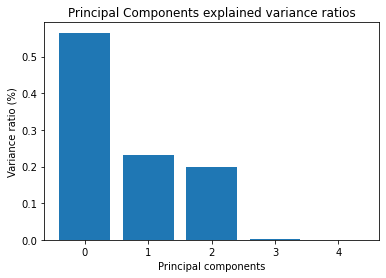

In [32]:
plt.title("Principal Components explained variance ratios")
plt.bar(range(len(ratios)), pca.explained_variance_ratio_)
plt.xticks(range(len(ratios)))
plt.xlabel("Principal components")
plt.ylabel("Variance ratio (%)")
plt.show()

En se basant sur la diminution soudaine de la variance expliquée au-delà de la composante numéro 2, nous avons déjà une idée du nombre de composantes à conserver. De plus, nous observons qu'en ne conservant que les 3 premières composantes principales, nous parvenons à conserver un pourcentage de variance expliquée de **99,7**.

Text(0.5, 1.0, 'Cumulative explained variance by the number of components')

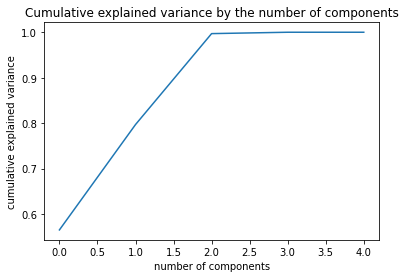

In [33]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by the number of components')

#### Principal components distribution

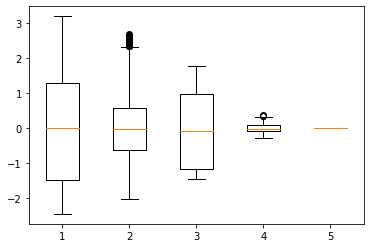

In [34]:
plt.boxplot(C[:,0:6])
plt.show()

La distribution des données est symétrique pour les principales composantes importantes. <br>
En revanche, la composante principale 2 présente un grand nombre de valeurs atypiques. <br>
Il en va de même pour la composante 4 mais celle-ci ne pose pas de problème car elle sera écartée dans les analyses suivantes en raison de sa faible contribution à la variance expliquée.

### Représentation des individus, coordonnées et représentation des variables

   **La représentation se fait selon les deux premiers axes principaux**

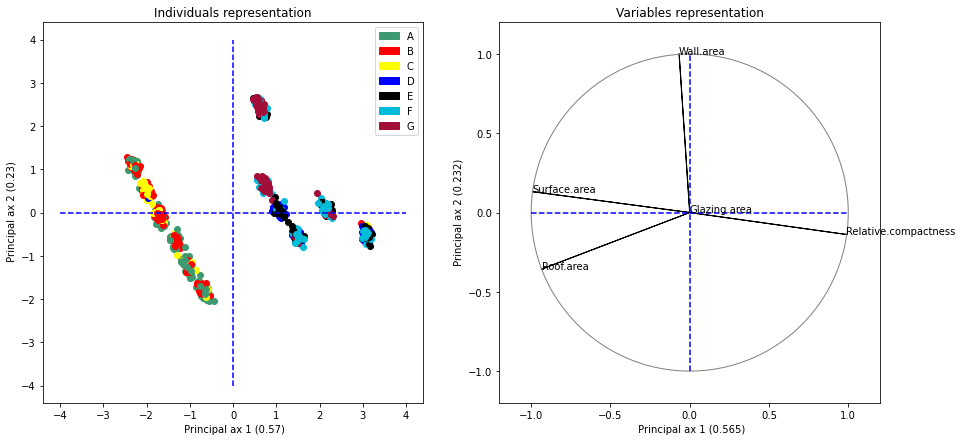

In [35]:
################################################
# Individuals representation
################################################
colorDict= {'A':"#3D9970", 'B':"#FF0000" , 'C':"#FFFF00", 'D': "#0000FF", 'E': "#000000", 'F': "#00BCD8", 'G': "#A20E37"}
Legends = [mpatches.Patch(color=colorDict[clas], label=clas) for clas in colorDict.keys()]

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1)

for i, j, nom in zip(C[:,0], C[:,1], df_energy["Energy.efficiency"]):
    color = colorDict[nom]
    plt.plot(i, j, "o",color=color)
    

plt.legend(handles=Legends)
plt.plot(np.linspace(-4,4,1000), np.zeros(1000), linestyle="dashed", color="blue")
plt.plot(np.zeros(1000),np.linspace(-4,4,1000),  linestyle="dashed", color="blue")
plt.xlabel(f" Principal ax 1 ({ratios[0].round(2)})")
plt.ylabel(f" Principal ax 2 ({ratios[1].round(2)})")
plt.title("Individuals representation")

################################################
# coordinates and representation of variables
#################################################
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])


ax = fig.add_subplot(1, 2, 2)
for i, j, nom in zip(coord1,coord2, df_energy[["Relative.compactness","Surface.area",
                                               "Wall.area","Roof.area","Glazing.area"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
ax.axis((-1.2,1.2,-1.2,1.2))
# cercle

c=plt.Circle((0,0), radius=1, color='gray', fill=False)
plt.xlabel(f" Principal ax 1 ({ratios[0].round(3)})")
plt.ylabel(f" Principal ax 2 ({ratios[1].round(3)})")
plt.title("Variables representation")

ax.add_patch(c)
plt.plot(np.linspace(-1,1,1000), np.zeros(1000), linestyle="dashed", color="blue")
plt.plot(np.zeros(1000),np.linspace(-1,1,1000),  linestyle="dashed", color="blue")
plt.show()

L'axe 1 isole les bâtiments en fonction de leur efficacité énergétique en deux groupes principaux : Faible efficacité énergétique (D, E, F, G) et bonne efficacité énergétique (A, B, C). <br>
La compacité relative joue un rôle énorme dans l'efficacité énergétique. Plus ce rapport augmente, plus la surface perdue à travers les murs augmente, ce qui se traduit par un faible rendement.
C'est tout à fait compréhensible car plus un bâtiment est compact, plus il est performant. La compacité est mesurée par le rapport entre la surface perdue (mur, toit, etc.) et le volume à chauffer : Rapport S/V. Plus ce rapport est élevé, plus la surface perdue est importante, moins le bâtiment est à efficace.

En outre, les bâtiments ayant une bonne efficacité énergétique (A, B, C) sont généralement de petite surface.<br>

De plus, nous pouvons voir que la surface et la compacité relative ont une très forte corrélation négative le long du premier axe principal. Cela peut également s'expliquer par la relation indiquée ci-dessus. Sur la base de cette relation, on peut même se passer de la variable explicative surface.area. <br>

Comme prévu, nous constatons que les variables surface.area , roof.area sont fortement corrélées. <br>

En n'utilisant que les deux composantes principales, il est difficile de remarquer des regroupements dans la représentation des individus. On peut se faire une idée de l'importance de certaines variables telles que les variables compacité relative, surface...

La composante principale 2 définit l'importance de la surface des murs mais ne donne pas une idée directe de l'efficacité énergétique des bâtiments. Néanmoins, une valeur élevée de la surface des murs donne une idée de l'efficacité énergétique, qui est généralement faible (E,F,G).

Enfin, notons que certaines valeur aberrantes sont observées dans les données de B et C. Cela peut etre du à la distribution atypique que nous avons observée dans les boites à moustaches.

## I.4 Utilisation de la technique de Clustering sur les variables quantitatives

Dans cette partie, nous utiliserons des algorithmes de clustering tels que DBSCAN, K-means. Comme nous connaissons le nombre de clusters **idéalement** attendus (A,B,...,G), ce dernier est utilisable. En fait, nous nous attendons à avoir 7 clusters. <br>
Pour rappel, les variables quantitatives mises à l'échelle sont "Compacité relative", "Surface", "Surface murale", "Surface de toit", "Surface de vitrage".

### I.4.1. K-Means

k-means est un algorithme itératif qui minimise la somme des distances entre chaque individu et le centroïd.

In [36]:
clust=KMeans(n_clusters=7, random_state=0)
clust.fit(X)
predicted_class = clust.predict(X)

#### I.4.1.1. Evaluation

In [37]:
actual_class_list = df_energy["Energy.efficiency"].tolist()
categories = np.unique(actual_class_list).tolist()

**a. Score aléatoire ajusté**

L'indice Rand est une fonction qui calcule une mesure de similarité entre deux groupements. Pour ce calcul, l'indice aléatoire prend en compte toutes les paires d'échantillons et de comptage qui sont attribuées dans les grappes similaires ou différentes dans la mise en grappes prédite et réelle.L'étiquetage parfait serait noté 1.

In [38]:
adjusted_rand_score(predicted_class, actual_class_list)

0.25091093729904557

This metric gives catastrophic results. We will verify the reasons for this with the following metrics including the contingency matrix.

**b. Matrice de contingence**

Cette matrice indiquera la cardinalité de l'intersection pour chaque paire de confiance (vraie, prédite).
La distribution des classes n'étant pas équilibrée, les comparaisons sont plus pertinentes en pourcentage.

In [39]:
def plot_confusion_matrix(categories, actual_class_list, predicted_class):
    conting_matrix = contingency_matrix(actual_class_list,predicted_class)
    distr_rate_dict = {cat: list((distr/sum(distr)).round(2)) for cat, distr in zip(categories, conting_matrix)} 

    df_cm = pd.DataFrame(distr_rate_dict.values(), 
                      index = categories,
                      columns = [str(i) for i in range(len(set(predicted_class)))])

    fig = plt.figure(figsize=(8,6))

    plt.clf()

    ax = fig.add_subplot(111)

    ax.set_aspect(1)

    res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=1.0, fmt='.2f')
    posit = [i+0.5 for i in range(len(categories))]
    posit[0]= 0.2
    posit[-1]= posit[-1] + 0.3
    plt.yticks(posit, categories,va='center')
    plt.xlabel("Predicted clusters")
    plt.ylabel("True Categories")
    plt.title(" True Categories distribution in  clusters\n")

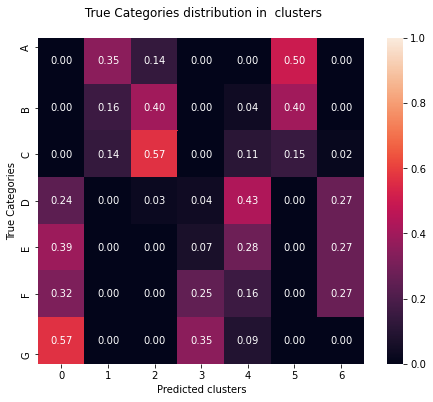

In [40]:
plot_confusion_matrix(categories, actual_class_list, predicted_class)

La figure ci-dessus nous permet de faire la correspondance entre les classes obtenues par regroupement et les classes que nous avons établies avec la variable de colonne *Energy.efficiency*.<br>
En supposant que la mise les clusters coincident, sur la base du pourcentage maximum d'éléments dans un cluster, nous définissons le nom de la cluster.<br>
Ainsi, A appartiendrait à la catégorie 0, B à la catégorie 4, C à la catégorie 6, D à la catégorie 1, E à la catégorie 5, F à la catégorie 5 et G à la catégorie 5. 
Seule la catégorie C a une distribution assez acceptable avec 68% de bonnes prédictions.

On remarque que les classes E, F et G se trouvent principalement dans le même groupe. 

Une façon d'observer la pertinence de la division de l'efficacité énergétique en 7 classes pourrait être d'effectuer un réglage du nombre de catégories en hyperparamètres (en utilisant la méthode du Elbow) et d'observer la diminution de l'inertie.
Avant de faire cette étude, on peut déjà deviner que le nombre de catégories ne sera pas de 7 puisque E, F et G se trouvent principalement ensemble et que la matrice de contingence conduit donc à des résultats catastrophiques.

#### I. 4.1.2. Méthode Elbow

Afin de choisir le nombre le plus précis de clusters, nous allons iterer sur toutes nos differentes valeur de k afin d'observer l'évolution de l'inertie.

Text(0, 0.5, "Model's cost (Inertia)")

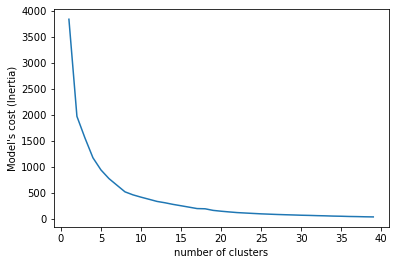

In [41]:
inertia = []
K_range = range(1, 40)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('number of clusters')
plt.ylabel("Model's cost (Inertia)")

**Sur la base du chiffre ci-dessus, nous pouvons conclure que le nombre effectif de clusters pour notre ensemble de données en utilisant kmeans devrait être compris entre 10 et 15.**

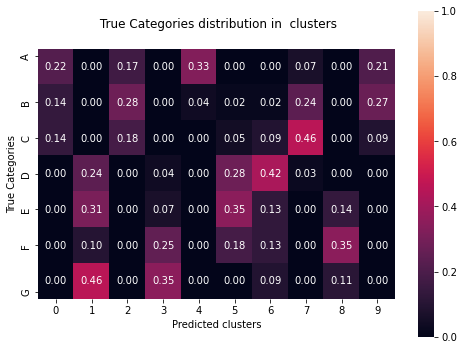

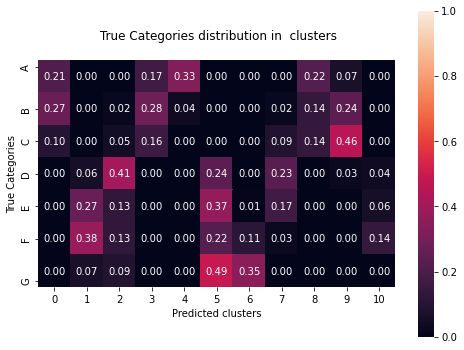

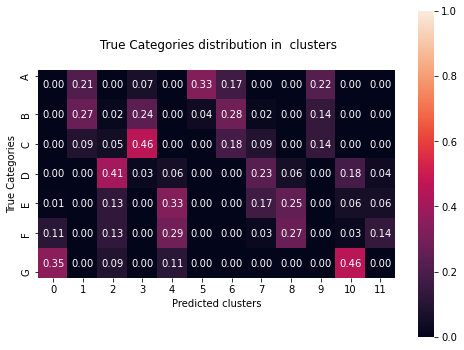

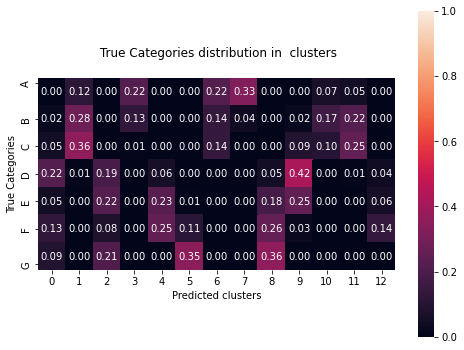

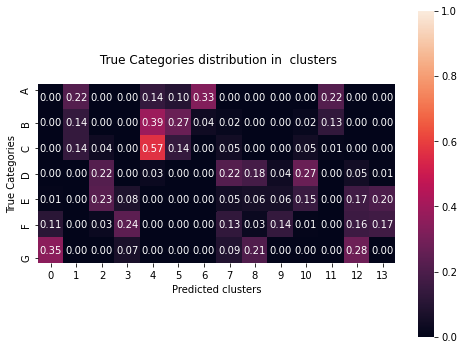

In [42]:
for k in range(10, 15):
    model = KMeans(n_clusters=k).fit(X)
    pred_class= model.labels_
    plot_confusion_matrix(categories, actual_class_list, pred_class)

Avec un maximum de 15 groupes, il est normal qu'une classe se retrouve dans plusieurs groupes, mais le plus important ici est de vérifier s'il n'y a pas un grand nombre de classes qui reviennent dans le même groupe. C'est pourtant le cas; les batiments avec des efficacité energéétiques assez proches se retrouvent dans le meme cluster. <br>
*On peut toutefois s'interroger sur la pertinence du choix de kmeans comme méthode de regroupement. 
Étant donné la représentation non convexe des données, nous essaierons de choisir une méthode plus appropriée, dans ce cas la méthode DBSCAN.*

### 4.2. DBSCAN Clustering

L'algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise) a été introduit en 1996 dans ce but pour traiter le regroupement d'ensembles de données non convexes.
DBSCAN itére sur les points de l'ensemble de données. Pour chacun des points qu'il analyse, il construit l'ensemble des points atteignables par densité à partir de ce point : il calcule le voisinage epsilon de ce point, puis, si ce voisinage contient plus de n_min points, les voisinages epsilon de chacun d'eux, et ainsi de suite, jusqu'à ce qu'il ne puisse plus agrandir le cluster. Si le point considéré n'est pas un point intérieur, c'est-à-dire qu'il n'a pas assez de voisins, il sera alors étiqueté comme bruit. Cela permet à DBSCAN d'être robuste aux données aberrantes puisque ce mécanisme l'isole.

On utilise la silhouette comme métrique. Les clusters predits dont la silohoutte est inférieure à 0.5 ne seront pas considérés.
Pour un point x donné, le coefficient de silhouette s(x) permet d’évaluer si ce point appartient au « bon » cluster :
Pour cela, on calcule la distance moyenne de x à tous les autres points du cluster C_k auquel il appartient :
soit a(x) cette distance, on calcule la plus petite valeur que pourrait prendre a(x), si x était assigné à un autre cluster notée b(x).
Le coefficient de silhouette est donné par :
s(x)=(b(x)−a(x))/max(a(x),b(x))

Deux paramètres sont à considérer dans l'algorithme.
* eps : La distance maximale entre deux échantillons pour que l'un soit considéré comme dans le voisinage de l'autre. Il ne s'agit pas d'une limite maximale sur les distances des points à l'intérieur d'un groupe. C'est le paramètre DBSCAN le plus important à choisir de manière appropriée pour votre ensemble de données et votre fonction de distance.

* min_samples:Le nombre d'échantillons (ou le poids total) dans un voisinage pour qu'un point soit considéré comme un point central. Cela inclut le point lui-même.


In [43]:
def dbscan_grid_search(X_data, true_cat, lst, clst_count, eps_space = 0.5,
                       min_samples_space = 5, min_clust = 0, 
                       max_clust = 10,max_unclustered_percentage=0.05):

    """
Performs a hyperparameter grid search for DBSCAN.

Parameters:
    * X_data            = data used to fit the DBSCAN instance
    * lst               = a list to store the results of the grid search
    * true_cat          = True Categories
    * clst_count        = a list to store the number of non-whitespace clusters
    * eps_space         = the range values for the eps parameter
    * min_samples_space = the range values for the min_samples parameter
    * min_clust         = the minimum number of clusters required after each search iteration in order for a result to be appended to the lst
    * max_clust         = the maximum number of clusters required after each search iteration in order for a result to be appended to the lst
    * max_unclustered_percentage= maximum percentage of unclustered data (in cluster -1)
"""

    # Importing counter to count the amount of data in each cluster
    from collections import Counter


    # Starting a tally of total iterations
    n_iterations = 0
    best_score=0
    best_parameters=dict()
    # Looping over each combination of hyperparameters
    for eps_val in eps_space:
        for samples_val in min_samples_space:

            dbscan_grid = DBSCAN(eps = eps_val,
                                 min_samples = samples_val)

            # fit_transform
            clusters = dbscan_grid.fit_predict(X = X_data)

            # Counting the amount of data in each cluster
            cluster_count = Counter(clusters)

            # Saving the number of clusters
            if -1 not in cluster_count:
                n_clusters = len(set(clusters))
            else:
                n_clusters = len(set(clusters)) - 1

            # Increasing the iteration tally with each run of the loop
            n_iterations += 1

            # Appending the lst each time n_clusters criteria is reached
            is_bound_criteria_reached = n_clusters >= min_clust and n_clusters <= max_clust
            if is_bound_criteria_reached:
                sil_score= silhouette_score(X_data, clusters)
                is_acceptable_clustering= (-1 not in cluster_count) or ( (-1 in cluster_count) and (cluster_count[-1] < len(X_data)*max_unclustered_percentage) ) 

                if is_acceptable_clustering:
                    dbscan_clusters.append({"eps_val":eps_val.round(3),
                                            "samples_val":samples_val,
                                            "n_clusters":n_clusters})
                    clst_count.append(cluster_count)
                    if sil_score > best_score:
                        best_score = sil_score
                        best_parameters["score"]=best_score
                        best_parameters["params"]= dbscan_clusters[-1]
                        best_parameters["predictions"]= dbscan_grid.labels_
        
    # Printing grid search summary information
    print(f"""*************** Search Complete *********************** """)
    print(f"""Hyperparameter combinations checked: {n_iterations}. \n""")
    return best_parameters

In [44]:
dbscan_clusters = []
cluster_count   = []
max_unclustered_percentage = 0.05  # We assume that we can accept at most 5% of data to be unclustered

# Inputting function parameters
best_param= dbscan_grid_search(X_data = X,true_cat=actual_class_list,
                                    lst = dbscan_clusters,
                                    clst_count = cluster_count,
                                    eps_space = pd.np.arange(0.8,1.6, 0.01),
                                    min_samples_space = pd.np.arange(1,120,5),
                                    min_clust = 2,
                                    max_clust = 8,
                                    max_unclustered_percentage=max_unclustered_percentage)

<ipython-input-44-6fe42a2d1e1b>:9: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-44-6fe42a2d1e1b>:10: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



*************** Search Complete *********************** 
Hyperparameter combinations checked: 1920. 



In [45]:
print(dbscan_clusters)
print("=======================================================================================")
print(cluster_count)

[{'eps_val': 0.83, 'samples_val': 1, 'n_clusters': 8}, {'eps_val': 0.83, 'samples_val': 6, 'n_clusters': 8}, {'eps_val': 0.83, 'samples_val': 11, 'n_clusters': 8}, {'eps_val': 0.83, 'samples_val': 16, 'n_clusters': 8}, {'eps_val': 0.84, 'samples_val': 1, 'n_clusters': 7}, {'eps_val': 0.84, 'samples_val': 6, 'n_clusters': 7}, {'eps_val': 0.84, 'samples_val': 11, 'n_clusters': 7}, {'eps_val': 0.84, 'samples_val': 16, 'n_clusters': 7}, {'eps_val': 0.85, 'samples_val': 1, 'n_clusters': 7}, {'eps_val': 0.85, 'samples_val': 6, 'n_clusters': 7}, {'eps_val': 0.85, 'samples_val': 11, 'n_clusters': 7}, {'eps_val': 0.85, 'samples_val': 16, 'n_clusters': 7}, {'eps_val': 0.86, 'samples_val': 1, 'n_clusters': 7}, {'eps_val': 0.86, 'samples_val': 6, 'n_clusters': 7}, {'eps_val': 0.86, 'samples_val': 11, 'n_clusters': 7}, {'eps_val': 0.86, 'samples_val': 16, 'n_clusters': 7}, {'eps_val': 0.87, 'samples_val': 1, 'n_clusters': 6}, {'eps_val': 0.87, 'samples_val': 6, 'n_clusters': 6}, {'eps_val': 0.87, '

On remarque que le paramètre samples_val joue un role marginal dans le processus de clustering dans cette étude.
Par contre, lorsque le paramètre eps_val augmente, on obtient un plus petit nombre de clusters. Cela est tout à fait normal car nos données sont pour la plupart regroupées et donc la distance entre celles-ci est faible. Egalement, au delà de eps_val=1, on on obtient un numbre non negligeable de données non clusterisées (> 20), sachant que durant la phase de  tuning, les clusters avec un nombre de données non clusterisées superieur ou egale à 5% des données on été considéré comme non acceptables.

best silhouette score: 0.453 
parameters: {'eps_val': 1.4, 'samples_val': 1, 'n_clusters': 2}


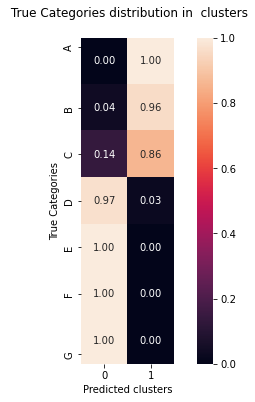

In [46]:
plot_confusion_matrix(categories, actual_class_list, best_param["predictions"])
print("best silhouette score:",best_param["score"].round(3), "\nparameters:", best_param["params"])

DBSCAN prédit deux principaux clusters comme le montre la matrice de confusion ci-dessus comme nous l'avions remarqué dans la représentation des individus de l'ACP. La valeur du meilleur score en dit long sur la pertinence de choisir un alogorithme de clustering pour cette étude.
Toutefois, testons le cas où les parametres predisent 7 clusters.

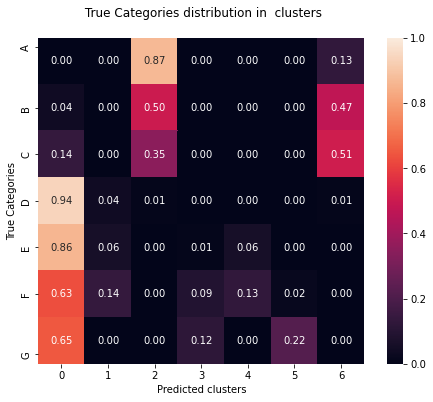

In [47]:
seven_clusters= [cluster_param for cluster_param in dbscan_clusters if cluster_param["n_clusters"]==7][-1]

dbscan_grid = DBSCAN(eps = seven_clusters["eps_val"],
                     min_samples = seven_clusters["samples_val"])

            # fit_transform
pred_clust = dbscan_grid.fit_predict(X)
plot_confusion_matrix(categories, actual_class_list, pred_clust)

Ici egalement deux grande tendances se dégagent avec d'un coté les batiment a faible efficacité energétique et d'autre part la batiment a efficacité energétique elevée. Toutefois, on observe une subdivision des categories B et C dans deux clusters.En se basant sur la repéresentation des individus, on pourrait expliquer cela par le fait qu'il y a une discontinuité dans leur distribution; ce qui divise les données en deux.
Egalement, nous remarquons que les valeurs aberrantes de B et C qui apparaissent après des categories E, F, G sont reproduites via les valeurs (B,0) et (C,0). 

#### Conclusion

Etant donné toutes les etudes menées, nous pouvons concure qu'utiliser les algorithmes de clustering pour predire connaitre exactement l'efficacité energétique des batiments n'est pas une bonné idée.
Toutefois, etant donné que deux tendances se degagent a savoir (A, B,C) et (D,E,F,G), ces algorithmes permettent d'avoir une idée grossière idéee sur l'éfficacité d'un batiment.
On pourrait également les utiliser pour entrainer deux modèles de classification différents pour les deux tendances. 

# II. MODEL

Dans un premier temps, nous transformons les données catégorielles (la variable *Orientation*) en données binaires. Etant donné que la *Overall.height* compte 2 unique valeurs, nous la binarisons également.

Nous procédons ensuite à un tirage aléatoire d'un échantillon test qui sera utilisé lors de la phase de test ou d'évaluation des modèles. La partie restante est l'échantillon d'apprentissage qui sera utilisé pour l'estimation des paramètres des modèles.



### Data preprocessing

In [48]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Relative.compactness  768 non-null    float64
 1   Surface.area          768 non-null    float64
 2   Wall.area             768 non-null    float64
 3   Roof.area             768 non-null    float64
 4   Overall.height        768 non-null    float64
 5   orientation           768 non-null    object 
 6   Glazing.area          768 non-null    float64
 7   Glazing.area.distr    768 non-null    int64  
 8   Energy                768 non-null    float64
 9   Energy.efficiency     768 non-null    object 
 10  Height_cat            768 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 66.1+ KB


In [303]:
# Variable explicative
EnergyDum = pd.get_dummies(df_energy[["orientation","Height_cat"]])
EnergyQuant=df_energy[["Relative.compactness","Wall.area","Roof.area","Glazing.area","Glazing.area.distr"]]
df_ener=pd.concat([EnergyQuant, EnergyDum],axis=1)

df_ener.head(10)


Relative.compactness   Wall.area   Roof.area  Glazing.area  \
0              0.982928  306.484593  112.002683      0.016095   
1              0.983547  299.776324  110.048028      0.000000   
2              0.979453  303.374358  106.408431      0.000000   
3              0.977733  292.812213  113.055938      0.000010   
4              0.903029  316.236102  118.366409      0.000000   
5              0.890910  314.916242  121.843724      0.000000   
6              0.903150  320.944671  119.402232      0.000000   
7              0.898619  322.671008  122.973037      0.000000   
8              0.858579  298.629324  146.646975      0.009041   
9              0.855403  298.715776  148.776384      0.000000   

   Glazing.area.distr  orientation_East  orientation_North  orientation_South  \
0                   0                 0                  1                  0   
1                   0                 1                  0                  0   
2                   0                 0                  0                  1   
3                   0                 0                  0                  0   
4                   0                 0                  1                  0   
5                   0                 1                  0                  0   
6                   0                 0                  0                  1   
7                   0                 0                  0                  0   
8                   0                 0                  1                  0   
9                   0                 1                  0                  0   

   orientation_West  Height_cat_3.5_Height  Height_cat_7_Height  
0                 0                      0                    1  
1                 0                      0                    1  
2                 0                      0                    1  
3                 1                      0                    1  
4                 0                      0                    1  
5                 0                      0                    1  
6                 0                      0                    1  
7                 1                      0                    1  
8                 0                      0                    1  
9                 0                      0                    1

In [304]:
# variable à expliquer categorielle pour la classification
Ycat=df_energy["Energy.efficiency"]
# variable à expliquer réelle pour la regression
Yrel=df_energy["Energy"]

In [305]:
random_state = 13

#Split the data in training and test set
X_train,X_test,Ycat_train,Ycat_test=train_test_split(df_ener,Ycat,test_size=0.25,random_state=random_state)
X_train,X_test,Yrel_train,Yrel_test=train_test_split(df_ener,Yrel,test_size=0.25,random_state=random_state)

classes=categories

#binarization of label for multilabel ROC curves
Ycla_test = label_binarize(Ycat_test, classes=classes)
Ycla_train = label_binarize(Ycat_train, classes=classes)

In [306]:
#Normalization

scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
Xr_test = scaler.transform(X_test)

In [307]:
print("class ratio of training set:\n", Ycat_train.value_counts() / len(Ycat_train))

print("\n class ratio of testing set:\n" ,Ycat_test.value_counts() / len(Ycat_test))

class ratio of training set:
 A    0.270833
B    0.149306
F    0.137153
E    0.133681
G    0.116319
D    0.097222
C    0.095486
Name: Energy.efficiency, dtype: float64

 class ratio of testing set:
 A    0.270833
E    0.166667
C    0.130208
B    0.119792
F    0.119792
D    0.119792
G    0.072917
Name: Energy.efficiency, dtype: float64


**Commentaires :** dans les deux échantillons, la classe A est en moyenne 2 fois plus représentée que les autres. 

## II.2. Problème de Classification directe

Pour chaque méthode de classification, nous optimisons le modèle par validation croisée et l'évaluons avec la métrique du taux de mal classés et la matrice de confusion. Nous comparons également les scores des différentes méthodes.

### II.2.1 Regression logistique sans pénalisation

In [54]:
#optimize parameters to perform classifier
param_grid = [    
    {
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000, 3000, 4000, 5000, 7000]
    }
]

logModel=LogisticRegression(penalty='none', random_state= random_state)

clf=GridSearchCV(logModel, param_grid,cv=5,n_jobs=-1)
                                           
logRegOpt=clf.fit(Xr_train, Ycat_train)

#  optimal parameter
print("best score = %f, best paramater = %s" % (logRegOpt.best_score_,logRegOpt.best_params_))

best score = 0.541664, best paramater = {'max_iter': 1000, 'solver': 'lbfgs'}


In [55]:
# error on test sample
logRegTestError = 1-logRegOpt.score(Xr_test, Ycat_test)
print(logRegTestError)

0.47395833333333337


In [56]:
# Prediction
y_chap = logRegOpt.predict(Xr_test)
# normalized confusion matrix
table=pd.crosstab(y_chap,Ycat_test,normalize='columns')

print(table.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.88  0.35  0.28  0.00  0.00  0.00  0.00
B                  0.08  0.39  0.24  0.00  0.00  0.00  0.00
C                  0.04  0.22  0.40  0.04  0.03  0.00  0.00
D                  0.00  0.04  0.08  0.43  0.41  0.17  0.07
E                  0.00  0.00  0.00  0.43  0.22  0.30  0.07
F                  0.00  0.00  0.00  0.00  0.31  0.39  0.14
G                  0.00  0.00  0.00  0.09  0.03  0.13  0.71


**Commentaires :** 88% des immeubles de la **classe A** et 71% de la **classe G** ont été correctement prédits. Les autres catégories ont été correctement prédites avec un pourcentage inférieure à 50%. Malgré la dominance de la classe A sur la classe G, le modèle a pu prédire correctement 71% des immeubles de la classe G.   

Malgré ce résultat nous allons éssayer de voir si  un réquilibrage de l'échantillon améliore la qualité de la classification. Nous allons utiliser le *Condensed Nearest Neighbor (CNN) Rule Undersampling* qui est une technique de sous-échantillonnage qui recherche un sous-ensemble d'une collection d'échantillons qui n'entraîne aucune perte de performances du modèle, appelée ensemble cohérent minimal.

In [57]:
# Create a pipeline
pipeline = make_pipeline(CondensedNearestNeighbour(n_neighbors=1),
                         LogisticRegression(penalty='none',
                                            max_iter = 10000,
                                            solver = 'lbfgs',
                                            random_state= random_state))
imblLogReg = pipeline.fit(Xr_train, Ycat_train)

In [58]:
# error on test sample
1-imblLogReg.score(Xr_test, Ycat_test)

0.5

In [59]:
# Prediction
y_chap = imblLogReg.predict(Xr_test)
# normalized confusion matrix
table=pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(table.round(2))


Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.79  0.30  0.28  0.00  0.00  0.00  0.00
B                  0.13  0.30  0.16  0.00  0.00  0.00  0.00
C                  0.08  0.35  0.48  0.04  0.03  0.00  0.00
D                  0.00  0.04  0.08  0.30  0.19  0.09  0.00
E                  0.00  0.00  0.00  0.43  0.34  0.35  0.14
F                  0.00  0.00  0.00  0.22  0.44  0.52  0.43
G                  0.00  0.00  0.00  0.00  0.00  0.04  0.43


**Commentaires :** Le résultat montre une augmentation du pourcentages des mals classés des classes A, B, D et G, et une dimunition des mals classés des classes C, E et F. Malgré cet amélioration de bien classés sur ces trois classes, nous poursuivrons avec les échantillons initiaux, qui nous donnent une taux d'erreur de test  inférieur à celle avec le *CondensedNearestNeighbour*  

### II.2.2 Regression logistique avec pénalisation
#### 2.2.1 Regression logistique avec une pénalisation de Lasso
Dans une regression logistique multinomiale, 'saga' est le seul solver qui supporte la penalisation de Lasso.


In [60]:
#Optimize parameter of penalization
param_grid = [    
    {
    'C' : np.logspace(-4, 4, 10),
    'max_iter' : [3000, 4000, 5000, 7000]
    }
]

logRegModel=LogisticRegression(penalty='l1', solver='saga', random_state=random_state)

clf=GridSearchCV(logRegModel, param_grid,cv=5,n_jobs=-1)
                                           
logLassOpt=clf.fit(Xr_train, Ycat_train)

#optimal parameter
print("best score = %f, best parameters = %s" % (logLassOpt.best_score_,logLassOpt.best_params_))

best score = 0.543433, best parameters = {'C': 21.54434690031882, 'max_iter': 3000}


In [61]:
# error on test sample
lassoTestError = 1-logLassOpt.score(Xr_test, Ycat_test)
print(lassoTestError)

0.47395833333333337


In [62]:
# Prediction
y_chap = logLassOpt.predict(Xr_test)

# normalized confusion matrix
tableLasso =pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(tableLasso.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.88  0.35  0.28  0.00  0.00  0.00  0.00
B                  0.08  0.39  0.20  0.00  0.00  0.00  0.00
C                  0.04  0.22  0.40  0.04  0.03  0.00  0.00
D                  0.00  0.04  0.12  0.48  0.41  0.13  0.07
E                  0.00  0.00  0.00  0.39  0.22  0.39  0.07
F                  0.00  0.00  0.00  0.00  0.31  0.35  0.14
G                  0.00  0.00  0.00  0.09  0.03  0.13  0.71


**Commentaires :** Lasso dimunie légèrement le taux des mals classés de la classe D et tout en augmentant le taux des mals classés de la classe F, qui malgré tout restent inférieur à 0.5. Le taux de mal classés global reste approximativement le même avec celui sans pénalité.   

In [63]:
#Classification report
reportLasso = classification_report(y_chap,Ycat_test, target_names=classes)
print(reportLasso)

              precision    recall  f1-score   support

           A       0.88      0.75      0.81        61
           B       0.39      0.50      0.44        18
           C       0.40      0.53      0.45        19
           D       0.48      0.34      0.40        32
           E       0.22      0.27      0.24        26
           F       0.35      0.40      0.37        20
           G       0.71      0.62      0.67        16

    accuracy                           0.53       192
   macro avg       0.49      0.49      0.48       192
weighted avg       0.56      0.53      0.54       192



**Recherche des coefficients de Lasso**

In [64]:
# Coefficients
logitLasso=LogisticRegression(penalty="l1",C=logLassOpt.best_params_['C'],solver="saga",
                              max_iter= logLassOpt.best_params_['max_iter'],
                              random_state=random_state)
logitLassoCoef=logitLasso.fit(Xr_train,Ycat_train).coef_
logitLassoclass = logitLasso.fit(Xr_train,Ycat_train).classes_
print(df_ener.columns.values.tolist())
print(logitLassoclass)
print(logitLassoCoef)

['Relative.compactness', 'Wall.area', 'Roof.area', 'Glazing.area', 'Glazing.area.distr', 'orientation_East', 'orientation_North', 'orientation_South', 'orientation_West', 'Height_cat_3.5_Height', 'Height_cat_7_Height']
['A' 'B' 'C' 'D' 'E' 'F' 'G']
[[ 3.1714713  -0.39057061  0.         -3.29804838 -0.34668429  0.17851234
  -0.57722256  0.10624306 -0.03365916  7.06786196 -7.06786196]
 [ 2.74045173  0.          3.94342025 -2.12937095 -0.48164579  0.
  -0.46620228  0.23789166  0.          2.85355784 -2.85355784]
 [-0.77860091 -0.52522571 -0.4158694  -1.77399718 -0.84625565  0.
  -0.36573328  0.39364939 -0.05272523  2.76467216 -2.76467216]
 [ 1.11461422  0.52083742  1.90971702  0.          0.04754199 -0.01314588
   0.          0.          0.02563046 -0.03495439  0.03495439]
 [-1.74736395 -0.72829453 -2.93619775  1.04775284  0.30604681  0.03668913
   0.02791521 -0.02176659 -0.20873168 -0.80076218  0.80076218]
 [ 0.          1.72928089 -1.33632981  1.65821816  0.28489667 -0.01564415
   0.015

**Commentaires** La variable *Overall.height* a une grande influence sur la classe A et est négativement corrélée avec l'efficacité énergetique des immeubles de cette classe. Les variables *orientation_East et orientation_West* n'ont aucune influence sur les immeubles classées dans la catégorie B. 

In [65]:
coef = pd.Series(logitLassoCoef[1], index = X_train.columns)
print("Dans la classe B, Lasso conserve", str(sum(coef != 0)), 
      "variables et en supprime ", df_ener.columns[logitLassoCoef[1]==0].values.tolist())

Dans la classe B, Lasso conserve 8 variables et en supprime  ['Wall.area', 'orientation_East', 'orientation_West']


Text(0.5, 1.0, 'Coefficients du modèle lasso')

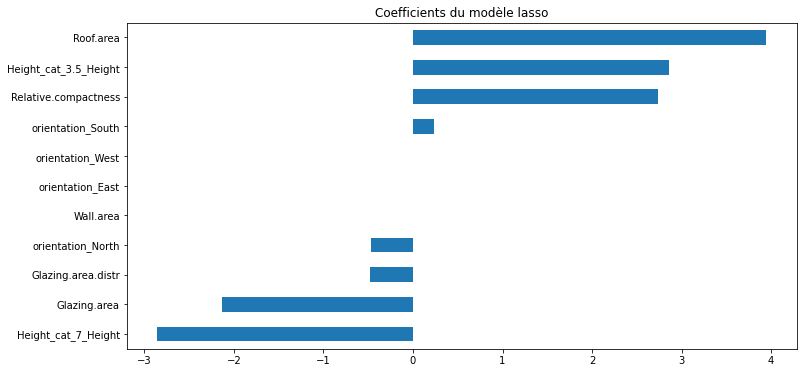

In [66]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (12.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

**Interpretation de l'effet des variables retenues :**  Les variables *Roof.area*, *Overhall.height, Relative.compactness et Glazing.area* ont une très grande importance dans la classification de la catégorie B. 

#### 2.2.1 Regression logistique avec une pénalisation de Ridge


In [67]:
#Optimize parameter of penalization
param_grid = [    
    {
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'C' : np.logspace(-4, 4, 10),
    'max_iter' : [3000, 4000, 5000, 7000]
    }
]

logModel=LogisticRegression(penalty='l2', random_state = random_state)

clf=GridSearchCV(logModel, param_grid,cv=5,n_jobs=-1)
                                           
logitRidgeOpt=clf.fit(Xr_train, Ycat_train)

#  optimal parameter
print("best score = %f, best parameter = %s" % (logitRidgeOpt.best_score_,logitRidgeOpt.best_params_))

best score = 0.545142, best parameter = {'C': 21.54434690031882, 'max_iter': 3000, 'solver': 'lbfgs'}


In [68]:
# error on test sample
ridgeTestError = 1-logitRidgeOpt.score(Xr_test, Ycat_test)
print(ridgeTestError)

0.47395833333333337


In [69]:
# Prediction
y_chap = logitRidgeOpt.predict(Xr_test)

# normalized confusion matrix
table=pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(table.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.88  0.39  0.24  0.00  0.00  0.00  0.00
B                  0.08  0.30  0.24  0.00  0.00  0.00  0.00
C                  0.04  0.26  0.40  0.04  0.03  0.00  0.00
D                  0.00  0.04  0.12  0.52  0.38  0.13  0.07
E                  0.00  0.00  0.00  0.35  0.25  0.39  0.07
F                  0.00  0.00  0.00  0.00  0.31  0.35  0.14
G                  0.00  0.00  0.00  0.09  0.03  0.13  0.71


**Commentaires :** On obtient le même résultat que celui obtenu avec Lasso. Ridge n'améliore pas significativement la classsification.

### II.2.3 Optimal decision tree


In [70]:
# Optimize the depth of tree
param=[{"max_depth":[None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50],
        'criterion': ['gini', 'entropy']
       }]

tree= GridSearchCV(DecisionTreeClassifier(random_state = random_state),
                   param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Ycat_train)

# paramètre optimal
print("best score = %f, best parameter = %s" % (treeOpt.best_score_,treeOpt.best_params_))

best score = 0.617967, best parameter = {'criterion': 'entropy', 'max_depth': 5}


In [71]:
# error on test sample
optTestError = 1.-treeOpt.score(Xr_test, Ycat_test)
print(optTestError)

0.34375


In [72]:
# Prediction
y_chap = treeOpt.predict(Xr_test)

# normalized confusion matrix
tableTree=pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(tableTree.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.96  0.39  0.08  0.00  0.00  0.00  0.00
B                  0.04  0.57  0.40  0.00  0.00  0.00  0.00
C                  0.00  0.00  0.40  0.04  0.00  0.00  0.00
D                  0.00  0.00  0.04  0.35  0.03  0.00  0.00
E                  0.00  0.04  0.08  0.61  0.66  0.35  0.00
F                  0.00  0.00  0.00  0.00  0.31  0.61  0.29
G                  0.00  0.00  0.00  0.00  0.00  0.04  0.71


**Commentaires:** L'arbre de decision améliore la classification. Comparé à la regression logistique, on a ici un une augmentaion du taux des biens classés des classes A, B, E et F. Il n y a plus que les classes C et D qui ont des taux de bien classés inférieurs à 0.6. Avec l'ajout de la non-linéarité, le taux de mal classé est passé de 0.47 à 0.34. Ce qui améliore considérablement la classification

In [73]:
#Classification report
reporTree = classification_report(y_chap,Ycat_test, target_names=classes)
print(reporTree)

              precision    recall  f1-score   support

           A       0.96      0.82      0.88        61
           B       0.57      0.52      0.54        25
           C       0.40      0.91      0.56        11
           D       0.35      0.80      0.48        10
           E       0.66      0.46      0.54        46
           F       0.61      0.50      0.55        28
           G       0.71      0.91      0.80        11

    accuracy                           0.66       192
   macro avg       0.61      0.70      0.62       192
weighted avg       0.71      0.66      0.66       192



In [74]:
#Decsion Tree with optimal parameters
DectreeClf = DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'],
                                    criterion=treeOpt.best_params_['criterion'],
                                    random_state = random_state)
treeClf = DectreeClf.fit(Xr_train, Ycat_train)

In [75]:
#features importances
treeClf.feature_importances_

array([0.06111513, 0.21921386, 0.01756869, 0.20522375, 0.00915475,
       0.        , 0.        , 0.        , 0.        , 0.48772381,
       0.        ])

Text(0.5, 1.0, 'Decision Tree features importance')

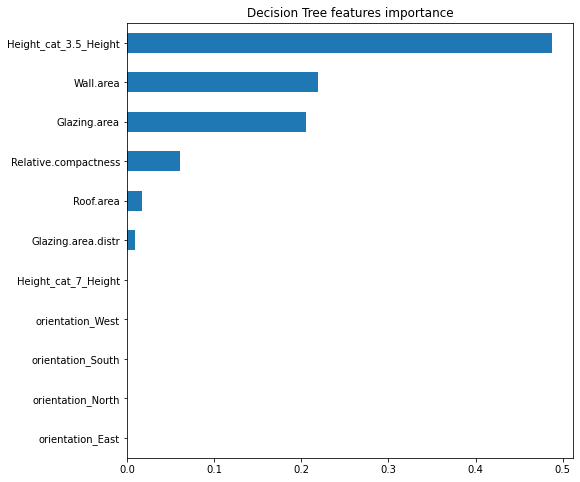

In [76]:
#plot features importance
featImport = pd.Series(treeClf.feature_importances_, index = X_train.columns)
imp_featImport = featImport.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_featImport.plot(kind = "barh")
plt.title(u"Decision Tree features importance")

**Commentaires :** Avec le modèle de l'arbre de decision,toutes  les variables *orientations* sont supprimés, tandis que les autres variables ont plus ou moins une grande importance dans la classification des immeubles. Remarquons néanmoins que la variable *hauteur=3.5m" a une grande importance dans le modèle. 

In [77]:
# export graph of tree
export_graphviz(treeClf,
                     out_file="tree.dot",
                     feature_names =X_train.columns.values.tolist() , 
                     class_names=classes,
                     filled = True)


**Remarque:**
Les arbres binaires de décision  implémentés dans scikit-learn présentent une insuffisance pour leur élagage. Ce n'est pas une pénalisation de la complexité, et donc précisément le nombre de feuilles qui est optimisé, mais la profondeur globale de l'arbre au risque d'élaguer, à une profondeur donnée, des feuilles importantes ou de conserver des feuilles ambigües. Nous le ferons sur R.

### II.2.4 Random Forest Classification

In [78]:
#Optimize parameter of penalization
param_grid = [    
    {
    'n_estimators' : [10, 20, 30],
    'max_depth' : [None, 1, 2, 4, 8, 16, 32],
    'max_features' : ['auto', 1.0, 0.3, 0.1],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
    }
]

RFModel=RandomForestClassifier(random_state = random_state)

clf=GridSearchCV(RFModel, param_grid,cv=5,n_jobs=-1)
                                           
RFOpt=clf.fit(Xr_train, Ycat_train)


In [79]:
#  optimal parameter
print("best score = %f, best parameter = %s" % (RFOpt.best_score_,RFOpt.best_params_))

best score = 0.638876, best parameter = {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 20}


In [80]:
# error on test sample
RFTestError = 1-RFOpt.score(Xr_test, Ycat_test)
print(RFTestError)

0.38020833333333337


In [81]:
# Prediction
y_chap = RFOpt.predict(Xr_test)

# normalized confusion matrix
tableRF=pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(tableRF.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.88  0.30  0.20  0.00  0.00  0.00  0.00
B                  0.08  0.43  0.16  0.00  0.00  0.00  0.00
C                  0.04  0.26  0.52  0.09  0.00  0.00  0.00
D                  0.00  0.00  0.08  0.57  0.22  0.00  0.00
E                  0.00  0.00  0.04  0.35  0.47  0.35  0.00
F                  0.00  0.00  0.00  0.00  0.31  0.57  0.36
G                  0.00  0.00  0.00  0.00  0.00  0.09  0.64


In [82]:
#Classification report
reportRF = classification_report(y_chap,Ycat_test, target_names=classes)
print(reportRF)

              precision    recall  f1-score   support

           A       0.88      0.79      0.84        58
           B       0.43      0.56      0.49        18
           C       0.52      0.57      0.54        23
           D       0.57      0.59      0.58        22
           E       0.47      0.47      0.47        32
           F       0.57      0.46      0.51        28
           G       0.64      0.82      0.72        11

    accuracy                           0.62       192
   macro avg       0.58      0.61      0.59       192
weighted avg       0.63      0.62      0.62       192



**Commentaires:** Comparé au *Decison tree*, le *Random Forest* dimunie le taux des mals classés des classes A B, E, F et G, mais améliore également le taux des bien classés des classes C et D qui sont au dessus de 50%. Le taux de mal classés global de RF (0,38) est supérieure à celui de *Decison Tree*, mais rest meilleure que celui de la regression logistique.

In [83]:
#Random Forest with optimal parameters
RanForClf = RandomForestClassifier(max_depth=RFOpt.best_params_['max_depth'],
                                    criterion=RFOpt.best_params_['criterion'],
                                    min_samples_leaf=RFOpt.best_params_['min_samples_leaf'],
                                    n_estimators = RFOpt.best_params_['n_estimators'],
                                    random_state = random_state
                                    )
RFClf = RanForClf.fit(Xr_train, Ycat_train)

In [84]:
#features importances
RFClf.feature_importances_

array([0.19795515, 0.15342951, 0.17882744, 0.13192211, 0.04552107,
       0.00719544, 0.00685912, 0.00657059, 0.0068957 , 0.08839869,
       0.17642518])

Text(0.5, 1.0, 'Random Forest features importance')

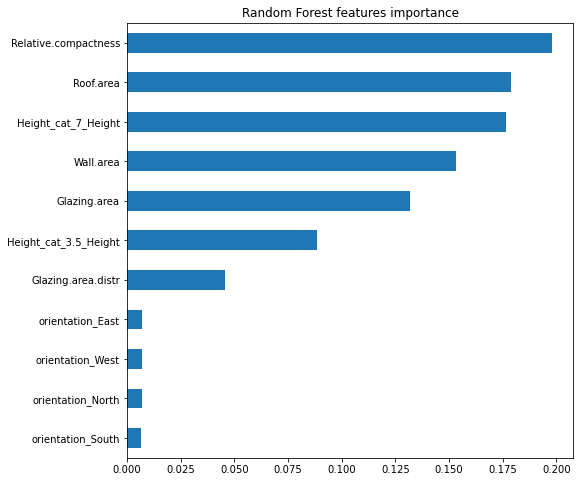

In [85]:
#plot features importance
featImport = pd.Series(RFClf.feature_importances_, index = X_train.columns)
imp_featImport = featImport.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_featImport.plot(kind = "barh")
plt.title(u"Random Forest features importance")

**Commentaires :** les variables *Relative.compatcness, Roof.area, Height=7m, Wall.area, Glazing.area, et Height=3.5m * ont une grande importance comparées à celle des orientations. Elles influencent grandément notre classification

### II.2.5 Boosting Classification

#### II.2.5.1 GradientBoostingClassifier

In [86]:

#Optimize parameter of penalization
param_grid = [    
    {
    'loss' :['deviance', 'exponential'],
    'learning_rate': [1e-1, 1e-2, 1e-3],
    'n_estimators' : [100, 150, 200],
    'max_depth' : [3, 4, 8, 16, 32],
    'min_samples_leaf': [1, 3, 5, 9],
    'criterion': ['friedman_mse', 'mse', 'mae']
    }
]

GradBoosClf=GradientBoostingClassifier(random_state = random_state)

clf=GridSearchCV(GradBoosClf, param_grid,cv=5,n_jobs=-1)
                                           
GBOpt=clf.fit(Xr_train, Ycat_train)

In [87]:
#  optimal parameter
print("best score = %f, best parameter = %s" % (GBOpt.best_score_,GBOpt.best_params_))

best score = 0.623193, best parameter = {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 200}


In [88]:
# error on test sample
1-GBOpt.score(Xr_test, Ycat_test)

0.39583333333333337

In [89]:
# Prediction
y_chap = GBOpt.predict(Xr_test)

# normalized confusion matrix
tableGB=pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(tableGB.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.88  0.17  0.12  0.00  0.00  0.00  0.00
B                  0.12  0.61  0.36  0.00  0.00  0.00  0.00
C                  0.00  0.17  0.44  0.04  0.00  0.00  0.00
D                  0.00  0.00  0.00  0.39  0.25  0.04  0.00
E                  0.00  0.04  0.08  0.57  0.44  0.35  0.00
F                  0.00  0.00  0.00  0.00  0.31  0.48  0.21
G                  0.00  0.00  0.00  0.00  0.00  0.13  0.79


In [90]:
#Classification report
reportGB = classification_report(y_chap,Ycat_test, target_names=classes)
print(reportGB)

              precision    recall  f1-score   support

           A       0.88      0.87      0.88        53
           B       0.61      0.48      0.54        29
           C       0.44      0.69      0.54        16
           D       0.39      0.50      0.44        18
           E       0.44      0.37      0.40        38
           F       0.48      0.46      0.47        24
           G       0.79      0.79      0.79        14

    accuracy                           0.60       192
   macro avg       0.58      0.59      0.58       192
weighted avg       0.61      0.60      0.60       192



**Commentaires:** Comparé au *Random Forest*, le *Gradient Boosting* dimunie le taux des mals classés des classes C, D, E, et F, mais améliore le taux des bien classés des classes B et G qui sont au dessus de 60%. Le taux de mal classés global (0,39) est légèrement supérieure à celui de *Random Forest*, mais reste meilleure que celui de la regression logistique. Ceci dû aux effet de non-linarité.

In [91]:
#Gradient Boosting with optimal parameters
GradBoostClf = GradientBoostingClassifier(max_depth=GBOpt.best_params_['max_depth'],
                                    criterion=GBOpt.best_params_['criterion'],
                                    min_samples_leaf=GBOpt.best_params_['min_samples_leaf'],
                                    loss = GBOpt.best_params_['loss'],
                                    learning_rate = GBOpt.best_params_['learning_rate'],
                                    n_estimators = GBOpt.best_params_['n_estimators'],
                                    random_state = random_state
                                    )
GBClf = GradBoostClf.fit(Xr_train, Ycat_train)

In [92]:
#features importances
GBClf.feature_importances_

array([0.25354823, 0.16970536, 0.24574227, 0.21730698, 0.01657704,
       0.00320148, 0.00959048, 0.00510397, 0.00642187, 0.03659146,
       0.03621086])

Text(0.5, 1.0, 'Gradient Boosting features importance')

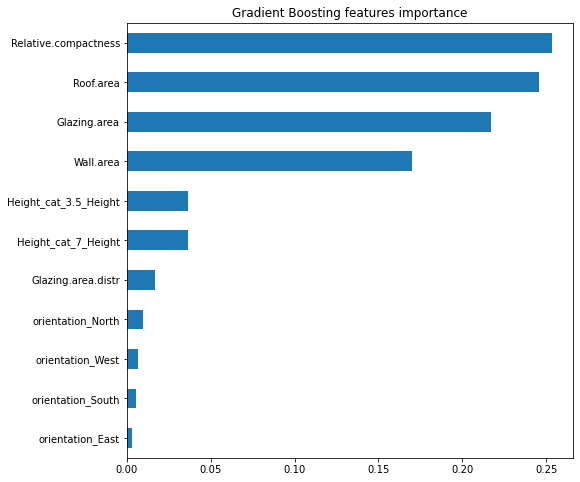

In [93]:
#plot features importance
featImport = pd.Series(GBClf .feature_importances_, index = X_train.columns)
imp_featImport = featImport.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_featImport.plot(kind = "barh")
plt.title(u"Gradient Boosting features importance")

**Commentaires :** les variables *Relative.compatcness, Roof.area, Glazing.area et Wall.area* ont une grande importance comparées aux autres variables. Elles influencent significativement notre modèle.

#### II.2.5.2 AdaBoostingClassifier

In [94]:
#Optimize parameter of penalization
param_grid = [    
    {
    'base_estimator' :[DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=4),
                       DecisionTreeClassifier(max_depth=8), DecisionTreeClassifier(max_depth=16)],
    'learning_rate': [1e-1, 1e-2, 1e-3],
    'n_estimators' : [100, 150,200],
    'algorithm': ['SAMME', 'SAMME.R']
    }
]

AdaBoosClf=AdaBoostClassifier(random_state = random_state)

clf=GridSearchCV(AdaBoosClf, param_grid,cv=5,n_jobs=-1)
                                           
AdaBoosOpt=clf.fit(Xr_train, Ycat_train)

In [95]:
#  optimal parameter
print("best score = %f, best parameter = %s" % (AdaBoosOpt.best_score_,AdaBoosOpt.best_params_))

best score = 0.630150, best parameter = {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4), 'learning_rate': 0.01, 'n_estimators': 200}


In [96]:
# error on test sample
AdBoosTestError = 1-AdaBoosOpt.score(Xr_test, Ycat_test)
print(AdBoosTestError)

0.38541666666666663


In [97]:
# Prediction
y_chap = AdaBoosOpt.predict(Xr_test)

# normalized confusion matrix
tableAB=pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(tableAB.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.88  0.30  0.12  0.00  0.00  0.00  0.00
B                  0.12  0.48  0.32  0.00  0.00  0.00  0.00
C                  0.00  0.17  0.48  0.09  0.00  0.00  0.00
D                  0.00  0.00  0.00  0.35  0.16  0.00  0.00
E                  0.00  0.04  0.08  0.57  0.53  0.35  0.00
F                  0.00  0.00  0.00  0.00  0.31  0.65  0.36
G                  0.00  0.00  0.00  0.00  0.00  0.00  0.64


**Commentaires:** Comparé au *Gradient Boosting*, le *Ada Boosting* augmente le taux des mals classés des classes B, D et G, et améliore le taux des bien classés des classes F, E et C. Le taux de mal classés global (0,385) est légèrement supérieure à celui de *Random Forest*, mais est légèrement meilleure que celui du gradient bossting.

In [98]:
#Classification report
reportAB = classification_report(y_chap,Ycat_test, target_names=classes)
print(reportAB)

              precision    recall  f1-score   support

           A       0.88      0.82      0.85        56
           B       0.48      0.44      0.46        25
           C       0.48      0.67      0.56        18
           D       0.35      0.62      0.44        13
           E       0.53      0.41      0.47        41
           F       0.65      0.50      0.57        30
           G       0.64      1.00      0.78         9

    accuracy                           0.61       192
   macro avg       0.57      0.64      0.59       192
weighted avg       0.63      0.61      0.62       192



In [99]:
#Ada Boosting with optimal parameters
AdaBoostClf = AdaBoostClassifier(base_estimator=AdaBoosOpt.best_params_['base_estimator'],
                                    algorithm= AdaBoosOpt.best_params_['algorithm'],
                                    learning_rate = AdaBoosOpt.best_params_['learning_rate'],
                                    n_estimators = AdaBoosOpt.best_params_['n_estimators'],
                                    random_state = random_state
                                    )
ABClf = AdaBoostClf.fit(Xr_train, Ycat_train)

In [100]:
#features importances
ABClf.feature_importances_

array([0.08306774, 0.15438463, 0.19734703, 0.20884857, 0.01216174,
       0.00233228, 0.00055393, 0.        , 0.        , 0.1427556 ,
       0.19854849])

Text(0.5, 1.0, 'Ada Boosting features importance')

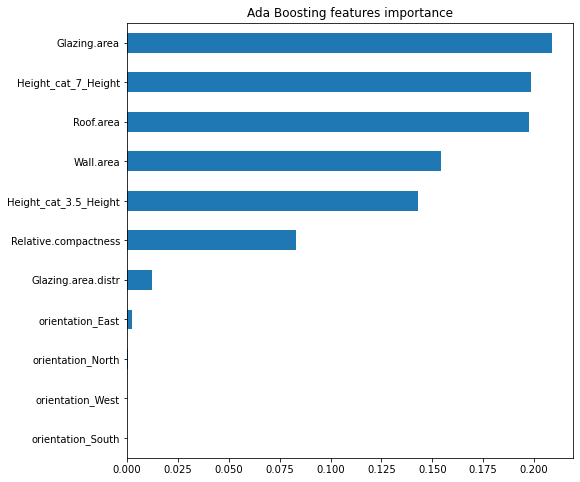

In [101]:
#plot features importance
featImport = pd.Series(ABClf .feature_importances_, index = X_train.columns)
imp_featImport = featImport.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_featImport.plot(kind = "barh")
plt.title(u"Ada Boosting features importance")

**Commentaires** Toutes les variables orientations n'ont en effet pas une influence sur notre modèle de classification. 

### II.2.6 Support Vector Machine

#### II.2.6.1 Support Vector Machine for linear kernel

In [102]:
#Optimize parameter

param_grid = [    
    {
    'C' : [1, 1e1, 1e2, 1e3, 1e4],
    'tol' : [1e-3, 1e-4]
    }
]

SVCModel=SVC(kernel = 'linear', random_state = random_state)

clf=GridSearchCV(SVCModel, param_grid,cv=5,n_jobs=-1)
                                           
SVCOpt=clf.fit(Xr_train, Ycat_train)


In [103]:
#  optimal parameter
print("best score = %f, best parameter = %s" % (SVCOpt.best_score_,SVCOpt.best_params_))

best score = 0.531169, best parameter = {'C': 10000.0, 'tol': 0.001}


In [104]:
# error on test sample
SVCLinTestError = 1-SVCOpt.score(Xr_test, Ycat_test)
print(SVCLinTestError)

0.484375


In [105]:
# Prediction
y_chap = SVCOpt.predict(Xr_test)

# normalized confusion matrix
tableSVCLin=pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(tableSVCLin.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.88  0.35  0.24  0.00  0.00  0.00  0.00
B                  0.10  0.39  0.24  0.00  0.00  0.00  0.00
C                  0.02  0.22  0.36  0.00  0.00  0.00  0.00
D                  0.00  0.04  0.16  0.57  0.50  0.17  0.21
E                  0.00  0.00  0.00  0.35  0.16  0.39  0.07
F                  0.00  0.00  0.00  0.00  0.31  0.35  0.07
G                  0.00  0.00  0.00  0.09  0.03  0.09  0.64


**Commentaires** Le taux global de mal classés pour le SVM avec un kernel linéaire est supérieur aux taux de tous les modèles étudiés plus haut. 

In [106]:
#Classification report
reportSVCLin= classification_report(y_chap,Ycat_test, target_names=classes)
print(reportSVCLin)

              precision    recall  f1-score   support

           A       0.88      0.77      0.82        60
           B       0.39      0.45      0.42        20
           C       0.36      0.60      0.45        15
           D       0.57      0.32      0.41        41
           E       0.16      0.22      0.18        23
           F       0.35      0.42      0.38        19
           G       0.64      0.64      0.64        14

    accuracy                           0.52       192
   macro avg       0.48      0.49      0.47       192
weighted avg       0.57      0.52      0.53       192



In [107]:
#SVC with optimal parameters
SVClf = SVC(C=SVCOpt.best_params_['C'],
                                    kernel = 'linear',
                                    tol = SVCOpt.best_params_['tol'],
                                    random_state = random_state
                                    )
SVClf = SVClf.fit(Xr_train, Ycat_train)

#### II.2.6.2 Support Vector Machine for polynomial kernel


In [108]:
#Optimize parameter


param_grid = [    
    {
    'C' : [1, 1e1, 1e2, 1e3, 1e4],
    'tol' : [1e-3, 1e-4],
    'gamma' : [1e0, 1e-1, 1e-2, 1e-3],
    'degree' : [3, 4, 5]
    }
]

SVCPolyModel=SVC(kernel = 'poly', random_state = random_state)

clf=GridSearchCV(SVCPolyModel, param_grid, cv=5, n_jobs=-1)
                                           
SVCPolyOpt=clf.fit(Xr_train, Ycat_train)


In [109]:
#  optimal parameter
print("best score = %f, best parameter = %s" % (SVCPolyOpt.best_score_,SVCPolyOpt.best_params_))

best score = 0.574558, best parameter = {'C': 10.0, 'degree': 3, 'gamma': 0.1, 'tol': 0.001}


In [110]:
# error on test sample
SVCPolyTestError = 1-SVCPolyOpt.score(Xr_test, Ycat_test)
print(SVCPolyTestError)

0.46354166666666663


In [111]:
# Prediction
y_chap = SVCPolyOpt.predict(Xr_test)

# normalized confusion matrix
tableSVCPoly=pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(tableSVCPoly.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.79  0.43  0.20  0.00  0.00  0.00  0.00
B                  0.15  0.30  0.36  0.00  0.00  0.00  0.00
C                  0.06  0.22  0.36  0.04  0.03  0.00  0.00
D                  0.00  0.04  0.08  0.52  0.25  0.09  0.07
E                  0.00  0.00  0.00  0.26  0.41  0.39  0.00
F                  0.00  0.00  0.00  0.09  0.31  0.43  0.14
G                  0.00  0.00  0.00  0.09  0.00  0.09  0.79


**Commentaires** Le kernel Polynomial améliore légèrement le taux de mal classés comparé à celui du kernel linéaire.

In [112]:
#Classification report
reportSVCPoly = classification_report(y_chap,Ycat_test, target_names=classes)
print(reportSVCPoly)

              precision    recall  f1-score   support

           A       0.79      0.73      0.76        56
           B       0.30      0.29      0.30        24
           C       0.36      0.47      0.41        19
           D       0.52      0.46      0.49        26
           E       0.41      0.46      0.43        28
           F       0.43      0.42      0.43        24
           G       0.79      0.73      0.76        15

    accuracy                           0.54       192
   macro avg       0.51      0.51      0.51       192
weighted avg       0.55      0.54      0.54       192



In [113]:
#SVC with optimal parameters
SVCPolyClf = SVC(C=SVCPolyOpt.best_params_['C'],
                                    kernel = 'poly',
                                    gamma = SVCPolyOpt.best_params_['gamma'],
                                    tol = SVCPolyOpt.best_params_['tol'],
                                    degree = SVCPolyOpt.best_params_['degree'],
                                    random_state = random_state
                                    )
SVCPoly = SVCPolyClf.fit(Xr_train, Ycat_train)

#### II.2.6.3 Support Vector Machine for RBF kernel


In [114]:
#Optimize parameter

param_grid = [    
    {
    'C' : [1, 1e1, 1e2, 1e3, 1e4],
    'tol' : [1e-3, 1e-4],
    'gamma' : [1e0, 1e-1, 1e-2, 1e-3]
    }
]

SvcRbfModel=SVC(kernel = 'rbf', random_state = random_state)

clf=GridSearchCV(SVCPolyModel, param_grid, cv=5, n_jobs=-1)
                                           
SvcRbfOpt=clf.fit(Xr_train, Ycat_train)


In [115]:
#  optimal parameter
print("best score = %f, best parameter = %s" % (SvcRbfOpt.best_score_,SvcRbfOpt.best_params_))

best score = 0.574558, best parameter = {'C': 10.0, 'gamma': 0.1, 'tol': 0.001}


In [116]:
# error on test sample
SVCRbfTestError = 1-SvcRbfOpt.score(Xr_test, Ycat_test)
print(SVCRbfTestError)

0.46354166666666663


In [117]:
# Prediction
y_chap = SvcRbfOpt.predict(Xr_test)

# normalized confusion matrix
tableSVCRBF=pd.crosstab(y_chap,Ycat_test,normalize='columns')
print(tableSVCRBF.round(2))



Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.79  0.43  0.20  0.00  0.00  0.00  0.00
B                  0.15  0.30  0.36  0.00  0.00  0.00  0.00
C                  0.06  0.22  0.36  0.04  0.03  0.00  0.00
D                  0.00  0.04  0.08  0.52  0.25  0.09  0.07
E                  0.00  0.00  0.00  0.26  0.41  0.39  0.00
F                  0.00  0.00  0.00  0.09  0.31  0.43  0.14
G                  0.00  0.00  0.00  0.09  0.00  0.09  0.79


**Commentaires** Le kernel radial n'améliore pas le taux de mals classés obtenu avec le kernel polynomial.

In [118]:
#Classification report
reportSVCRBF = classification_report(y_chap,Ycat_test, target_names=classes)
print(reportSVCRBF)

              precision    recall  f1-score   support

           A       0.79      0.73      0.76        56
           B       0.30      0.29      0.30        24
           C       0.36      0.47      0.41        19
           D       0.52      0.46      0.49        26
           E       0.41      0.46      0.43        28
           F       0.43      0.42      0.43        24
           G       0.79      0.73      0.76        15

    accuracy                           0.54       192
   macro avg       0.51      0.51      0.51       192
weighted avg       0.55      0.54      0.54       192



In [119]:
#SVC with optimal parameters
SvcRbfClf = SVC(C=SvcRbfOpt.best_params_['C'],
                                    kernel = 'poly',
                                    gamma = SvcRbfOpt.best_params_['gamma'],
                                    tol = SvcRbfOpt.best_params_['tol'],
                                    random_state = random_state
                                    )
SvcRbf = SvcRbfClf.fit(Xr_train, Ycat_train)



### II.2.7 Comparaison des performances 

Dans cette partie, nous comparons le taux des mal classés obtenu avec l'échantillon de test des différents modèles. Nous comparons les modèles de regression logistique lasso, optimal tree, Random Forest, Adaboosting à l'aide d'une *validation croisée Monte Carlo* étant donné que la taille de notre dataset est 780. 

In [121]:
from sklearn.utils import check_random_state
import time

tps0=time.perf_counter()
check_random_state(13)

# estimators
logit= LogisticRegression(penalty="l1",solver="saga")
tree = DecisionTreeClassifier()
rf   = RandomForestClassifier()
adb  = AdaBoostClassifier()
svc = SVC(kernel = 'rbf')

# Nombre d'itérations
B=10 

# définition des grilles de paramètres
listMethGrid=[
    
    [logit,{
        'C' : np.logspace(-4, 4, 10),
        'max_iter' : [3000, 4000, 5000, 7000]
    }],
    
    [tree,{
        "max_depth":[None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50],
        'criterion': ['gini', 'entropy']
       }],
    
    [rf,{
        'n_estimators' : [10, 20, 30],
        'max_depth' : [None, 1, 2, 4, 8, 16, 32],
        'max_features' : ['auto', 1.0, 0.3, 0.1],
        'min_samples_leaf': [1, 3, 5],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }],
    
    [adb,{
        'base_estimator' :[DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=4),
                       DecisionTreeClassifier(max_depth=8), DecisionTreeClassifier(max_depth=16)],
        'learning_rate': [1e-1, 1e-2, 1e-3],
        'n_estimators' : [150,200,300],
        'algorithm': ['SAMME', 'SAMME.R']
    }],
    
    
    [svc, {
        'C' : [1, 1e1, 1e2, 1e3, 1e4],
        'tol' : [1e-3, 1e-4],
        'gamma' : [1e0, 1e-1, 1e-2, 1e-3]
    }]

]



# Initialisation à 0 
arrayErreur=np.empty((B,5))

for i in range(B):   # itérations sur B échantillons test
    
    # extraction apprentissage et test
    X_train,X_test,Y_train,Y_test=train_test_split(df_ener,Ycat,test_size=0.25)
    scaler = StandardScaler()  
    scaler.fit(X_train.astype(float))  
    Xnet_train = scaler.transform(X_train.astype(float))
    
    # Meme transformation sur le test
    Xnet_test = scaler.transform(X_test.astype(float))
    
    # optimisation de chaque méthode et calcul de l'erreur sur le test
    for j,(method, grid_list) in enumerate(listMethGrid):
        methodGrid=GridSearchCV(method,grid_list,cv=10,n_jobs=-1).fit(Xnet_train, Y_train)
        methodOpt = methodGrid.best_estimator_
        methFit=methodOpt.fit(Xnet_train, Y_train)
        arrayErreur[i,j]=1-methFit.score(Xnet_test,Y_test)
tps1=time.perf_counter()

In [122]:
dataframeErreur=pd.DataFrame(arrayErreur,columns=["Logit","Tree","RF","ADB", "SVC"])
print("Temps execution :",(tps1 - tps0))

Temps execution : 10584.771345599998


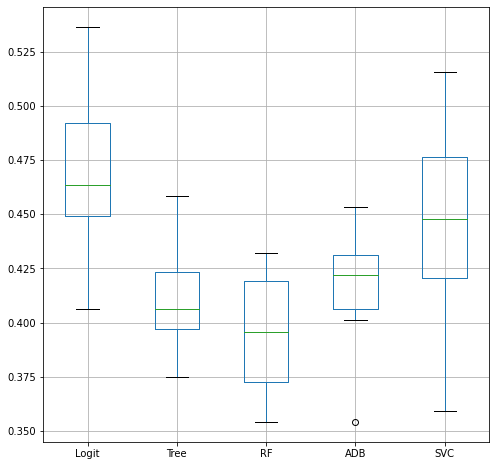

In [123]:
dataframeErreur[["Logit","Tree","RF","ADB", "SVC"]].boxplot(return_type='dict')
plt.show()

In [124]:
dataframeErreur.mean()

Logit    0.469271
Tree     0.410938
RF       0.395313
ADB      0.416667
SVC      0.446354
dtype: float64

**Commentaires :** Avec une validation croisé de Monte-carlo sur une itération de **B=10, "Radom Forest"** se révèle être le meilleur modèle de classification directe pour la prédiction des classes d'énergie. Le taux de mal classé moyen sur ces 10 itérations est égal à 0.39. EN terme de variation, le SVC avec un kernel radial, varie beaucoup. Il est assez volatile et sensible. 

## II.3 Problème de classification indirecte

In [125]:
from scipy import stats

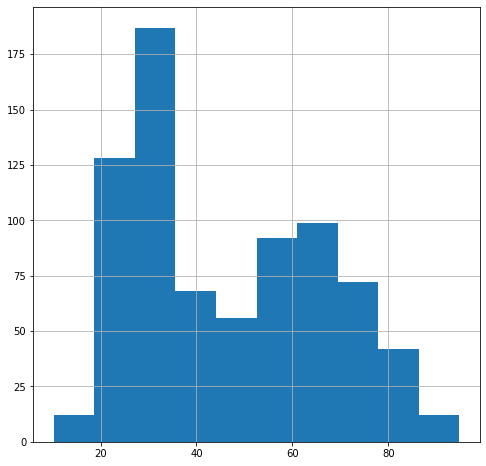

In [126]:
Yrel.hist()
plt.show()

## II.3.1 Prevision par Regression linéaire ou modèle Gaussien

### 3.1.1 Regression Linéaire sans pénalisation

In [127]:


lm = LinearRegression()
lm

LinearRegression()

In [128]:
pip install ipywidgets

In [129]:
lm.fit(Xr_train, 
       Yrel_train)

LinearRegression()

In [130]:
Y_test = lm.predict(Xr_test)

In [131]:
lm.score(Xr_train,Yrel_train)

0.8759844279200635

In [132]:
lm.score(Xr_test,Yrel_test)

0.876359821813611

In [133]:
lm.intercept_, lm.coef_

(47.22043342360051,
 array([-8.27493447, -0.23253181, -8.8171094 ,  4.85459163,  0.09168762,
        -0.42491197,  0.12527706,  0.22386987,  0.07528743, -8.00233881,
         8.00233881]))

In [134]:
print("MSE=", mean_squared_error(Yrel_test, Y_test))

MSE= 42.4338924859722


In [135]:
Y_hat = lm.predict(Xr_train)

In [136]:
# Erreur quadratique moyenne

from sklearn.metrics import mean_squared_error

print("MSE=", mean_squared_error(Yrel_train, Y_hat))

MSE= 50.92238547972625


#### Interpretation: 

Nous constatons que ce modèle generalise bien sur les données inconnues

### Graphe des Résidus

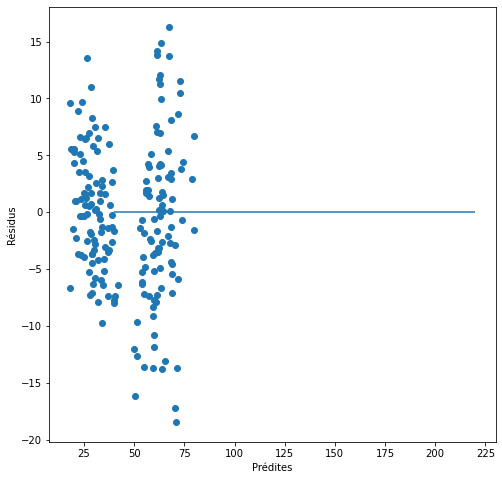

In [137]:
plt.plot(Y_test,Yrel_test-Y_test,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,220)
plt.show()

#### Interpretation

Nous observons que, nos residus ont des variances faibles et sont centrés autour de leur moyenne 0.Donc le modèle linéaire pour notre jeu de données à tendance à expliquer 87% des variations des energies des immeubles.

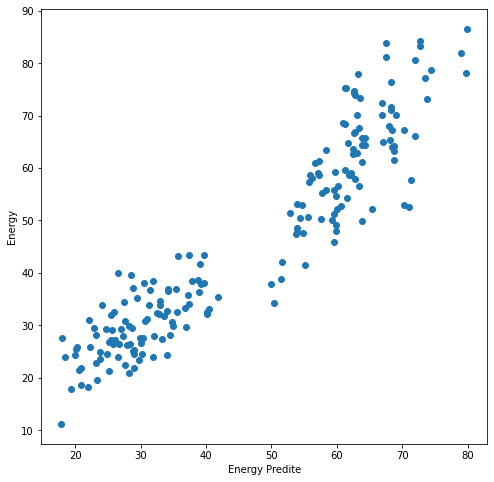

In [138]:
plt.plot(Y_test,Yrel_test,"o")
plt.xlabel(u"Energy Predite")
plt.ylabel("Energy")
plt.show()

#### Interpretation

Nous observons des nuages de points regroupés et dont ayant une varaince faible.Donc notre modèle predit des données de manière precise avec une performance faible

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



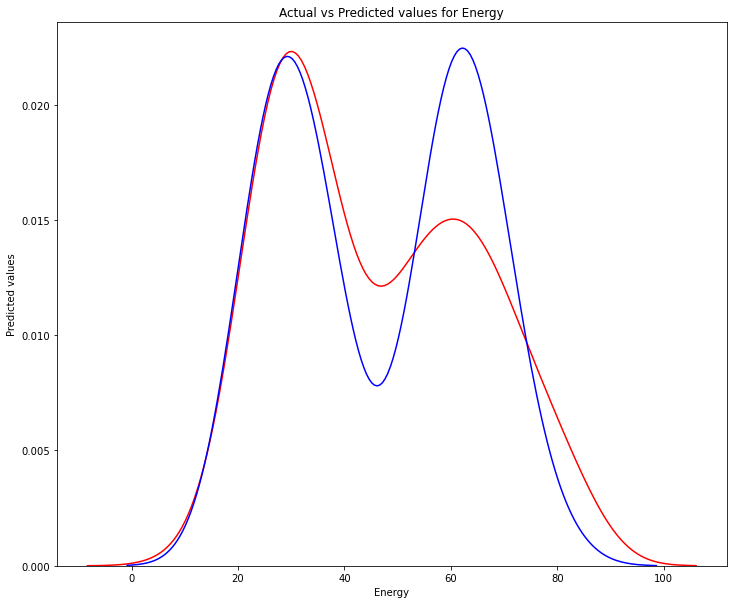

In [139]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(Yrel_test,hist=False, color="r")
sns.distplot(Y_test, hist=False, color="b",ax =ax1)

plt.title('Actual vs Predicted values for Energy')
plt.xlabel('Energy')
plt.ylabel('Predicted values')

plt.show()
plt.close()

#### Interprètation : 

Nous constatons que la courbe (courbe des données tests prédites par notre modèle) en bleue, a une allure qui est proche de celle de la courbe en rouge (données d'entrainements réelles), donc les données predites entre 0 et 30 auront un biais faible, mais lorsque les valeurs seront superieures à 30, nous constatons que cette courbe n'est pas proche de la courbe en rouge (données tests reelles), donc les valeurs predites pour ces données seront biasées.

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



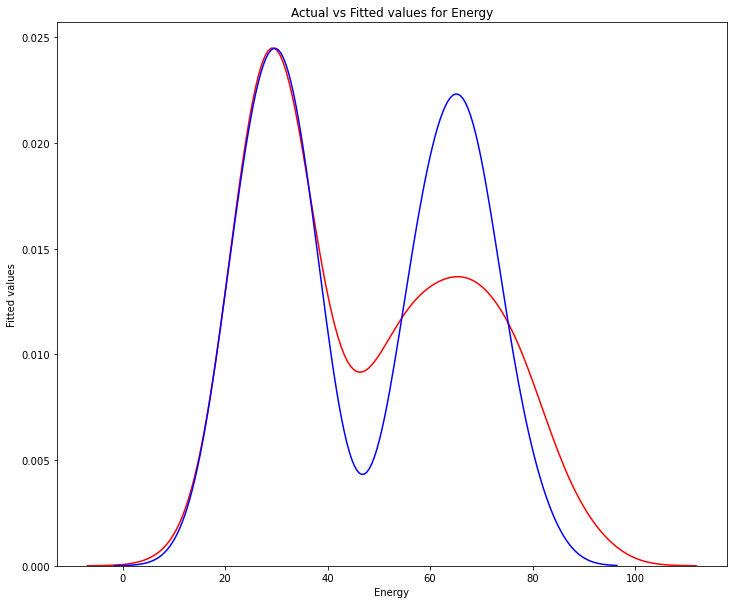

In [140]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(Yrel_train,hist=False, color="r")
sns.distplot(Y_hat, hist=False, color="b",ax =ax1)

plt.title('Actual vs Fitted values for Energy')
plt.xlabel('Energy')
plt.ylabel('Fitted values')

plt.show()
plt.close()

#### Interprètation :

Nous constatons que la courbe (courbe des données d'entrainements prédites par notre modèle) en bleue, a une allure qui est proche de celle de la courbe en rouge (données d'entrainements réelles), donc les données predites entre 0 et 35 auront un biais faible, mais lorsque les valeurs seront superieures à 35, nous constatons que cette courbe n'est pas proche de la courbe en rouge (données reelles), donc les valeurs predites pour ces données seront biasées.

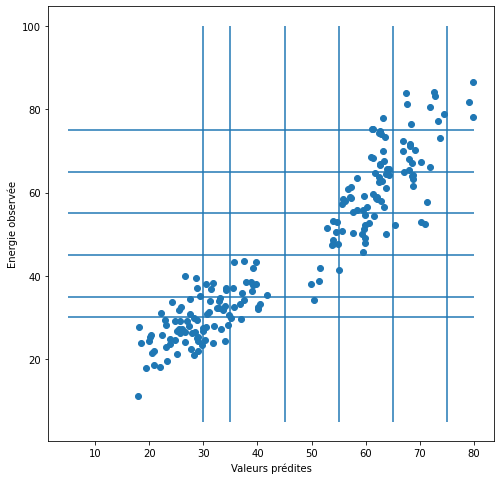

In [141]:
plt.plot(Y_test,Yrel_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Energie observée")
plt.hlines(xmin=5, xmax=80,y=[30,35,45,55,65,75])
plt.vlines(x=[30,35,45,55,65,75],ymin=5, ymax=100)
#plt.vlines(x)
plt.show()

#### Interpretation

Ce nuage des points, permet d'avoir des intervalles de nos prédictions d'energies (classes d'energies).
Il est plus explicité ci-dessous, avec la matrice de confusion.

In [142]:
df_Energy_Pred = pd.DataFrame(Y_test,columns=['Prediction'])

In [143]:
df_Energy_Pred['Prediction_Energy'] = pd.cut(x=df_Energy_Pred['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])

In [144]:
Y_test1=df_Energy_Pred['Prediction_Energy'].values

In [145]:
df_Energy_Pred.head(5)

Prediction Prediction_Energy
0   35.011324                 C
1   23.124240                 A
2   66.914498                 F
3   73.812352                 F
4   37.461881                 C

In [146]:
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(Y_test1,Ycat_test, normalize="columns")
print(table.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.81  0.26  0.16  0.00  0.00  0.00  0.00
B                  0.15  0.43  0.20  0.00  0.00  0.00  0.00
C                  0.04  0.26  0.48  0.00  0.00  0.00  0.00
D                  0.00  0.04  0.12  0.35  0.00  0.00  0.00
E                  0.00  0.00  0.04  0.52  0.81  0.52  0.21
F                  0.00  0.00  0.00  0.13  0.19  0.48  0.57
G                  0.00  0.00  0.00  0.00  0.00  0.00  0.21


#### Interprètation :

Nous constatons qu'il, ** 81% des immeubles ayant une **energie < 30** ( de la **classe A**), 81% de la **classe E** 57% de la **classe G** ont été correctement prédits. Les autres catégories ont été correctement prédites avec un pourcentage inférieure à 50%.

In [308]:


scaler = StandardScaler()

X_d = df_ener
Y_d = df_energy["Energy"]
scaler.fit(X_train)
Xrt_d = scaler.transform(X_d)
Xrr_train = scaler.transform(X_train)
Xrr_test = scaler.transform(X_test)

lr = LinearRegression()
scores=cross_val_score(lr,Xrt_d,Y_d, cv=4)

print(scores)

print("The mean of the folds are:" ,np.mean(scores),"And the standard Deviation is:", scores.std())


[0.76821835 0.87367717 0.87223213 0.86536912]
The mean of the folds are: 0.8448741926647751 And the standard Deviation is: 0.044368424430981906


In [148]:
Ycross = cross_val_predict(lr, Xrt_d,Y_d, cv=4)
print("Y predit est :", Ycross[0:5], "et Y observé est:", Y_d[0:5])

Y predit est : [54.24238558 53.64695381 55.21900261 54.08049466 58.34954918] et Y observé est: 0    34.263943
1    34.589751
2    38.778048
3    37.947808
4    47.675859
Name: Energy, dtype: float64


In [149]:
df_Energy_CV = pd.DataFrame(Ycross,columns=['Prediction'])

In [150]:
df_Energy_CV['Prediction_Energy'] = pd.cut(x=df_Energy_CV['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])

In [151]:
Ycross1=df_Energy_Pred['Prediction_Energy'].values

In [152]:
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(Ycross1,Ycat_test, normalize="columns")
print(table.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.81  0.26  0.16  0.00  0.00  0.00  0.00
B                  0.15  0.43  0.20  0.00  0.00  0.00  0.00
C                  0.04  0.26  0.48  0.00  0.00  0.00  0.00
D                  0.00  0.04  0.12  0.35  0.00  0.00  0.00
E                  0.00  0.00  0.04  0.52  0.81  0.52  0.21
F                  0.00  0.00  0.00  0.13  0.19  0.48  0.57
G                  0.00  0.00  0.00  0.00  0.00  0.00  0.21


#### Interprètation :

Nous constatons que la cross-validation n'ameliore pas les resultats trouvées précèdemment dans la regression linéaire simple

### Regression polynomial


In [153]:
from sklearn.preprocessing import PolynomialFeatures

In [154]:
pr = PolynomialFeatures(degree=3)

pr

PolynomialFeatures(degree=3)

In [155]:
Z_pr = pr.fit_transform(Xr_train)

In [156]:
Z_pr.shape

(576, 364)

In [157]:
Xr_train.shape

(576, 11)

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [159]:
Input = [('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [160]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [161]:
pipe.fit(Xr_train,Yrel_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [162]:
ypipe = pipe.predict(Xr_train)
ypipe[0:4]

array([31.5625, 62.9375, 69.0625, 33.125 ])

In [163]:
from sklearn.metrics import r2_score

In [164]:
r_square = r2_score(Yrel_train, ypipe)

print('The R-square value is: ', r_square)

ypipe.shape

The R-square value is:  0.9027413497264247


(576,)

In [165]:
Yrel_test.shape

(192,)

In [166]:
Xr_test.shape

(192, 11)

In [167]:
Xr_train.shape

(576, 11)

In [168]:
ypipe1 = pipe.predict(Xr_test)
ypipe1[0:5]

array([29.46875, 25.375  , 51.9375 , 69.4375 , 33.6875 ])

In [169]:
r_square2 = r2_score(Yrel_test, ypipe1)

print('The R-square value is: ', r_square2)

The R-square value is:  0.852926180193692


In [170]:
print("True values:", Yrel_test[0:5].values)

True values: [29.88301358 28.20553275 70.03570637 73.1143689  34.16136399]


In [171]:
# Erreur quadratique moyenne

from sklearn.metrics import mean_squared_error

print("MSE=", mean_squared_error(Yrel_test, ypipe1,))

MSE= 50.4764288494786


#### Interpretation : 

Nous constatons qu'avec une regression polynomial degrée 3, est un modèle qui ne géneralise pas avec les données tests qu'il n'a pas encore vu.Car le score sur les données d'entrainements sont superieurs au score sur les données tests et de la meme manière les erreurs sur les données d'entrainements sont moins elévés que celles des données tests

In [172]:
df_Energy_Prr = pd.DataFrame(ypipe1,columns=['Prediction'])

In [173]:
df_Energy_Prr['Prediction_Energy'] = pd.cut(x=df_Energy_Prr['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


ypipe112=df_Energy_Prr['Prediction_Energy'].values

In [174]:
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(ypipe112,Ycat_test)
print(table)

Energy.efficiency   A   B   C  D   E   F  G
row_0                                      
A                  40   8   2  0   0   0  0
B                  10  11  11  0   0   0  0
C                   2   4  10  2   2   0  0
D                   0   0   2  9   7   2  0
E                   0   0   0  9  11   5  1
F                   0   0   0  3   9  14  5
G                   0   0   0  0   3   2  8


**Interprètation :

Cette matrice de confusion, nous permet de confirmer les resultats obtenu plus haut.Le taux de mauvais classement à augmenter.

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



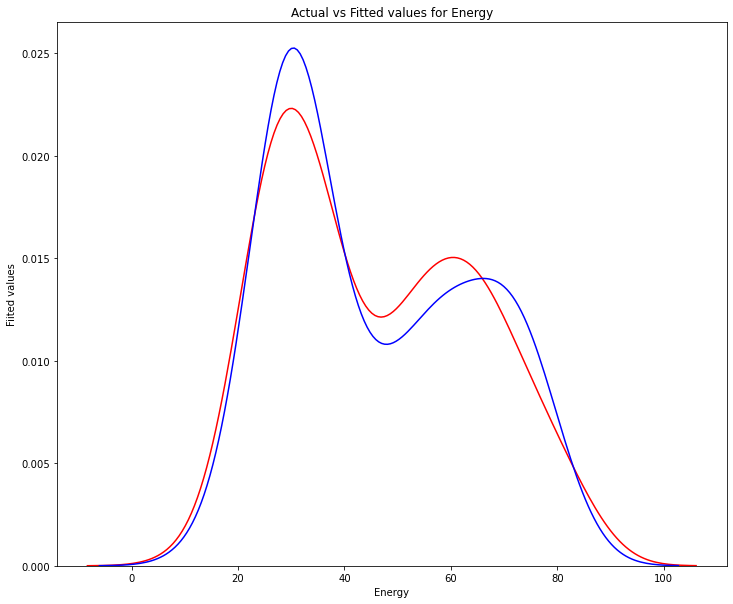

In [175]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(Yrel_test,hist=False, color="r")
sns.distplot(ypipe1, hist=False, color="b",ax =ax1)

plt.title('Actual vs Fitted values for Energy')
plt.xlabel('Energy')
plt.ylabel('Fiited values')

plt.show()
plt.close()

#### Interpretation

Nous remarquons que, la courbe representant les predictions de notre n'ajuste pas de manière precise celle representant les données réelles.Donc un modèle linéaire polynomiale de degrée 3 n'ameliore pas nos resultats sur les données tests de manière significative.

#### II.3.1.1 Regression Linéaire Sans Pénalisation avec suppression des Variables

In this part, we will drop some certains variables, like : dummies variables: orientation, Glazing Area Distribution.

In [176]:
df_energy

Relative.compactness  Surface.area   Wall.area   Roof.area  \
0                0.982928    530.489958  306.484593  112.002683   
1                0.983547    519.872380  299.776324  110.048028   
2                0.979453    516.191221  303.374358  106.408431   
3                0.977733    518.924089  292.812213  113.055938   
4                0.903029    552.968920  316.236102  118.366409   
..                    ...           ...         ...         ...   
763              0.643870    790.290262  348.780889  220.754687   
764              0.619200    809.375965  368.120488  220.627738   
765              0.624317    813.327318  372.006715  220.660302   
766              0.624847    808.717739  367.865290  220.426225   
767              0.623071    806.664478  365.116238  220.774120   

     Overall.height orientation  Glazing.area  Glazing.area.distr     Energy  \
0               7.0       North      0.016095                   0  34.263943   
1               7.0        East      0.000000                   0  34.589751   
2               7.0       South      0.000000                   0  38.778048   
3               7.0        West      0.000010                   0  37.947808   
4               7.0       North      0.000000                   0  47.675859   
..              ...         ...           ...                 ...        ...   
763             3.5        West      0.390400                   5  38.499586   
764             3.5       North      0.386594                   5  41.731977   
765             3.5        East      0.392286                   5  26.876596   
766             3.5       South      0.397574                   5  32.689589   
767             3.5        West      0.404600                   5  29.226938   

    Energy.efficiency  Height_cat  
0                   B    7_Height  
1                   B    7_Height  
2                   C    7_Height  
3                   C    7_Height  
4                   D    7_Height  
..                ...         ...  
763                 C  3.5_Height  
764                 C  3.5_Height  
765                 A  3.5_Height  
766                 B  3.5_Height  
767                 A  3.5_Height  

[768 rows x 11 columns]

In [309]:
# Variable explicative
EnergyDume = pd.get_dummies(df_energy[["Height_cat"]])
EnergyQuante=df_energy[["Relative.compactness","Wall.area","Roof.area","Glazing.area"]]
df_energ=pd.concat([EnergyQuante, EnergyDume],axis=1)
Ze=pd.concat([EnergyQuante, EnergyDume],axis=1)

df_energ.head(10)

# variable à expliquer categorielle pour la classification
Ycat=df_energy["Energy.efficiency"]
# variable à expliquer réelle pour la regression
Yreel=df_energy["Energy"]

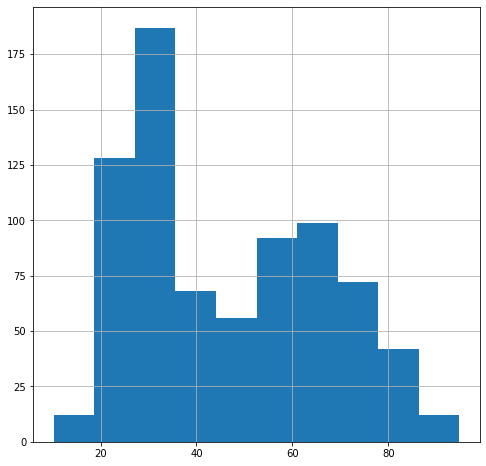

In [178]:
Yreel.hist()
plt.show()

In [310]:
#Split the data in training and test set
from sklearn.model_selection import train_test_split
Xe_train,Xe_test,Ycato_train,Ycato_test=train_test_split(df_energ,Ycat,test_size=0.25,random_state=13)
Xe_train,Xe_test,Yreel_train,Yreel_test=train_test_split(df_energ,Yreel,test_size=0.25,random_state=13)

In [311]:
#Normalosation des données d'apprentissges et de tests
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xe_train)
Xre_train = scaler.transform(Xe_train)
Xre_test = scaler.transform(Xe_test)

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [182]:
df_energ.head(15)

Relative.compactness   Wall.area   Roof.area  Glazing.area  \
0               0.982928  306.484593  112.002683      0.016095   
1               0.983547  299.776324  110.048028      0.000000   
2               0.979453  303.374358  106.408431      0.000000   
3               0.977733  292.812213  113.055938      0.000010   
4               0.903029  316.236102  118.366409      0.000000   
5               0.890910  314.916242  121.843724      0.000000   
6               0.903150  320.944671  119.402232      0.000000   
7               0.898619  322.671008  122.973037      0.000000   
8               0.858579  298.629324  146.646975      0.009041   
9               0.855403  298.715776  148.776384      0.000000   
10              0.859419  291.199628  142.687897      0.000000   
11              0.869087  297.438496  148.349806      0.000000   
12              0.821853  319.599127  149.532949      0.004619   
13              0.822601  313.473813  147.718276      0.000000   
14              0.816247  320.365506  149.080076      0.000000   

    Height_cat_3.5_Height  Height_cat_7_Height  
0                       0                    1  
1                       0                    1  
2                       0                    1  
3                       0                    1  
4                       0                    1  
5                       0                    1  
6                       0                    1  
7                       0                    1  
8                       0                    1  
9                       0                    1  
10                      0                    1  
11                      0                    1  
12                      0                    1  
13                      0                    1  
14                      0                    1

In [183]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
lm1

LinearRegression()

In [184]:
lm1.fit(Xre_train, 
       Yreel_train)

LinearRegression()

In [185]:
Ye_test = lm1.predict(Xre_test)

In [186]:
lm1.score(Xre_test,Yreel_test)

0.8779910607146666

In [187]:
print("R2=", r2_score(Yreel_test,Ye_test))

R2= 0.8779910607146666


In [188]:
lm1.score(Xre_train,Yreel_train)

0.8751445874677167

In [189]:
lm1.intercept_, lm.coef_

(47.22043342360051,
 array([-8.27493447, -0.23253181, -8.8171094 ,  4.85459163,  0.09168762,
        -0.42491197,  0.12527706,  0.22386987,  0.07528743, -8.00233881,
         8.00233881]))

In [190]:
Ye_hatest = lm1.predict(Xre_test)

In [191]:
print("MSE=", mean_squared_error(Yreel_test, Ye_hatest))

MSE= 41.87404359897064


In [192]:
Ye_hat = lm1.predict(Xre_train)

In [193]:
# Erreur quadratique moyenne

from sklearn.metrics import mean_squared_error

print("MSE=", mean_squared_error(Yreel_train, Ye_hat))

MSE= 51.267234747754486


In [194]:
df_energy_PredS = pd.DataFrame(Ye_hatest,columns=['Prediction'])
df_energy_PredS['Prediction_Energy'] = pd.cut(x=df_energy_PredS['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


PrevS=df_energy_PredS['Prediction_Energy'].values
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(PrevS,Ycato_test)
print(table)

Energy.efficiency   A   B   C   D   E   F  G
row_0                                       
A                  44   6   4   0   0   0  0
B                   7  10   5   0   0   0  0
C                   1   6  12   0   0   0  0
D                   0   1   4   8   0   0  0
E                   0   0   0  13  26  12  3
F                   0   0   0   2   6  11  8
G                   0   0   0   0   0   0  3


#### Interpretation

Dans cette partie, nous constatons qu'en supprimant certaines variables qualitatives nous obtenons des resultats faiblements ameliorés comparés aux résultats obtenus précèdemment dans le cas de la régression simple ci-dessus sans suppression  de ces variables.
Donc, ces variables n'ont pas d'influence sur la variable à expliquer "Energy"

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



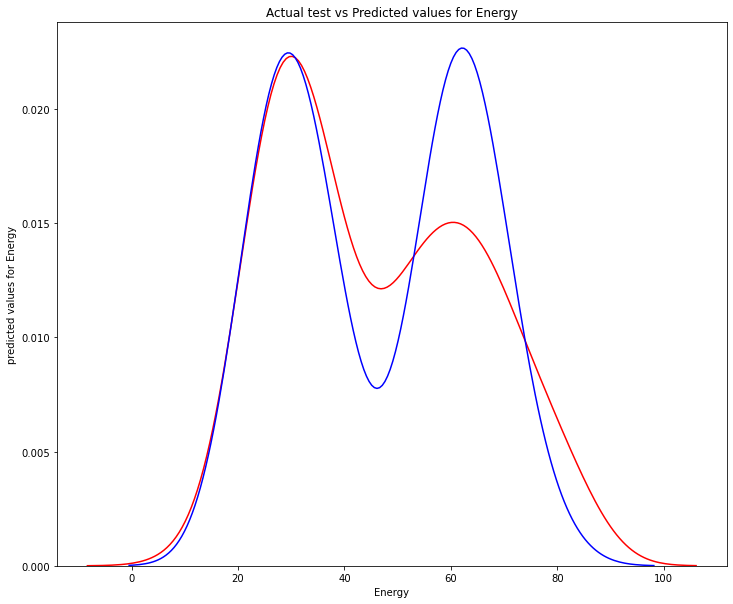

In [195]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(Yreel_test,hist=False, color="r")
sns.distplot(Ye_hatest, hist=False, color="b",ax =ax1)

plt.title('Actual test vs Predicted values for Energy')
plt.xlabel('Energy')
plt.ylabel('predicted values for Energy')

plt.show()
plt.close()

### Interpretation

Cette courbe nous permet d'observer, que notre modèle predits bien les données de tests qui sont dans l'intervalle 0 à 30, mais ne predit pas les bonnes valeurs après 30.Raison pour laquelle la courbe de tests de notre modèle est mieux ajusté à la courbe des valeurs réelles entre 0 et 30, mais après 30, le modèle n'est pas bien ajusté. 

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



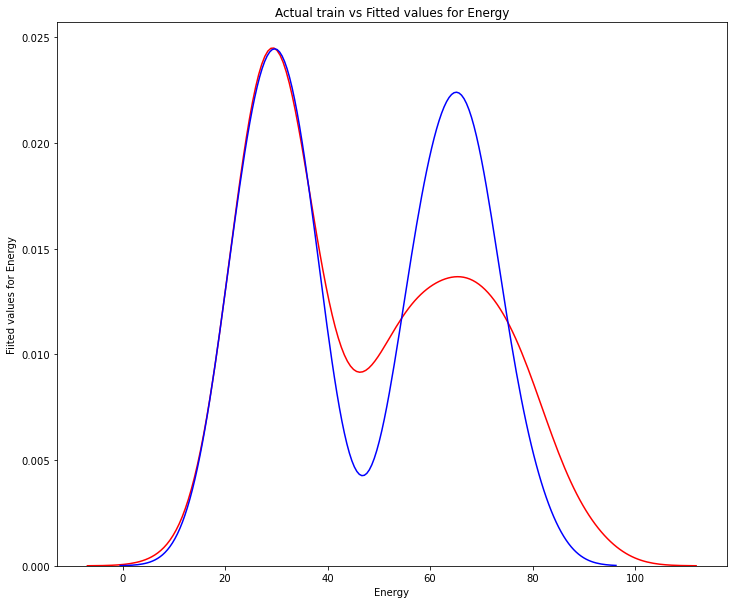

In [196]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(Yreel_train,hist=False, color="r")
sns.distplot(Ye_hat, hist=False, color="b",ax =ax1)

plt.title('Actual train vs Fitted values for Energy')
plt.xlabel('Energy')
plt.ylabel('Fiited values for Energy')

plt.show()
plt.close()

#### Interpretation

Cette courbe nous permet d'observer, que notre modèle predits bien les données d'entrainement qui sont dans l'intervalle 0 à 35, mais ne predit pas les bonnes valeurs après 35.Raison pour laquelle la courbe d'entrainement de notre modèle est mieux ajusté à la courbe des valeurs réelles entre 0 et 35 et pas bien ajusté après 35. 

### Conclusion: 

Dans la suite de nos travaux, Nous n'allons pas supprimer les variables qualitatives precèdentes.

## II.3.2 Regression Linéaire avec pénalisation
### II.3.2.1 Regression linéaire avec une pénalisation de Lasso

In [197]:

regLasso = linear_model.Lasso()
reg=regLasso.fit(Xr_train,Yrel_train)

prev=regLasso.predict(Xr_test)

prev1 = regLasso.predict(Xr_train)

print("MSE test= %f, MSE train=%f" % (mean_squared_error(Yrel_test,prev), mean_squared_error(Yrel_train,prev1)))

MSE test= 46.613564, MSE train=55.228435


In [198]:
print("R_ square test= %f, R_square train = %f" % (r2_score(Yrel_test, prev), r2_score(Yrel_train, prev1)))

R_ square test= 0.864181, R_square train = 0.865498


#### Interpretation 

Nous constatons que, les resultats obtenus avec la penalisation Lasso ne sont pas améliorés par rapport à ceux obtenus plus haut.

In [199]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=4,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yrel_train)
# paramètre optimal!
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.870399, Meilleur paramètre = {'alpha': 0.05}


In [200]:
prev12=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev12,Yrel_test))
print("R2=",r2_score(Yrel_test,prev12))

MSE= 42.59421747901904
R2= 0.8758926808197793


#### Interpretation:

Nous constatons ici, que les resultats ne sont pas améliorés meme en utilisant des hyperparamètres (GridSearch) de la regularisation Lasso, au vu des resultats de la regression simple obtenu plus haut.

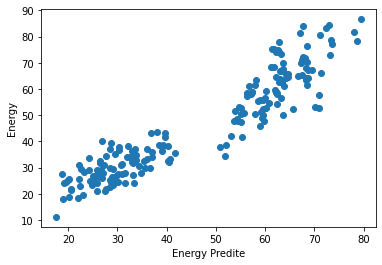

In [201]:
plt.plot(prev12,Yrel_test,"o")
plt.xlabel(u"Energy Predite")
plt.ylabel("Energy")
plt.show()

#### Interpretation

Nous constatons un nuage de points ayant des variances faibles pour les energies predites par notre modèle.Donc notre modèle à une précision comparables à celles de la regression simple plus haut sans prenalisation, donc une bonne précision

### Graphe des Résidus

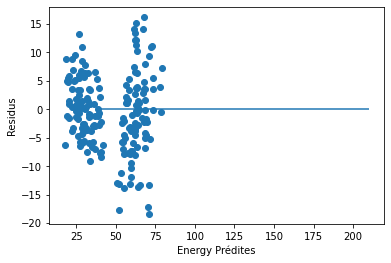

In [202]:
plt.plot(prev12,Yrel_test-prev12,"o")
plt.xlabel(u"Energy Prédites")
plt.ylabel(u"Residus")
plt.hlines(0,40,210)
plt.show()

#### Interpretation

Nous constatons nos residus sont centrés en 0, et symetries à  l'axe passant par 0.Donc, notre modèle à une bonne precision car les variances de nos residus sont faibles.

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



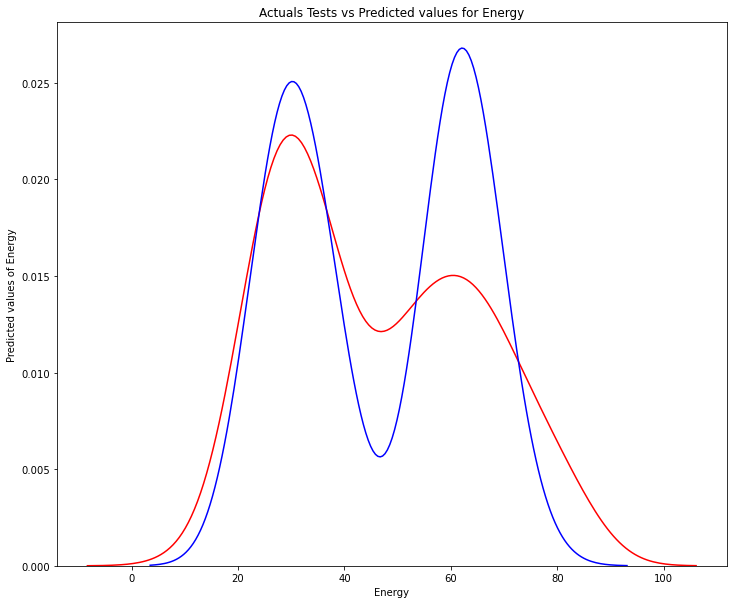

In [203]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(Yrel_test,hist=False, color="r")
sns.distplot(prev, hist=False, color="b",ax =ax1)

plt.title('Actuals Tests vs Predicted values for Energy')
plt.xlabel('Energy')
plt.ylabel('Predicted values of Energy')

plt.show()
plt.close()

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



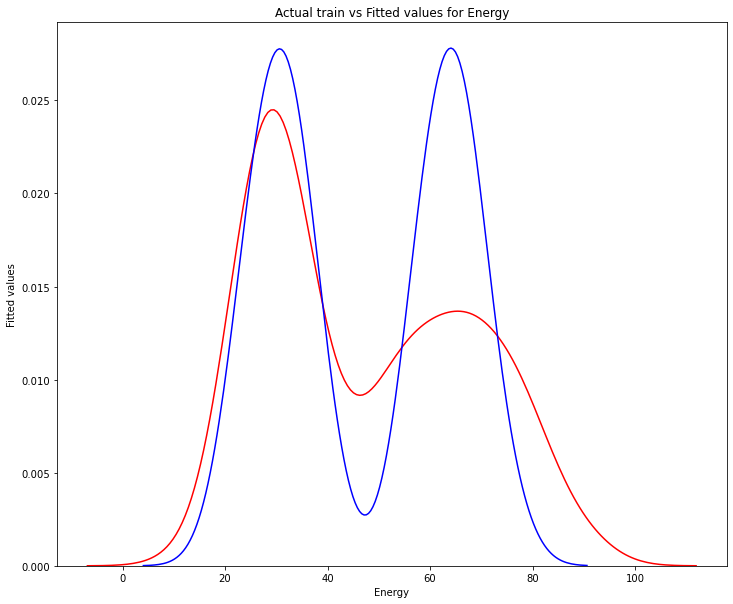

In [204]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(Yrel_train,hist=False, color="r")
sns.distplot(prev1, hist=False, color="b",ax =ax1)

plt.title('Actual train vs Fitted values for Energy')
plt.xlabel('Energy')
plt.ylabel('Fitted values')

plt.show()
plt.close()

#### Interprètation

Ces deux graphes prècedents, nous permet d'affirmer que notre modèle pénalisation avec Lasso, n'ameliore pas les performances comparé au modèle de regression simple sans prenalisation.

L'interprétation nécessite de connaître les valeurs des coefficients du modèle alors que l'objet `regLassOpt` issu de `GridSearchCV` ne retient pas les paramètres estimés. Il faut donc le ré-estimer avec la valeur optimale du paramètre de pénalisation si l'on souhaite afficher ces coefficients.

In [205]:
# Coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yrel_train)
model_lasso.coef_

array([ -4.44432357,   1.72291773,  -3.76166523,   4.80059603,
         0.08066735,  -0.46539981,   0.        ,   0.07340754,
        -0.        , -17.14330013,   0.        ])

In [206]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 8 variables et en supprime 3


Text(0.5, 1.0, 'Coefficients du modèle lasso')

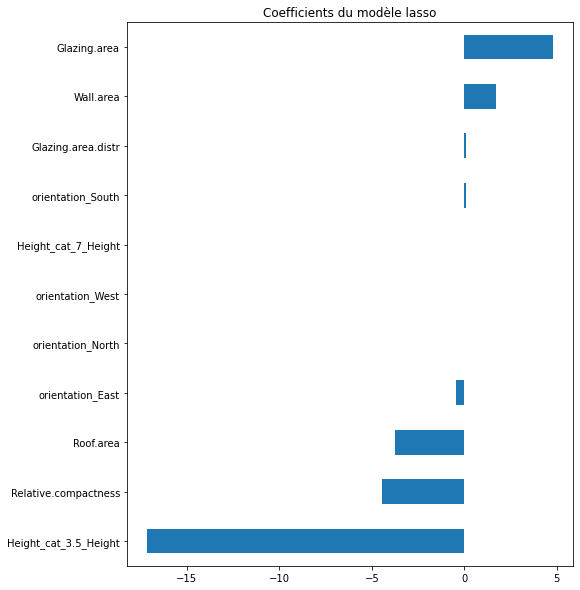

In [207]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

#### Interprètation

Nous observons les trois variables supprimées par Lasso qui sont : Orientation west, orientation North, Height_cat_7 et les 8 variables conservées sont : Height_cat_3.5_Height, Glazing_area, Wall_area, Glazing_area_distr, Orientation_East,Roof.area,et Relative.compactess.

Le graphe suivant permet d'identifier les bonnes et mauvaises prévisions de d'energies des differents seuils quis sont fixés: à 30 pour le type A,35 pour le type B, 45 pour le type C, 45 pour le type D, 55 pour le type E, 65 pour le type F, 75 pour le type G .

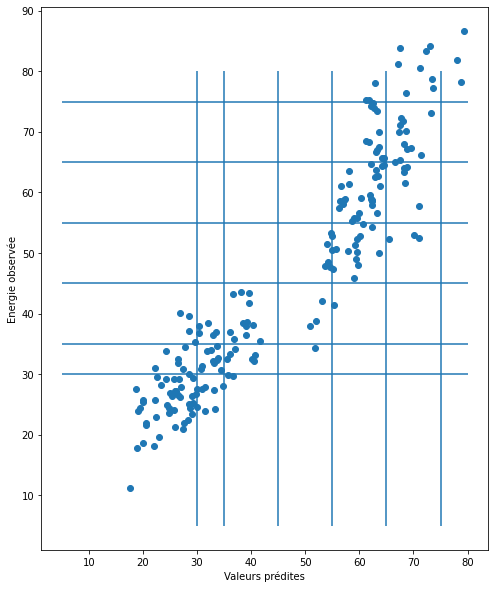

In [208]:
plt.plot(prev12,Yrel_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Energie observée")
plt.hlines(xmin=5, xmax=80,y=[30,35,45,55,65,75])
plt.vlines(x=[30,35,45,55,65,75],ymin=5, ymax=80)
#plt.vlines(x)
plt.show()

#### Interpretation

Ce nuage des points, permet d'avoir des intervalles de nos prédictions d'energies (classes d'energies).
Il est plus explicité ci-dessous, avec la matrice de confusion.

In [209]:
df_energy_PredLasso = pd.DataFrame(prev12,columns=['Prediction'])

In [210]:
df_energy_PredLasso['Prediction_Energy'] = pd.cut(x=df_energy_PredLasso['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


Prevlass01=df_Energy_Pred['Prediction_Energy'].values

In [211]:
df_energy_PredLasso.head(5)

Prediction Prediction_Energy
0   35.641891                 C
1   23.260397                 A
2   67.266826                 F
3   73.236299                 F
4   37.094704                 C

In [212]:
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(Prevlass01,Ycat_test,normalize="columns")
print(table.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.81  0.26  0.16  0.00  0.00  0.00  0.00
B                  0.15  0.43  0.20  0.00  0.00  0.00  0.00
C                  0.04  0.26  0.48  0.00  0.00  0.00  0.00
D                  0.00  0.04  0.12  0.35  0.00  0.00  0.00
E                  0.00  0.00  0.04  0.52  0.81  0.52  0.21
F                  0.00  0.00  0.00  0.13  0.19  0.48  0.57
G                  0.00  0.00  0.00  0.00  0.00  0.00  0.21


Scikit-learn propose d'autres procédures d'optimisation du paramètre de régularisation lasso par validation croisée en régression; lassoCV utilise un algorithme de coordinate descent, sans calcul de dérivée puisque la norme l1 n'est pas dérivable, tandis que lassoLarsCV est basée sur l'algorithme de least angle regression. Ces fonctions permettent de tracer également les chemins de régularisation. Voici l'exemple de lassoCV qui offre plus d'options.

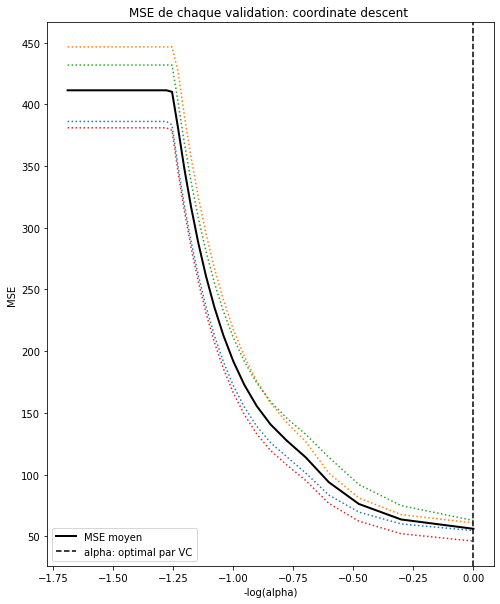

In [213]:
from sklearn.linear_model import LassoCV, LassoLarsCV

model = LassoCV(cv=4, alphas=np.array(range(1,50,1))/1.,n_jobs=-1,random_state=13).fit(Xr_train,Yrel_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

#### Tracés des chemins de régularisation.

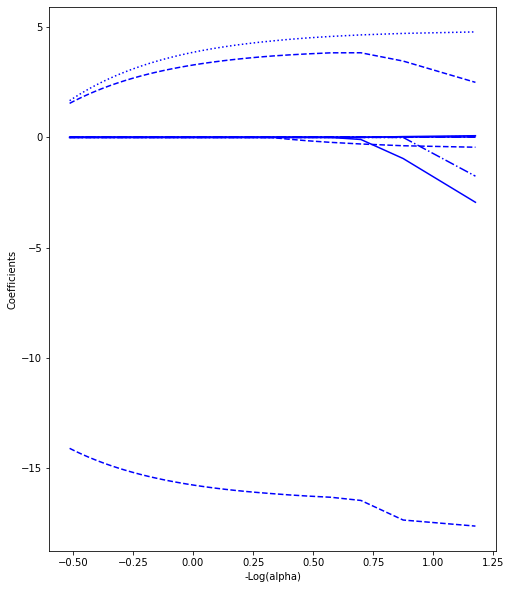

In [214]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(Xr_train,Yrel_train, alphas=np.array(range(1,50,1))/15.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

#### Interpretation

Nous constatons que, ces deux graphes ci-dessus, permettent de confirmer les valeurs obtenuent plus haut, à savoir: celle de alpha=0.05 qui minise MSE.Et pour lesquelles, certaines variables s'annulent.

#### Conclusion :

Nous constatons donc, que les variables qui influencent la prédiction des classes energies sont :Height_cat_3.5_Height, Glazing_area, Wall_area, Glazing_area_distr, Orientation_East,Roof.area,et Relative.compactess.

### II.3.2.2 Regression avec Penalisation Ridge

In [312]:
Xrr_train= lm.fit(Xr_train, Yrel_train)

Xrr_test= lm.fit(Xr_test, Yrel_test)

In [313]:
from sklearn.linear_model import Ridge

##### Entrainement du modèle et prediction sur les données Tests

In [314]:
RidgeModel = Ridge(alpha =0.1)

RidgeModel.fit(Xr_train, Yrel_train)

Ypre_test = RidgeModel.predict(Xr_test)

In [315]:
print("R^2 train = %f, MSE train= %f" % (RidgeModel.score(Xr_train, Yrel_train), 1. -RidgeModel.score(Xr_train, Yrel_train)))

print("R^2 test = %f, MSE test= %f" % (RidgeModel.score(Xr_test, Yrel_test), 1. -RidgeModel.score(Xr_test, Yrel_test)))

R^2 train = 0.875983, MSE train= 0.124017
R^2 test = 0.876373, MSE test= 0.123627


In [316]:
df_energy_PredRidge0 = pd.DataFrame(Ypre_test,columns=['Prediction'])
df_energy_PredRidge0['Prediction_Energy'] = pd.cut(x=df_energy_PredRidge0['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


PrevRidge001=df_energy_PredRidge0['Prediction_Energy'].values
#

In [317]:
#Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(PrevRidge001,Ycat_test)
print(table)

Energy.efficiency   A   B   C   D   E   F  G
row_0                                       
A                  42   6   4   0   0   0  0
B                   8  10   5   0   0   0  0
C                   2   6  12   0   0   0  0
D                   0   1   3   8   0   0  0
E                   0   0   1  12  26  12  3
F                   0   0   0   3   6  11  8
G                   0   0   0   0   0   0  3


#### Interprètation:

Nous constatons que, la pénalisation de Ridge sans optimatisation n'améliore pas resultats, plus précisimment les classifications.

#### Nous Sélectionnons les valeurs de alpha qui minisent l'erreur sur les données tests

In [318]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RidgeModel = Ridge(alpha = alfa)
    RidgeModel.fit(Xr_train, Yrel_train)
    Rsqu_test.append(RidgeModel.score(Xr_test, Yrel_test))
    Rsqu_train.append(RidgeModel.score(Xr_train, Yrel_train))

#### Nous pouvons donc tracer les valeurs de R^2  en fonction des differentes valeurs de alphas 

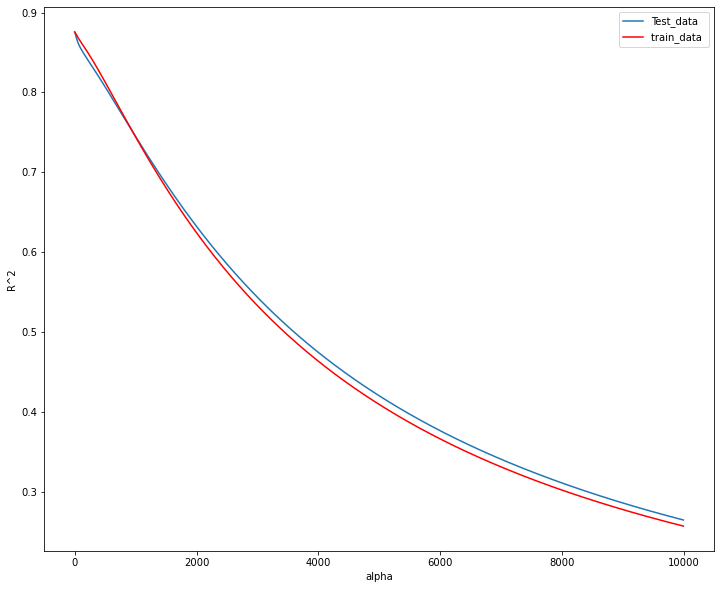

In [319]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA, Rsqu_test, label='Test_data ')
plt.plot(ALFA, Rsqu_train,'r', label='train_data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

#### Interpretation

Sur la figure ci-dessus,la ligne bleue represente les differentes valeurs de R^2 pour les données de tests qui decroit lorsque alpha augmente.La courbe en rouge, represente les valeurs de R^2 pour les données d'entrainement qui decroit également, lorsque alpha diminue

### Ridge Regression avec GridSearch

In [320]:
#Optimize parameter of penalization
param_Gr = [    
    {'alpha':[1e-5,1e-4,1e-3,1e-2,0.1,1,10,100,1000,10000],
    'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],'random_state':[13]
    }
]

RR=Ridge()

Grid_RR=GridSearchCV(RR, param_Gr,cv=5,n_jobs=-1, verbose=1)
                                           
Grid_RR1=Grid_RR.fit(Xr_train, Yrel_train)

#  optimal parameter
print("best score = %f, best parameters = %s" % (Grid_RR1.best_score_,Grid_RR1.best_params_))

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    4.2s


best score = 0.870136, best parameters = {'alpha': 0.1, 'random_state': 13, 'solver': 'sag'}


[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    4.7s finished


In [321]:
#Error on train data

1.-Grid_RR1.best_score_

0.12986416618622276

In [322]:
#Prediction on tests data
y_predrr = Grid_RR1.predict(Xr_test)

#Score on tests data

print("Score test = %f " % (Grid_RR1.score(Xr_test, Yrel_test)))

# error on test sample
print("MSE test = %f" % (1.-Grid_RR1.score(Xr_test, Yrel_test)))


Score test = 0.876328 
MSE test = 0.123672


#### Interpretation

Nous constatons que, la pénalisation de ridge permet d'avoir un modèle aussi précis que celui de la regression linéaire simple sans pénalisation sur les données de tests, mais n'ameliore pas les resultats, donc les performances de manière significative.

In [323]:
df_energy_PredRidge = pd.DataFrame(y_predrr,columns=['Prediction'])
df_energy_PredRidge['Prediction_Energy'] = pd.cut(x=df_energy_PredRidge['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


PrevRidge01=df_energy_PredRidge['Prediction_Energy'].values
#

Le graphe suivant permet d'identifier les bonnes et mauvaises prévisions de d'energies des differents seuils quis sont fixés: à 30 pour le type A,35 pour le type B, 45 pour le type C, 45 pour le type D, 55 pour le type E, 65 pour le type F, 75 pour le type G .

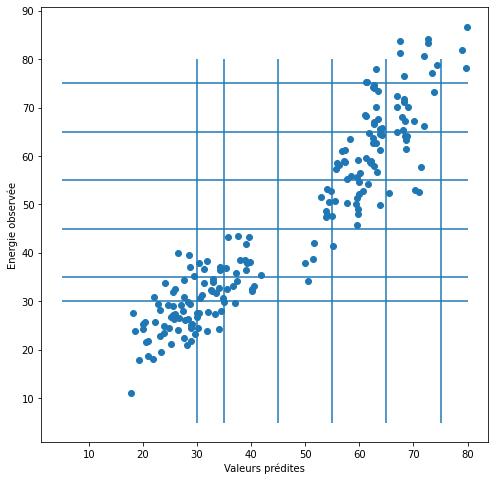

In [324]:
plt.plot(y_predrr,Yrel_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Energie observée")
plt.hlines(xmin=5, xmax=80,y=[30,35,45,55,65,75])
plt.vlines(x=[30,35,45,55,65,75],ymin=5, ymax=80)
#plt.vlines(x)
plt.show()

#### Interpretation

Ce nuage des points, permet d'avoir des intervalles de nos prédictions d'energies (classes d'energies).
Il est plus explicité ci-dessous, avec la matrice de confusion.

In [325]:
#Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(PrevRidge01,Ycat_test, normalize="columns")
print(table.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.81  0.26  0.16  0.00  0.00  0.00  0.00
B                  0.15  0.43  0.20  0.00  0.00  0.00  0.00
C                  0.04  0.26  0.48  0.00  0.00  0.00  0.00
D                  0.00  0.04  0.12  0.35  0.00  0.00  0.00
E                  0.00  0.00  0.04  0.52  0.81  0.52  0.21
F                  0.00  0.00  0.00  0.13  0.19  0.48  0.57
G                  0.00  0.00  0.00  0.00  0.00  0.00  0.21


#### Interprètation

Nous constatons, d'après la matrice de confusion que la regression linéaire avec pénalisation Ridge optimisation, à un taux de faux positif moins que le modèle de regression linéaire avec pénalisation Ridge.

### Graphe des Résidus

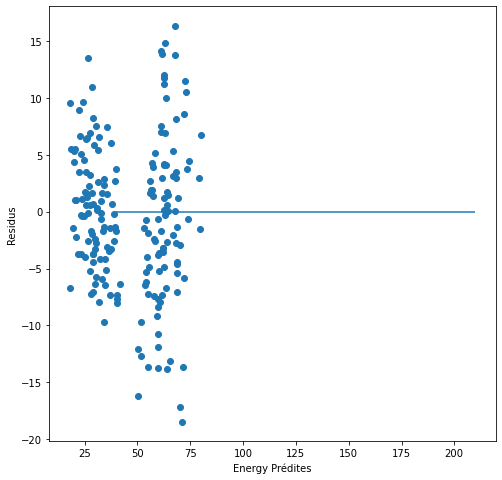

In [326]:
plt.plot(y_predrr,Yrel_test-y_predrr,"o")
plt.xlabel(u"Energy Prédites")
plt.ylabel(u"Residus")
plt.hlines(0,40,210)
plt.show()

#### Interpretation

Nous constatons que, nos résidus sont centrés autour de la moyenne 0, et ont une distribution unifome.Donc, ce modèle fournit des prédictions qui sont semblabes à celle de la régression linéaire sans pénalisation.

In [327]:
# Coefficients de Ridge
RR3=Ridge(alpha=Grid_RR1.best_params_['alpha'], solver=Grid_RR1.best_params_['solver'])
GrGrid_RR5=RR3.fit(Xr_train,Yrel_train)
GrGrid_RR5.coef_

#print(hh)

array([-8.10590587, -0.15433035, -8.58979689,  4.8551846 ,  0.08855303,
       -0.415701  ,  0.12566105,  0.21743818,  0.07213059, -8.03539478,
        8.03539478])

In [328]:
coef = pd.Series(GrGrid_RR5.coef_, index = X_train.columns)
print("Ridge conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Ridge conserve 11 variables et en supprime 0


Text(0.5, 1.0, 'Coefficients du modèle Ridge')

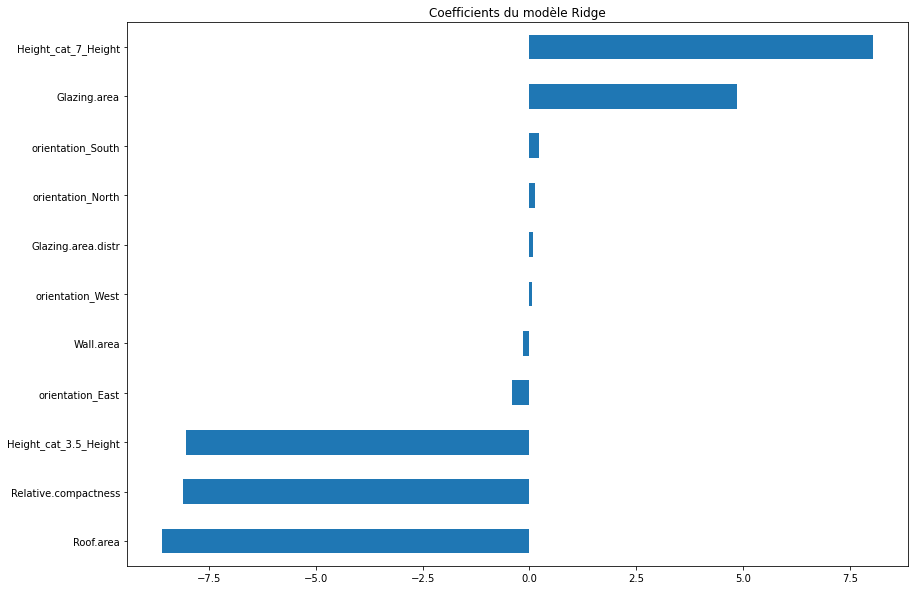

In [329]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (14, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle Ridge")

#### Interpretation
Nous obtenons ci-dessus les coefficients de ridge. Et observons que, aucun de ces coefficients n'est nul.Ce qui nous permet de confirmer les propriètes de la pénalisation Ridge, à savoir celle de pénaliser les coefficients  des variables ayant des grandes valeurs, sans en supprimer aucun des coefficients.

### II.3.3 Optimal decision tree

In [330]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Optimize the depth of tree
epochs=5
param=[{"max_depth":list(range(2,4)),
        'splitter':['best'],
        "criterion": ['mse','friedman_mse''mae'],"max_leaf_nodes":list(range(2,3)),"min_samples_split":list(range(270,283)),"min_samples_leaf":list(range(101,120)),
        "max_features": ['sqrt','auto'],"ccp_alpha":list(range(0,1)),"min_impurity_split":[30], "random_state":[13]
       }]

tree= GridSearchCV(DecisionTreeRegressor(),param,cv=4,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Yrel_train)

# paramètre optimal
print("best score = %f, best parameter = %s" % (treeOpt.best_score_,treeOpt.best_params_))

best score = 0.776501, best parameter = {'ccp_alpha': 0, 'criterion': 'mse', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_split': 30, 'min_samples_leaf': 101, 'min_samples_split': 270, 'random_state': 13, 'splitter': 'best'}


C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.



In [331]:
# Error on train data

print("Error = %f" % (1-treeOpt.best_score_))

Error = 0.223499


In [332]:
# Previction de l'echantillon test
y_chap = treeOpt.predict(Xr_test)

# Score and error on test sample

print("Score = %f, Error =%f" % (treeOpt.score(Xr_test, Yrel_test), 1.-treeOpt.score(Xr_test, Yrel_test)))

Score = 0.739835, Error =0.260165


#### Interpretation

Nous observons que les arbres de décision n'ameliore pas les resultats tant sur les données d'apprentissages que sur les données, ceci autant sur le plan des performances que de la précision.Donc ce modèle n'est pas adapté.

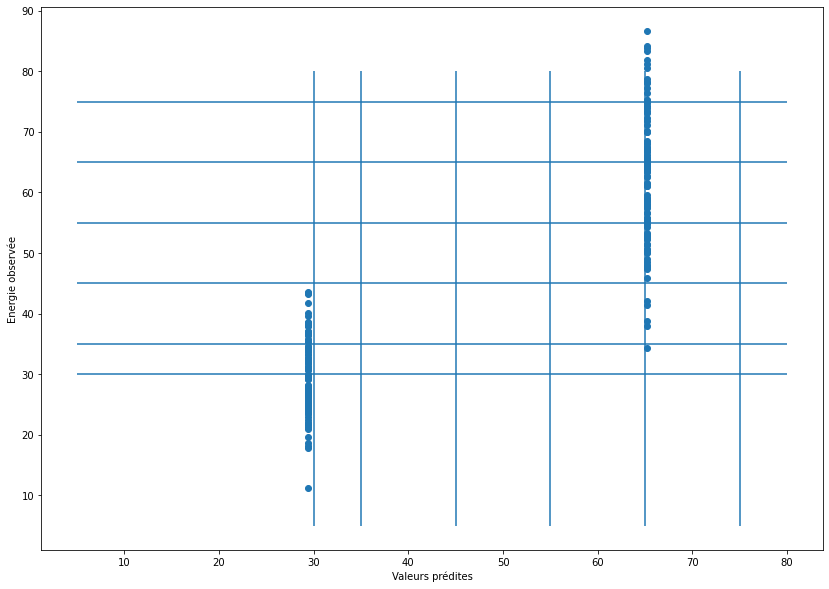

In [333]:
plt.plot(y_chap,Yrel_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Energie observée")
plt.hlines(xmin=5, xmax=80,y=[30,35,45,55,65,75])
plt.vlines(x=[30,35,45,55,65,75],ymin=5, ymax=80)
#plt.vlines(x)
plt.show()

In [334]:
df_energy_ODT = pd.DataFrame(y_chap,columns=['Prediction'])
df_energy_ODT['Prediction_Energy'] = pd.cut(x=df_energy_ODT['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


PrevODT=df_energy_ODT['Prediction_Energy'].values
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(PrevODT,Ycat_test)
print(table.round(2))

Energy.efficiency   A   B   C   D   E   F   G
row_0                                        
A                  52  22  21   0   0   0   0
F                   0   1   4  23  32  23  14


In [335]:
print(y_chap[0:20])

[29.40116255 29.40116255 65.1638804  65.1638804  29.40116255 29.40116255
 29.40116255 29.40116255 65.1638804  65.1638804  65.1638804  65.1638804
 29.40116255 65.1638804  65.1638804  65.1638804  65.1638804  29.40116255
 29.40116255 29.40116255]


In [336]:
{'ccp_alpha': 0, 'criterion': 'mse', 
 'max_depth': 2, 
 'max_features': 'auto', 'max_leaf_nodes': 2, 'min_impurity_split': 30, 'min_samples_leaf': 101, 'min_samples_split': 270, 'random_state': 13,
 'splitter': 'best'}

{'ccp_alpha': 0,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 2,
 'min_impurity_split': 30,
 'min_samples_leaf': 101,
 'min_samples_split': 270,
 'random_state': 13,
 'splitter': 'best'}

In [337]:
#Decsion Tree with optimal parameters
treeOptCR = DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'],
                                   ccp_alpha=treeOpt.best_params_['ccp_alpha'],
                                   max_features=treeOpt.best_params_['max_features'],
                                   max_leaf_nodes=treeOpt.best_params_['max_leaf_nodes'],
                                    min_impurity_split=treeOpt.best_params_['min_impurity_split'],
                                   min_samples_leaf=treeOpt.best_params_['min_samples_leaf'],
                                   min_samples_split=treeOpt.best_params_['min_samples_split'],
                                   random_state=treeOpt.best_params_['random_state'],
                                    criterion=treeOpt.best_params_['criterion'])
treeR = treeOptCR.fit(Xr_train, Yrel_train)

C:\Users\ghomsik\anaconda3\envs\aa-projet\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning:

The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.



In [338]:
#features importances
treeOptCR.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [339]:
importances = treeOptCR.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(df_ener.columns[indices[f]], importances[indices[f]])

Height_cat_3.5_Height 1.0
Height_cat_7_Height 0.0
orientation_West 0.0
orientation_South 0.0
orientation_North 0.0
orientation_East 0.0
Glazing.area.distr 0.0
Glazing.area 0.0
Roof.area 0.0
Wall.area 0.0
Relative.compactness 0.0


Text(0.5, 1.0, 'Decision Tree features importance')

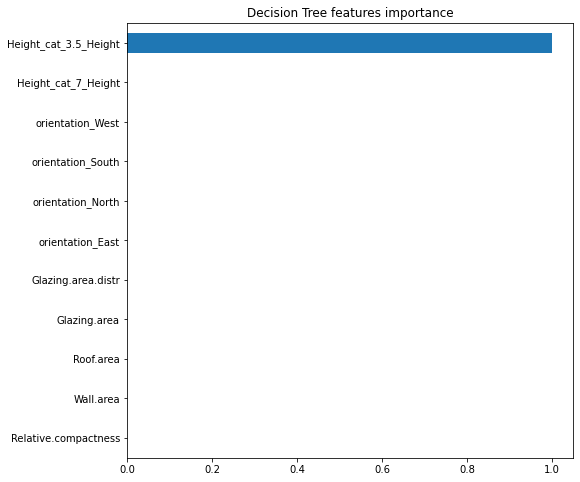

In [340]:
#plot features importance
featImport = pd.Series(importances, index = X_train.columns)
imp_featImport = featImport.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_featImport.plot(kind = "barh")
plt.title(u"Decision Tree features importance")

#### Interprètation:
** L'arbre de decision n'améliore pas la classification. Comparé à la regression linéaire, on a ici un une augmentaion du taux des mals classés des classes B,C,D, E et G. Il n y a plus que les classes A, F qui ont des taux de bien classés égale à 1.

### Graphe des Réisdus

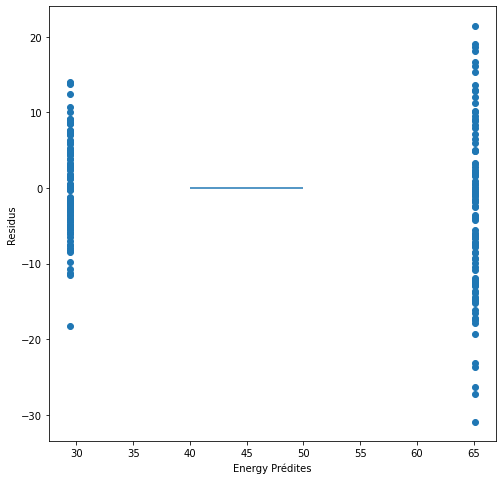

In [341]:
plt.plot(y_chap,Yrel_test-y_chap,"o")
plt.xlabel(u"Energy Prédites")
plt.ylabel(u"Residus")
plt.hlines(0,40,50)
plt.show()

#### Interpretation

Nous observons que nos résidus sont repartis suivant deux classes de valeurs, ce qui confirme les resultats obtenus plus haut,et à une variance faible mais erreurs élevé.Donc modèle pas adapté. 

In [342]:
# export graph of tree
export_graphviz(treeR,
                     out_file="tree.dot",
                     feature_names =X_train.columns.values.tolist() , 
                     class_names=classes,
                     filled = True)

In [343]:
#features importances
treeR.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [344]:
from IPython.display import Image
#Image(filename='treeOpt.png')

 ### 3.3.4 RANDOM FOREST

In [345]:
from sklearn.ensemble import RandomForestRegressor

In [346]:
# définition des paramètres
forest = RandomForestRegressor(max_depth=4, random_state=0,bootstrap=True, oob_score=True, 
                                   
                                   verbose=1,ccp_alpha=2,max_leaf_nodes=4,max_features='auto',
                                  
                                   min_samples_split=80, min_samples_leaf=10,
                                   
                                   criterion='mse')
""""(n_estimators=500, 
   criterion='mse', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True)"""
# apprentissage
rgrFit = forest.fit(Xr_train,Yrel_train)
#print(rgrFit.oob_score_)

print("best score = %f" % (rgrFit.oob_score_))

print("Error = %f" % (1.-rgrFit.oob_score_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


best score = 0.882461
Error = 0.117539


In [347]:
Pred_RF = rgrFit.predict(Xr_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


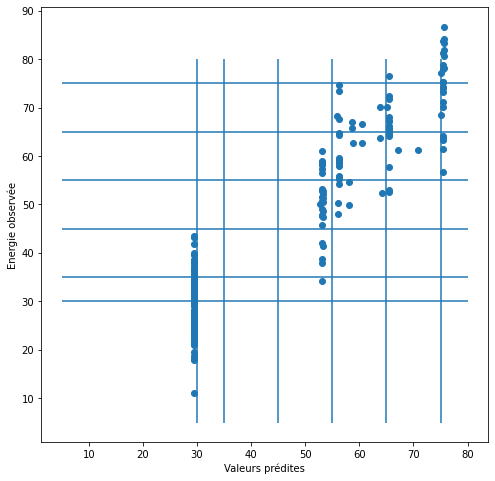

In [348]:
plt.plot(Pred_RF,Yrel_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Energie observée")
plt.hlines(xmin=5, xmax=80,y=[30,35,45,55,65,75])
plt.vlines(x=[30,35,45,55,65,75],ymin=5, ymax=80)
#plt.vlines(x)
plt.show()

In [349]:
df_energy_RF = pd.DataFrame(Pred_RF,columns=['Prediction'])
df_energy_RF['Prediction_Energy'] = pd.cut(x=df_energy_RF['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


PrevRF=df_energy_RF['Prediction_Energy'].values
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(PrevRF,Ycat_test, normalize="columns")
print(table.round(2))

Energy.efficiency    A     B     C     D     E     F     G
row_0                                                     
A                  1.0  0.96  0.84  0.00  0.00  0.00  0.00
D                  0.0  0.04  0.16  0.65  0.22  0.00  0.00
E                  0.0  0.00  0.00  0.26  0.44  0.35  0.00
F                  0.0  0.00  0.00  0.09  0.19  0.39  0.07
G                  0.0  0.00  0.00  0.00  0.16  0.26  0.93


In [350]:
# Score de prevision sur le test

rgrFit.score(Xr_test,Yrel_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8608307478128002

In [351]:
#erreur de prévision sur le test

1-rgrFit.score(Xr_test, Yrel_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.13916925218719978

In [352]:
rgrFit.feature_importances_

array([0.00762043, 0.07894   , 0.47669072, 0.0310249 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18520692,
       0.22051703])

In [353]:
print(rgrFit.n_features_)

11


#### Interprètation

Le RandomForest sans optimisation, ameliore faiblement les resultats (biais et variance) obtenus avec les modèles précèdents, tant sur les données d'entrainement que sur les données tests.Nous constatons qu'il ne prédit que5 classes:A,D,E,F et G.Donc n'améliore pas la classification energique de certaines classes (B et C) comparé à la régression linéaire.

Aussi,nous constatons que les variables importantes dans notre modèle sont: Relative compactness, Wall area, Roof area, glazing area, height_cat_3.5_height,height_cat_7_height 

### Random Forest avec GridSearchCV

In [355]:
param=[{ "max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100,random_state=13),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Yrel_train)
# paramètre optimal
print("Meilleur score = %f, Erreur sur l'entrainement =%f, Meilleur paramètre = %s" % (rfOpt.best_score_,1. -rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.945080, Erreur sur l'entrainement =0.054920, Meilleur paramètre = {'max_features': 6}


In [356]:
#Prevision sur les données tests

Ypre_RF= rfOpt.predict(Xr_test)

# Score de prévision sur le test

rfOpt.score(Xr_test,Yrel_test)

0.9405234005569907

In [357]:
# erreur de prévision sur le test

1.-rfOpt.score(Xr_test,Yrel_test)

0.059476599443009315

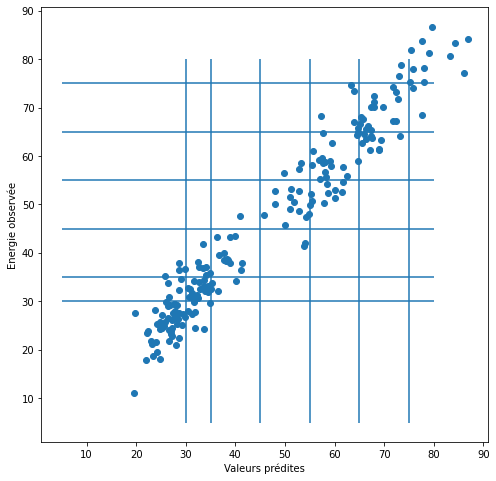

In [358]:
plt.plot(Ypre_RF,Yrel_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Energie observée")
plt.hlines(xmin=5, xmax=80,y=[30,35,45,55,65,75])
plt.vlines(x=[30,35,45,55,65,75],ymin=5, ymax=80)
#plt.vlines(x)
plt.show()

In [359]:
df_energy_RFo = pd.DataFrame(Ypre_RF,columns=['Prediction'])
df_energy_RFo['Prediction_Energy'] = pd.cut(x=df_energy_RFo['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


PrevRFo=df_energy_RFo['Prediction_Energy'].values
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(PrevRFo,Ycat_test, normalize="columns")
print(table.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.87  0.17  0.16  0.00  0.00  0.00  0.00
B                  0.13  0.65  0.28  0.00  0.00  0.00  0.00
C                  0.00  0.17  0.48  0.04  0.00  0.00  0.00
D                  0.00  0.00  0.08  0.52  0.09  0.00  0.00
E                  0.00  0.00  0.00  0.43  0.59  0.22  0.00
F                  0.00  0.00  0.00  0.00  0.31  0.70  0.14
G                  0.00  0.00  0.00  0.00  0.00  0.09  0.86


**Interpretation** 
Avec optimaisation des paramètres du modèle Random Forest, nous constatons une nette amélioraton de la classification energetique (classes B et C).

Comparé au *Decison tree*, le *Random Forest* dimunie le taux des mals classés des classes B,C, D,E, et F. Il fait également croître le taux de mals classés des classes A et F.

Ce modèle explique 94% de la variation de nos classes d'energies.

In [360]:
#Random Forest with optimal parameters
RFR = RandomForestRegressor(max_features=rfOpt.best_params_['max_features'],
                                    random_state = 0
                                    )
RFR1 = RFR.fit(Xr_train, Yrel_train)

Ypre_RF1= rfOpt.predict(Xr_test)

### Courbes des Residus

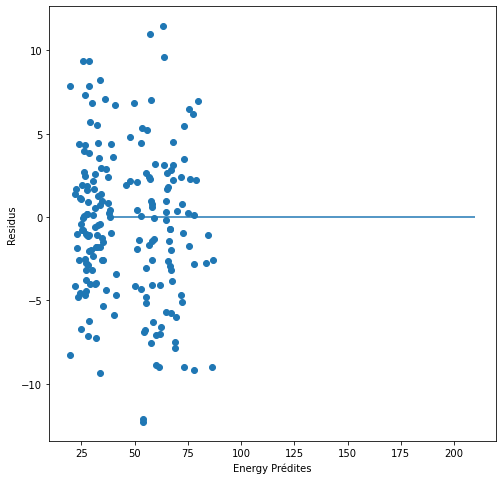

In [361]:
plt.plot(Ypre_RF1,Yrel_test-Ypre_RF1,"o")
plt.xlabel(u"Energy Prédites")
plt.ylabel(u"Residus")
plt.hlines(0,40,210)
plt.show()

#### Interprètation

Nous constatons que nos résidus, sont symétriques et centrés autour de 0, ce qui permet de constater que nos prédictions ont une erreur faibles par rapport aux variances presentent dans les données.Donc explique 94% de la variation des classes  d'energies de nos immeubles.

In [362]:
#features importances
RFR1.feature_importances_

array([0.07499972, 0.05941579, 0.35107265, 0.06475965, 0.01501382,
       0.00132542, 0.00136615, 0.00110297, 0.00114462, 0.19586866,
       0.23393055])

In [363]:
importances1 = RFR1.feature_importances_
indices = np.argsort(importances1)[::-1]
for f in range(Xr_train.shape[1]):
    print(df_ener.columns[indices[f]], importances1[indices[f]])

Roof.area 0.35107264837679364
Height_cat_7_Height 0.23393055265255072
Height_cat_3.5_Height 0.19586865582104845
Relative.compactness 0.07499971790652961
Glazing.area 0.06475965369962873
Wall.area 0.05941579146236701
Glazing.area.distr 0.015013815331535797
orientation_North 0.001366146652542931
orientation_East 0.0013254202457360547
orientation_West 0.0011446229164173258
orientation_South 0.001102974934849799


Text(0.5, 1.0, 'Ada Boosting features importance')

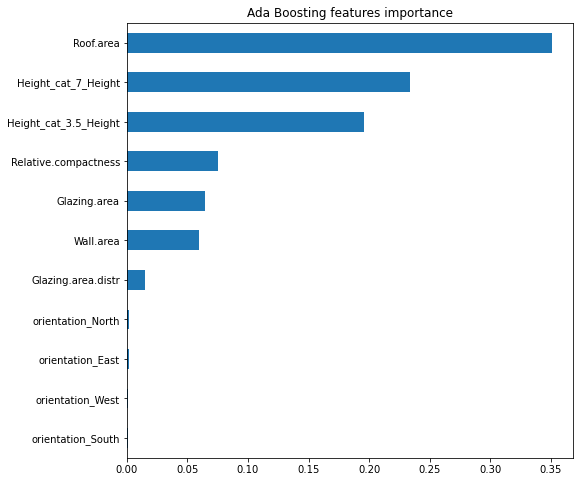

In [364]:
#plot features importance
featImport = pd.Series(RFR1 .feature_importances_, index = X_train.columns)
imp_featImport = featImport.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_featImport.plot(kind = "barh")
plt.title(u"Random Forest features importance")

#### Interprètation

Apès optimisation du modèle RandomForest, nous obtenon des resultats qui sont meilleurs que ceux obtenus avec les modèles precèdents (biais et variance) tant sur les données d'entrainement que sur les données tests.Car ce modèle generalise bien sur les données tests (score test très proche de celui du score train et erreur faible)

Aussi,nous constatons que les variables importantes dans notre modèle sont: Relative compactness, Wall area, Roof area, glazing area,glazing area distr height_cat_3.5_height,height_cat_7_height.Donc, elles influencent grandément notre classification, comparées à celle des orientations. 

### II.3.3.5 BOOSTING

#### 3.3.5.1 AdaBoostRegressor

In [365]:
from sklearn.ensemble import AdaBoostRegressor
# définition des paramètres
AdaBr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha= 0, max_depth= 2, max_leaf_nodes= 2),
                           n_estimators =10 ,learning_rate=1e-3,
                          loss="linear",random_state=13)

# apprentissage
AdaBrFit = AdaBr.fit(Xr_train,Yrel_train)
#print(AdaBr.score(Xr_train,Yrel_train))

print("best score = %f, Erreur sur les données d'entrainement=%f" % (AdaBr.score(Xr_train,Yrel_train),1.-AdaBr.score(Xr_train,Yrel_train) ))

best score = 0.778646, Erreur sur les données d'entrainement=0.221354


In [366]:
#Prevision sur les données Tests
Ypre_Ada= AdaBr.predict(Xr_test)

# Score de prévision sur le test
AdaBr.score(Xr_test,Yrel_test)

0.741274605039201

In [367]:
# erreur de prévision sur le test
1.-AdaBr.score(Xr_test,Yrel_test)

0.25872539496079905

#### Interpretation

Nous constatons que ce modèle produit des resultats(Performance et précision faibles tant sur les données d'apprentissages que les données tests. 

In [368]:
AdaBr.feature_importances_

array([0.        , 0.        , 0.69990231, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.09886021,
       0.20123748])

#### Interpretation

Nous constatons que les paramètres importants pour ce modèle sont : Roof area, height_cat_3.5_height,height_cat_7_height 

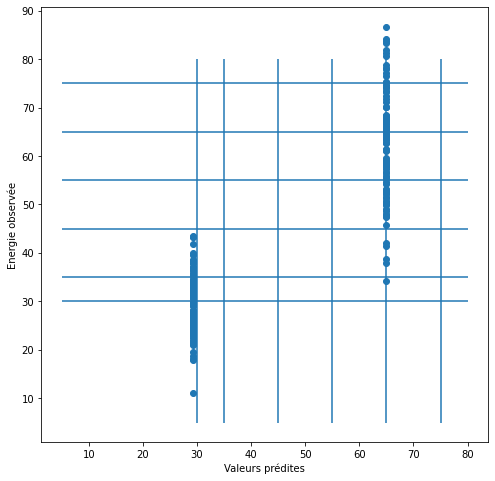

In [370]:
plt.plot(Ypre_Ada,Yrel_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Energie observée")
plt.hlines(xmin=5, xmax=80,y=[30,35,45,55,65,75])
plt.vlines(x=[30,35,45,55,65,75],ymin=5, ymax=80)
#plt.vlines(x)
plt.show()

In [371]:
df_energy_AB = pd.DataFrame(Ypre_Ada,columns=['Prediction'])
df_energy_AB['Prediction_Energy'] = pd.cut(x=df_energy_AB['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


PrevAB=df_energy_AB['Prediction_Energy'].values
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(PrevAB,Ycat_test, normalize="columns")
print(table.round(2))

Energy.efficiency    A     B     C    D    E    F    G
row_0                                                 
A                  1.0  0.96  0.84  0.0  0.0  0.0  0.0
E                  0.0  0.04  0.16  1.0  1.0  1.0  1.0


#### Interpretation

  Nous constatons que notre modèle ne predit que deux (02) classes : A et E. Ce qui entraine une augmentation du taux des mals classés des classes B, C,D,F et G.
  
  Donc n'améliore pas les résultats des bien classés 

### AdaBoost Optimisé avec GridSearchCV

In [372]:
param=[{"n_estimators": [50, 150],"learning_rate": [0.01,0.05,0.1,0.3,1],
 "loss" : ["linear", "square", "exponential"]}]
AdaBrG= GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(ccp_alpha=0, criterion="mse", max_depth= 2, 
                                                             max_features ="sqrt", max_leaf_nodes= 2, random_state=13,
                                                             min_samples_leaf=109, min_samples_split=275, splitter = "best")),
                     param,cv=5,n_jobs=-1, verbose=1)
AdaBrGr=AdaBrG.fit(Xr_train, Yrel_train)
# paramètre optimal
print("Meilleur score = %f, Erreur sur l'entrainement =%f, Meilleur paramètre = %s" % (AdaBrGr.best_score_,1. -AdaBrGr.best_score_,AdaBrGr.best_params_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 143 out of 150 | elapsed:   11.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   13.2s finished


Meilleur score = 0.795889, Erreur sur l'entrainement =0.204111, Meilleur paramètre = {'learning_rate': 0.3, 'loss': 'exponential', 'n_estimators': 150}


In [373]:
#Prediction du modèle sur les données tests

Ypre_AdaBrGr=AdaBrGr.predict(Xr_test)

#Score de prevision test

AdaBrGr.score(Xr_test, Yrel_test)

0.7585620473002963

In [374]:
#Erreur de prevision test
1.-AdaBrGr.score(Xr_test, Yrel_test)

0.2414379526997037

#### Interpretation

  Nous constatons qu'après optimisation des paramètres d'AdaBoost à l'aide du GridSearch, nous obtenons un modèle ayant des performances et précision par aussi meilleurs que les modèles précèdents (biais et variance) tant sur les données d'entrainement que sur les données tests.

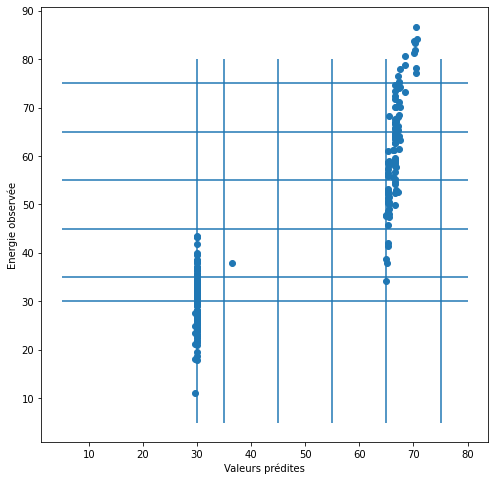

In [375]:
plt.plot(Ypre_AdaBrGr,Yrel_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Energie observée")
plt.hlines(xmin=5, xmax=80,y=[30,35,45,55,65,75])
plt.vlines(x=[30,35,45,55,65,75],ymin=5, ymax=80)
#plt.vlines(x)
plt.show()

In [376]:
df_energy_AdaBr = pd.DataFrame(Ypre_AdaBrGr,columns=['Prediction'])
df_energy_AdaBr['Prediction_Energy'] = pd.cut(x=df_energy_AdaBr['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


PrevAdaBr=df_energy_AdaBr['Prediction_Energy'].values
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(PrevAdaBr,Ycat_test, normalize="columns")
print(table.round(2))

Energy.efficiency     A     B     C     D    E    F    G
row_0                                                   
A                  0.12  0.00  0.00  0.00  0.0  0.0  0.0
B                  0.88  0.96  0.80  0.00  0.0  0.0  0.0
C                  0.00  0.00  0.04  0.00  0.0  0.0  0.0
E                  0.00  0.04  0.04  0.09  0.0  0.0  0.0
F                  0.00  0.00  0.12  0.91  1.0  1.0  1.0


#### Interpètation 

AdaBoostRegressor dimunie le taux des mals classés des classes C et F. Il ne prédit que les classes B,C,E et F.Mais diminue le taux des biens classés de la classe B et des autres classes A,D,et G

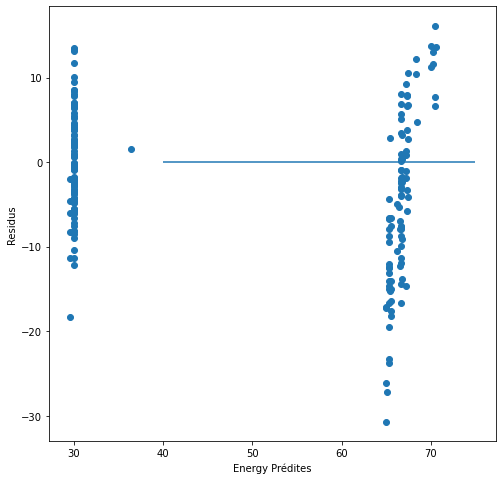

In [377]:
plt.plot(Ypre_AdaBrGr,Yrel_test-Ypre_AdaBrGr,"o")
plt.xlabel(u"Energy Prédites")
plt.ylabel(u"Residus")
plt.hlines(0,40,75)
plt.show()

#### Interprètation

Nous constatons que nos résidus, sont symétriques et centrés autour de 0, ce qui permet de constater que notre modèle explique 74% de la variation des classes  d'energies de nos immeubles.Donc n'exprime pas bien la variation presente dans les données données, et avec une relativement faible.

In [378]:
#Ada Boosting with optimal parameters
AdaBoostR = AdaBoostRegressor(learning_rate=AdaBrG.best_params_['learning_rate'],
                                    loss= AdaBrG.best_params_['loss'],
                                    n_estimators = AdaBrG.best_params_['n_estimators'],
                                    random_state = 13
                                    )
AdaBoostOp = AdaBoostR.fit(Xr_train, Yrel_train)

In [379]:
importances = AdaBoostOp.feature_importances_

importances

array([1.27082693e-01, 1.39008825e-01, 3.63279790e-01, 2.13954019e-01,
       1.51736538e-02, 2.35805514e-03, 3.52126903e-05, 2.26636383e-04,
       1.78852320e-05, 5.54001193e-02, 8.34631107e-02])

In [380]:
importances = AdaBoostOp.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(df_ener.columns[indices[f]], importances[indices[f]])

Roof.area 0.36327979030615004
Glazing.area 0.21395401852281426
Wall.area 0.13900882475789864
Relative.compactness 0.12708269306900177
Height_cat_7_Height 0.08346311073947683
Height_cat_3.5_Height 0.055400119334064704
Glazing.area.distr 0.015173653822157516
orientation_East 0.0023580551436376707
orientation_South 0.0002266363825382675
orientation_North 3.5212690263456956e-05
orientation_West 1.7885231996577764e-05


Text(0.5, 1.0, 'Ada Boosting features importance')

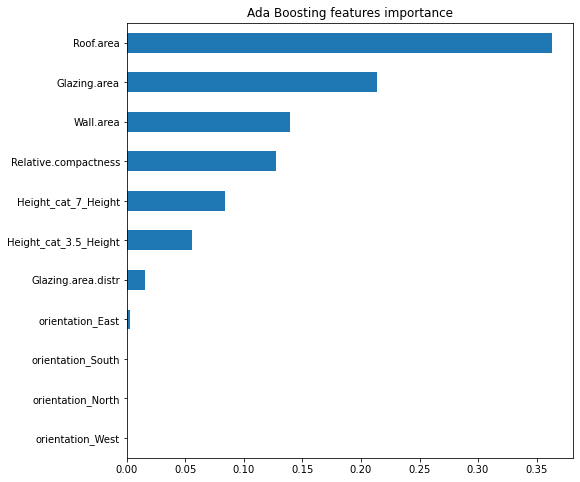

In [381]:
#plot features importance
featImport = pd.Series(AdaBoostOp .feature_importances_, index = X_train.columns)
imp_featImport = featImport.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_featImport.plot(kind = "barh")
plt.title(u"Ada Boosting features importance")

#### Interprètation
Nous constatons que les variables importantes dans notre modèle sont: Relative compactness, Wall area, Roof area, glazing area,glazing area distr height_cat_3.5_height,height_cat_7_height.Donc, elles influencent grandément notre classification, comparées à celle des orientations. 

#### 3.3.5.2 GradientBoostingRegressor

In [382]:
from sklearn.ensemble import GradientBoostingRegressor

GBr = GradientBoostingRegressor(loss= "ls", learning_rate =0.01, n_estimators =100, subsample=1, 
                               
                                max_depth=4, random_state=13, verbose=1,ccp_alpha=2,
                                
                                max_leaf_nodes=4,max_features='auto',
                                  
                                   min_samples_split=80, min_samples_leaf=10,
                                   
                                   criterion="mse")

RGBr = GBr.fit(Xr_train, Yrel_train)

#print(RGBr.score(Xr_train, Yrel_train))

print("Best score est = %f, l'erreur sur les apprentissages= %f" % (RGBr.score(Xr_train, Yrel_train), 1.-RGBr.score(Xr_train, Yrel_train)))

      Iter       Train Loss   Remaining Time 
         1         403.3938            0.20s
         2         396.3185            0.20s
         3         389.3839            0.19s
         4         382.5874            0.19s
         5         375.9261            0.17s
         6         369.3973            0.17s
         7         362.9976            0.17s
         8         356.7245            0.17s
         9         350.5753            0.16s
        10         344.5474            0.16s
        20         290.4480            0.11s
        30         246.1341            0.09s
        40         209.8330            0.07s
        50         180.0784            0.06s
        60         155.6533            0.05s
        70         135.5402            0.04s
        80         118.8775            0.02s
        90         104.9185            0.01s
       100          93.3052            0.00s
Best score est = 0.772766, l'erreur sur les apprentissages= 0.227234


In [383]:
Y_predd=RGBr.predict(Xr_test)


In [384]:
#Score de prevision test

RGBr.score(Xr_test, Yrel_test)

0.7630446907144013

In [385]:
#Erreur de prevision test
1.-RGBr.score(Xr_test, Yrel_test)

0.23695530928559871

#### Interpretation

Ce modèle fournit des performances assez bonnes sur les données d'apprentissage mais ne généralise pas sur les données tests.De plus, il est moins performant et moins précis que les autres modèles plus haut.Nécessite peut d'etre optimiser les paramètres, mais il consomme assez de ressources.

## 3.4 Support Vector Machine

In [386]:
from sklearn.svm import SVR


param =[{"kernel": ("linear", "poly", "rbf", "sigmoid"),"C":[0.4,0.5,0.8,1,2,5],"degree": [3,8], "gamma":[1**-8,1**-5,1**-3,1**-2,0.1,0.4,0.5],"tol":[0.001],"epsilon":[0.1,0.2,0.3,,0.5,0.8]}]


SVRE = SVR()

GSCvSVr = GridSearchCV((SVRE), param, cv=5 ,n_jobs=-1, verbose=1)

SvR = GSCvSVr.fit(Xr_train, Yrel_train)

print("Meilleur score = %f, Erreur sur l'entrainement =%f, Meilleur paramètre = %s" % (SvR.best_score_,1. -SvR.best_score_,SvR.best_params_))
#print("Best score est = %f, l'erreur sur les apprentissages= %f" % (SvR.score(Xr_train, Yrel_train), 1.-SvR.score(Xr_train, Yrel_train)))

Fitting 5 folds for each of 4480 candidates, totalling 22400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 331 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 894 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2074 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2676 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 3867 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4960 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 6056 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 7504 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 8859 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 10492 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 12102 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 13748 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 15614 tasks   

Meilleur score = 0.883480, Erreur sur l'entrainement =0.116520, Meilleur paramètre = {'C': 5, 'degree': 3, 'epsilon': 0.6, 'gamma': 1.0, 'kernel': 'poly', 'tol': 0.001}


In [387]:
#Score on train data

print("Score on tests data =%f" % (SvR.score(Xr_test, Yrel_test)))

Score on tests data =0.864163


In [388]:
#Error on prevision data or tests data

print("Error on tests data = %f" % (1. -SvR.score(Xr_test, Yrel_test)))

Error on tests data = 0.135837


In [389]:
# Prediction values

Y_predSVR = SvR.predict(Xr_test) 

#### Interpretation

Les resultats obtenus par ce modèle, permettent de constater qu'il géneralise bien au niveau des données tests que d'apprentissage tant au niveau Variance que Biais.Mais, n'ameliore pas de manière significative les perfromances (biais et variance), obtenus par les autres modèles ci-dessus.

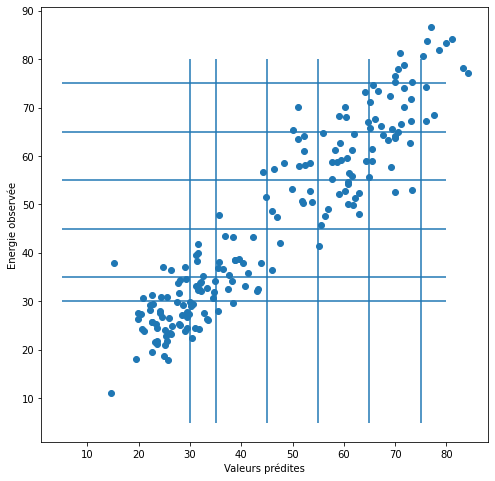

In [390]:
plt.plot(Y_predSVR,Yrel_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"Energie observée")
plt.hlines(xmin=5, xmax=80,y=[30,35,45,55,65,75])
plt.vlines(x=[30,35,45,55,65,75],ymin=5, ymax=80)
#plt.vlines(x)
plt.show()

In [391]:
df_energy_SVR= pd.DataFrame(Y_predSVR,columns=['Prediction'])
df_energy_SVR['Prediction_Energy'] = pd.cut(x=df_energy_SVR['Prediction'], bins=[-1,30, 35, 45, 55, 65, 75, 100], labels=["A", "B", "C", "D", "E", "F", "G"])


PrevSVRr=df_energy_SVR['Prediction_Energy'].values
# Dénombrement des erreurs par
# matrice de confusion
table=pd.crosstab(PrevSVRr,Ycat_test, normalize="columns")
print(table.round(2))

Energy.efficiency     A     B     C     D     E     F     G
row_0                                                      
A                  0.79  0.35  0.16  0.00  0.00  0.00  0.00
B                  0.17  0.43  0.20  0.00  0.00  0.00  0.00
C                  0.04  0.22  0.52  0.09  0.03  0.00  0.00
D                  0.00  0.00  0.08  0.30  0.25  0.09  0.00
E                  0.00  0.00  0.04  0.52  0.44  0.22  0.00
F                  0.00  0.00  0.00  0.09  0.28  0.57  0.43
G                  0.00  0.00  0.00  0.00  0.00  0.13  0.57


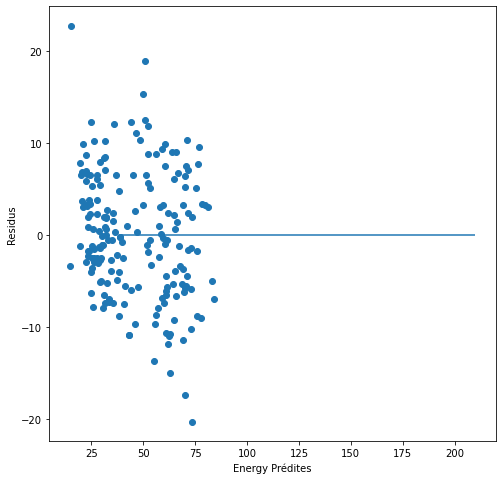

In [392]:
plt.plot(Y_predSVR,Yrel_test-Y_predSVR,"o")
plt.xlabel(u"Energy Prédites")
plt.ylabel(u"Residus")
plt.hlines(0,40,210)
plt.show()

In [393]:
#SVC with optimal parameters
SVRGSC = SVR(C=GSCvSVr.best_params_['C'],
                                    kernel = GSCvSVr.best_params_['kernel'], 
                         degree=GSCvSVr.best_params_['degree'],epsilon=GSCvSVr.best_params_['epsilon'],
                         gamma =GSCvSVr.best_params_['gamma'],
                        tol = GSCvSVr.best_params_['tol'])
SVRGSC1 = SVRGSC.fit(Xr_train, Yrel_train)

#### Interpretation

Nous observons, que nos résidus sont centrés autour de la moyenne 0, et explique avec 86% la variations de données avec une erreur faible.

#### Conclusion

Dans cette partie nous avons utilisé la méthode de classification indirecte pour prédire les différentes classes d'énergie de ce problème. Nous avons tout d'abord fait une prédiction basée sur la regression et ensuite appliqué la technique de seuil sur les valeurs prédites, pour obtenir des classes d'énergie. **Il ressort donc de cette analyse que le modèle de Random Forest avec une optimisation de paramètres par GridSearchCV a obtenu le meilleur taux de bien classés avec un pourcentage de 94% et un taux d'ereur de 0.05 sur les données d'entrainement et de test**. Les paramètres optimales sont : *'max_features'= 5, n_estimators=100*. Nous avons par ailleurs utilisé les méthodes de regression linéaire avec ou sans pénalisation,Arbre de décision optimal, Boosting et SVM.

# CONCLUSION GENERALE

Ce travail présente une étude réalisé pour résoudre un problème de classification dans le but de prédire l'efficacité énergetique d'un bâtiment basé sur un ensemble de données simulées de 780 bâtiments.

Après avoir utilisé deux approches de classification, il en ressort que l'approche de classification indirecte (regression +application de seuil) avec le modèle de *Radom Forest* et avec une optimisation des paramètres, prédit avec le plus grand score de test, les classes d'énergie des bâtiments. Nous avons obtenu un taux d'erreur sur l'échantillon de test d'environ 0.05 avec cet approche indirecte tandis que qu'avec le même modèle (Random Forest) en utilisant l'approche directe, nous obtenons un taux de mal classés d'environ 0.36.

En raison des effets de non-linéarités présents dans notre jeu de données, les modèles de regression logistique et linéaire sous-performent dans nos résultats. 

Dans notre jeu de données, certaines variables sont très fortement correlés. C'était le cas entre les surfaces totales, du toit et des murs. Nous avons donc après vérification, enlevé dans nos analyses, la variable redondante *Surface.area*. 

De nos analyses, il en ressort également qu'il existe un lien entre la surrface des murs et la variable de compacité relative. Au-delà du coefficient de correlation qui nous apporte cette information, la formule mathématique de la compacité dépend de la surface des murs. Il serait intéressant dans les futurs travaux de jeter un regards sur les méthodes de réseau de neuronnes artificiels et en particulier sur *Multilayer Perceptron* qui pourrait donner un résultat de classification directe meilleur. 